## loading and importing

In [233]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

In [234]:

# Load it back
with open("../pickles/df_after_EDA.pkl", "rb") as f:
    df = pickle.load(f)

with open("../pickles/df_num_after_EDA.pkl", "rb") as f:
    df_num = pickle.load(f)

In [235]:
df

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539           9                   1          4  ...   
1         0.876106          11                   2         11  ...   
2         0.604226          10                   5          5  ...   
3         2.568030          19                   8          5  ...   
4         1.130760          17                   6          5  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190          15                   5         17  ...   
12676     1.198190          10                   3          3  ...   
12677     1.332690          12                   6         10  ...   
12678     1.460500          19                   5          6  ...   
12679     0.323960           6                   2          1  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
0                      0.811549                        3   
1                      0.736815                        4   
2                      1.030588                        2   
3                      5.617276                        4   
4                      8.554974                        0   
...                         ...                      ...   
12675                  0.715843                        2   
12676                  1.758012                        1   
12677                  0.544502                        0   
12678                  0.764512                        0   
12679                  0.421488                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
0                         0                       3.0                     4.0   
1                         0                       2.0                     2.0   
2                         0                       3.0                     3.0   
3                         0                       2.0                     3.0   
4                         0                       2.0                     4.0   
...                     ...                       ...                     ...   
12675                     0                       1.0                     3.0   
12676                     0                       4.0                     3.0   
12677                     0                       0.0                     2.0   
12678                     0                       1.0                     1.0   
12679                     0                       2.0                     0.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
0               2                    No                    No   
1               0                    No                    No   
2               1                    No                    No   
3               2                    No                    No   
4               0                    No                    No   
...           ...                   ...                   ...   
12675           0                    No                    No   
126

# Outliers

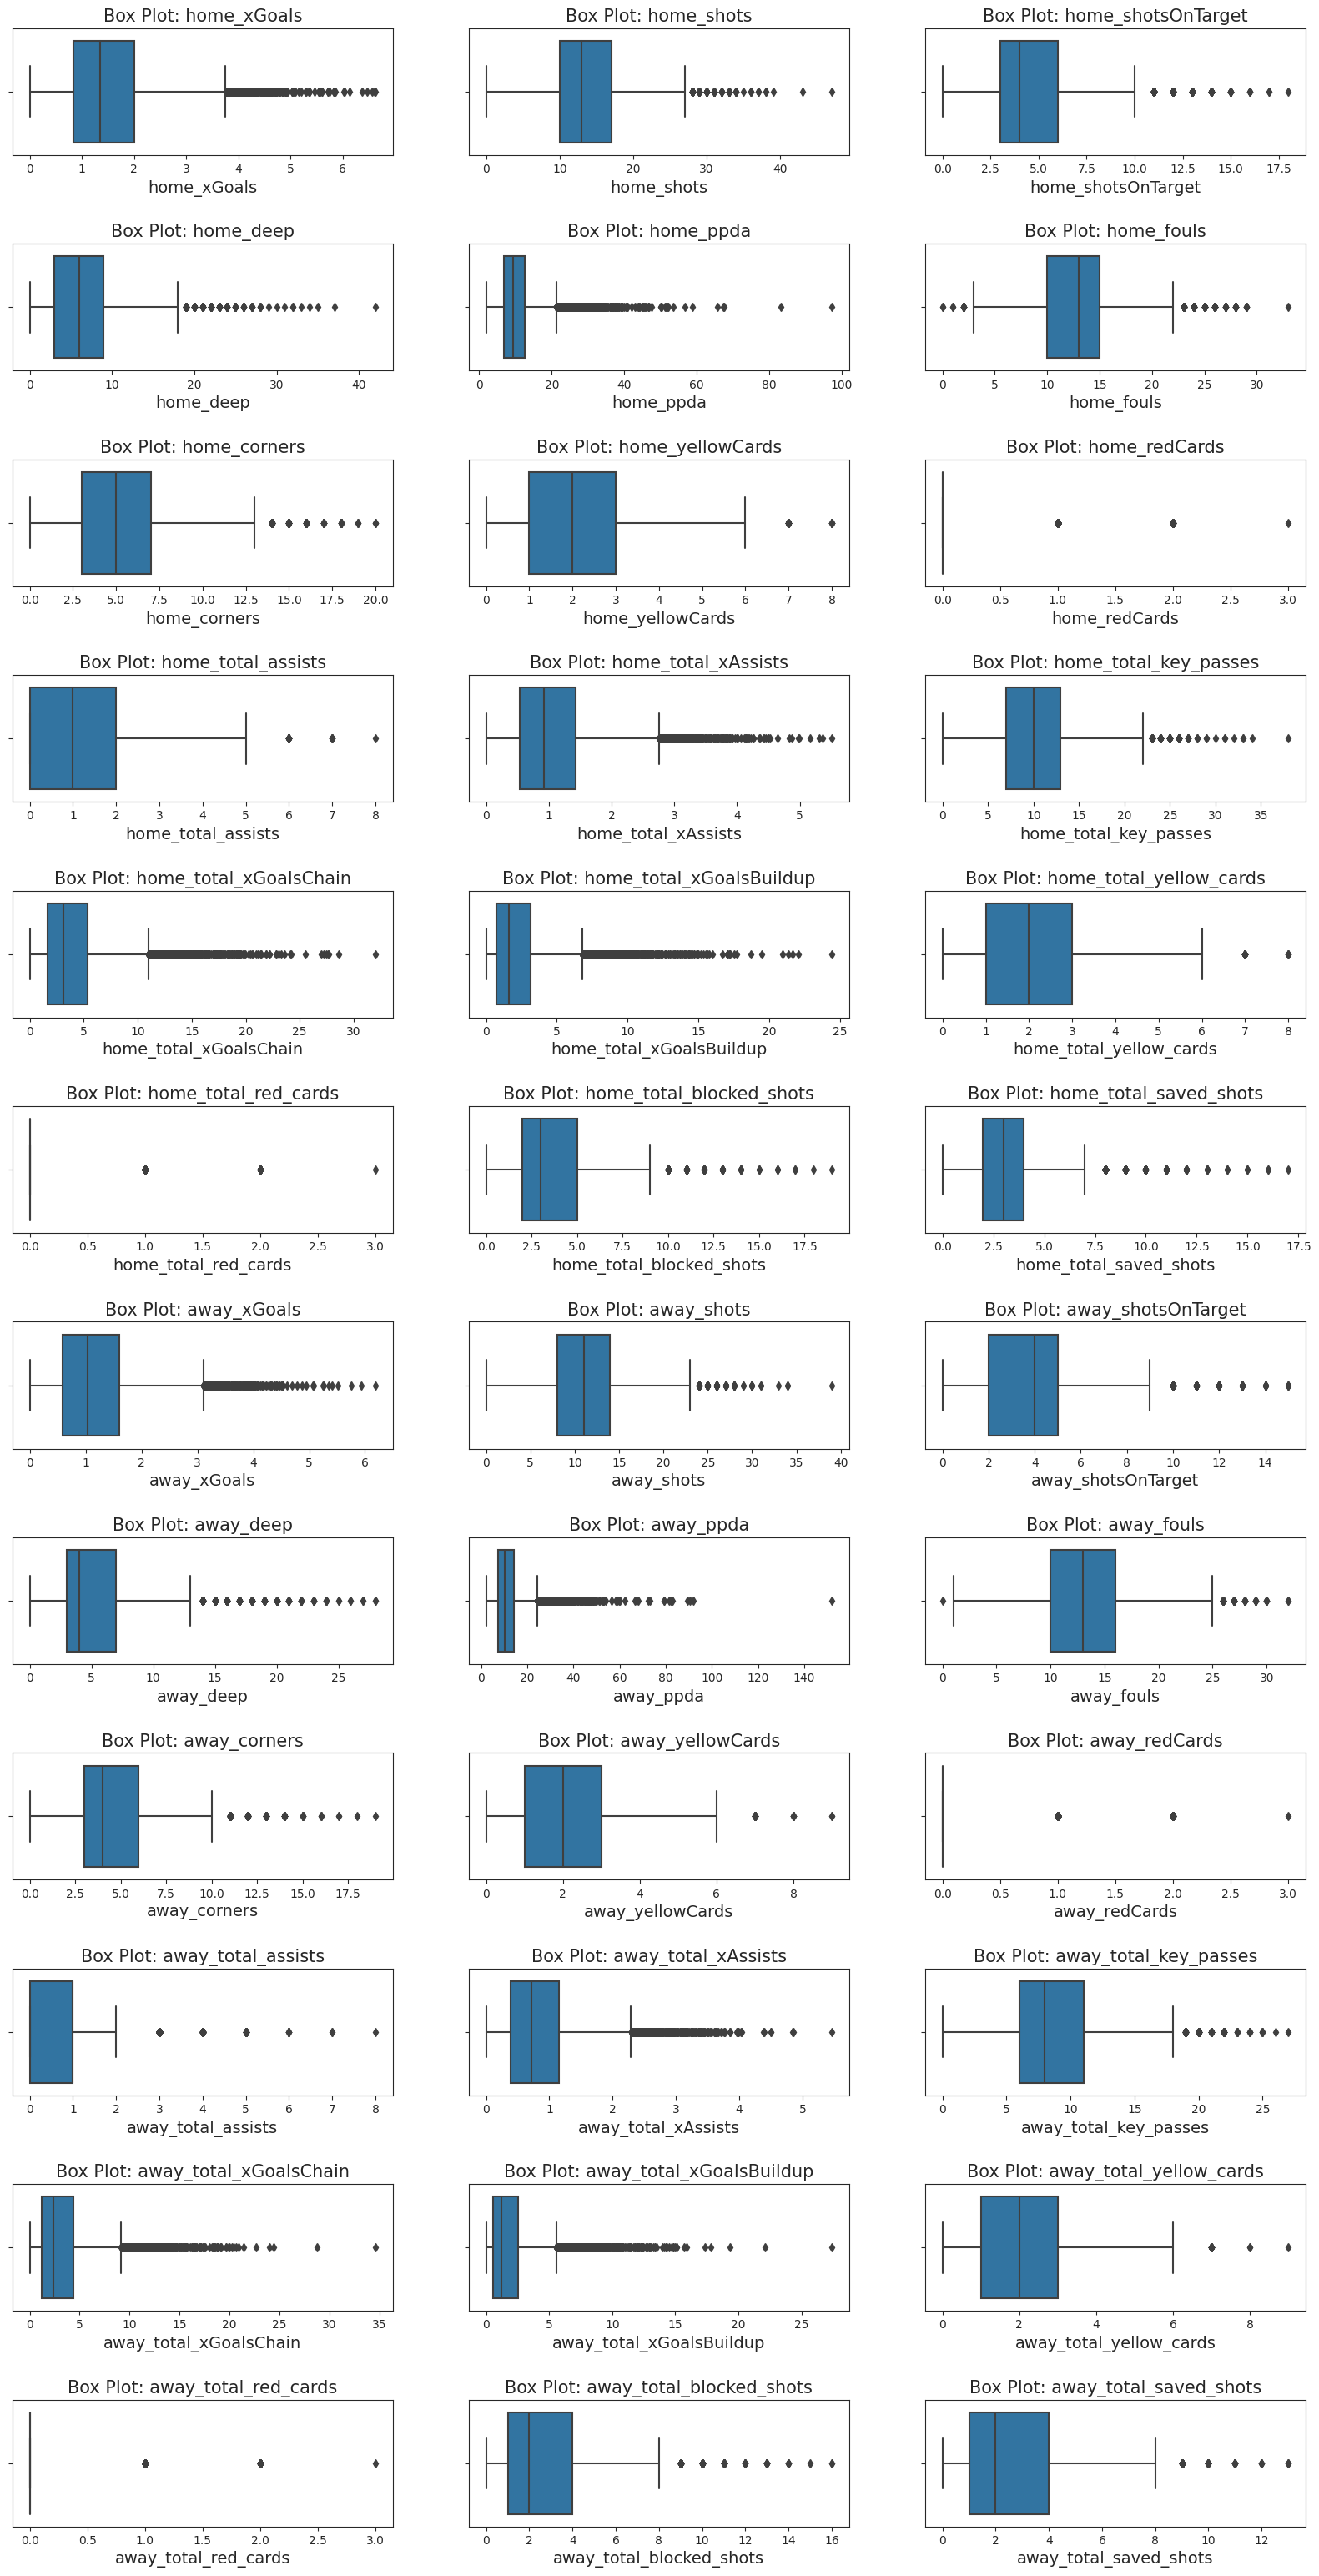

In [236]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        if col != 'gameresult':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df_num)

the missing value in homeYellowCards was dealt in the EDA analysis when creating the categorical features.

Creating Nulls dataframe and matrix

In [237]:
df_nulls = df.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]


In [238]:
df_nulls

home_total_blocked_shots  home_total_saved_shots  \
0                           4.0                     1.0   
1                           2.0                     2.0   
2                           2.0                     3.0   
3                           4.0                     4.0   
4                           3.0                     4.0   
...                         ...                     ...   
12675                       6.0                     4.0   
12676                       3.0                     2.0   
12677                       2.0                     4.0   
12678                       5.0                     5.0   
12679                       0.0                     1.0   

       away_total_blocked_shots  away_total_saved_shots  
0                           3.0                     4.0  
1                           2.0                     2.0  
2                           3.0                     3.0  
3                           2.0                     3.0  
4                           2.0                     4.0  
...                         ...                     ...  
12675                       1.0                     3.0  
12676                       4.0                     3.0  
12677                       0.0                     2.0  
12678                       1.0                     1.0  
12679                       2.0                     0.0  

[12680 rows x 4 columns]

In [239]:
display(df_nulls.value_counts(dropna=False))

home_total_blocked_shots  home_total_saved_shots  away_total_blocked_shots  away_total_saved_shots
2.0                       2.0                     2.0                       3.0                       31
                          3.0                     2.0                       3.0                       28
3.0                       4.0                     2.0                       2.0                       28
2.0                       2.0                     3.0                       3.0                       27
                                                  2.0                       1.0                       26
                                                                                                      ..
3.0                       9.0                     6.0                       4.0                        1
                          10.0                    1.0                       0.0                        1
                                                             

<Axes: >

<Axes: >

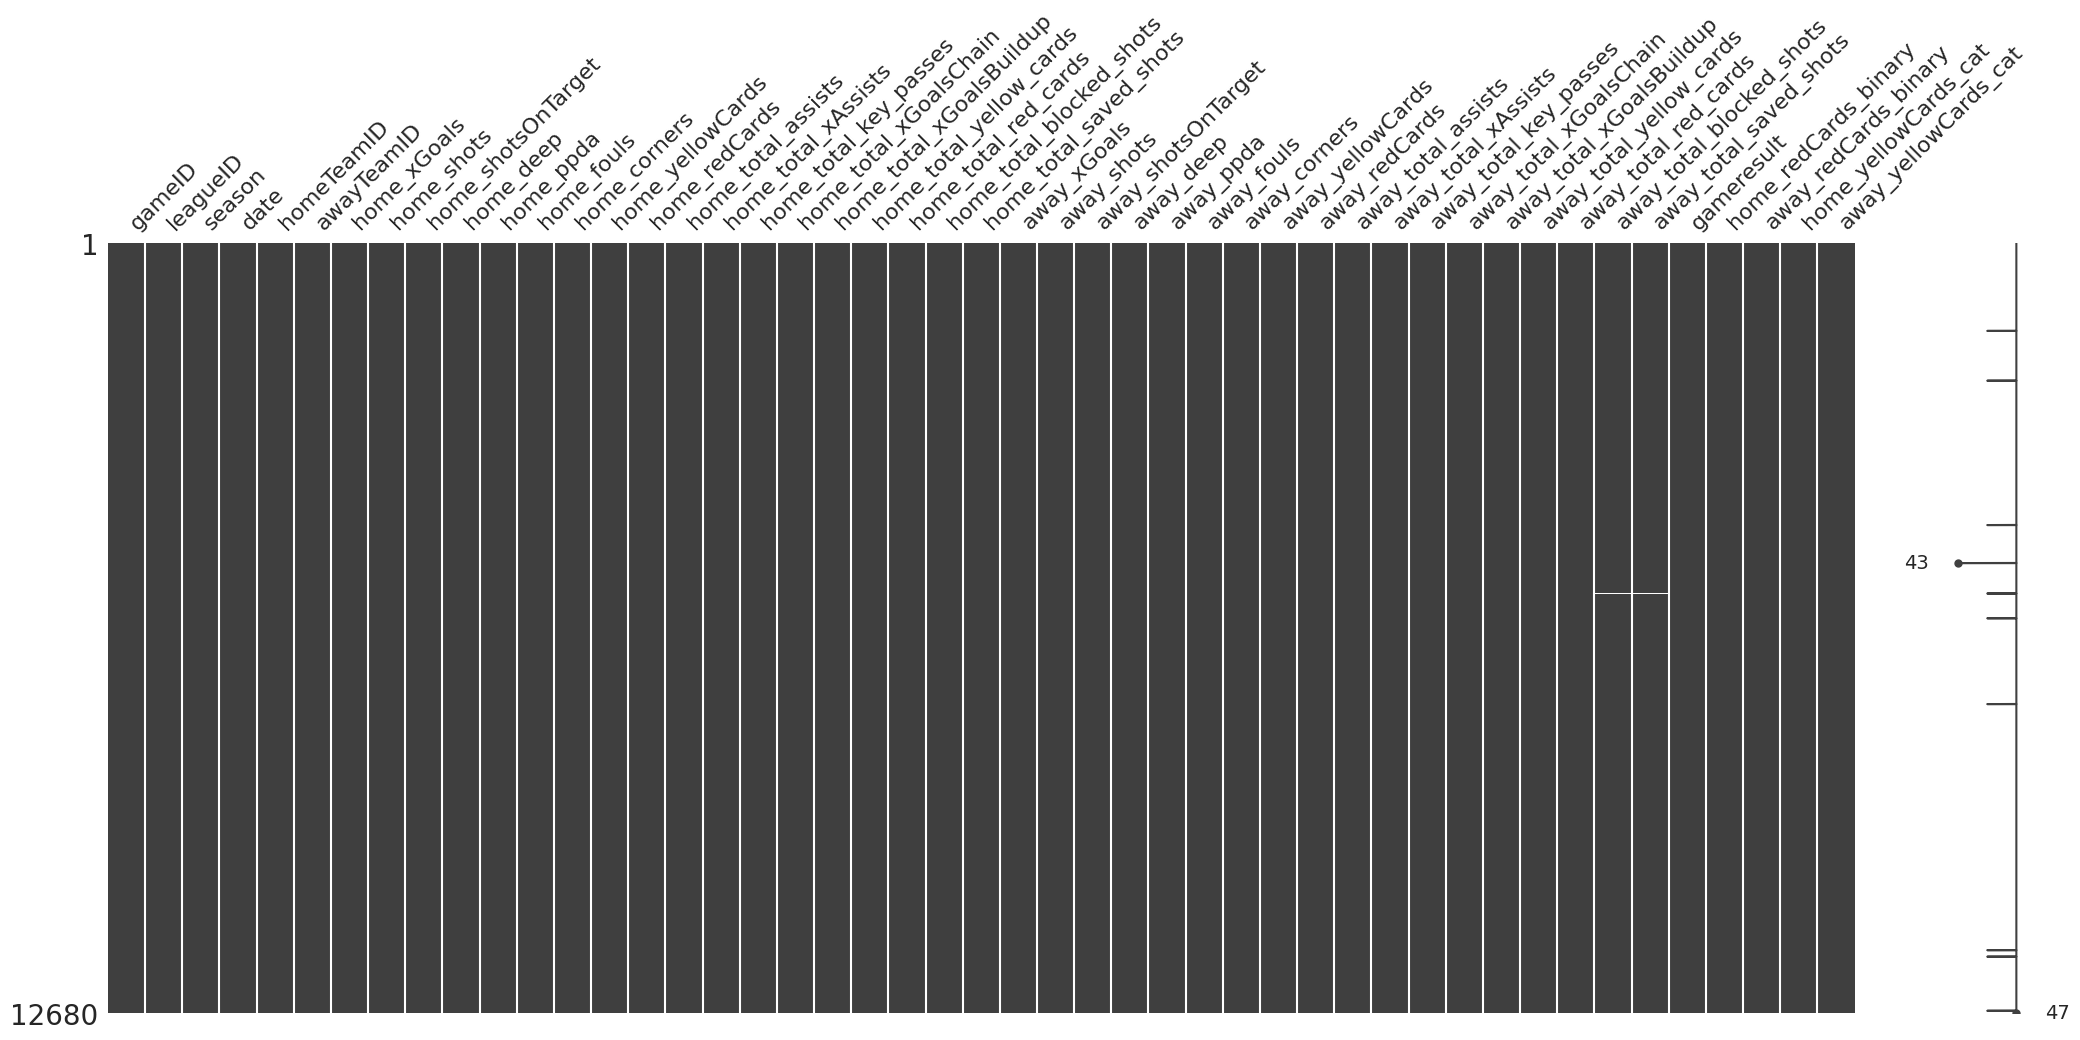

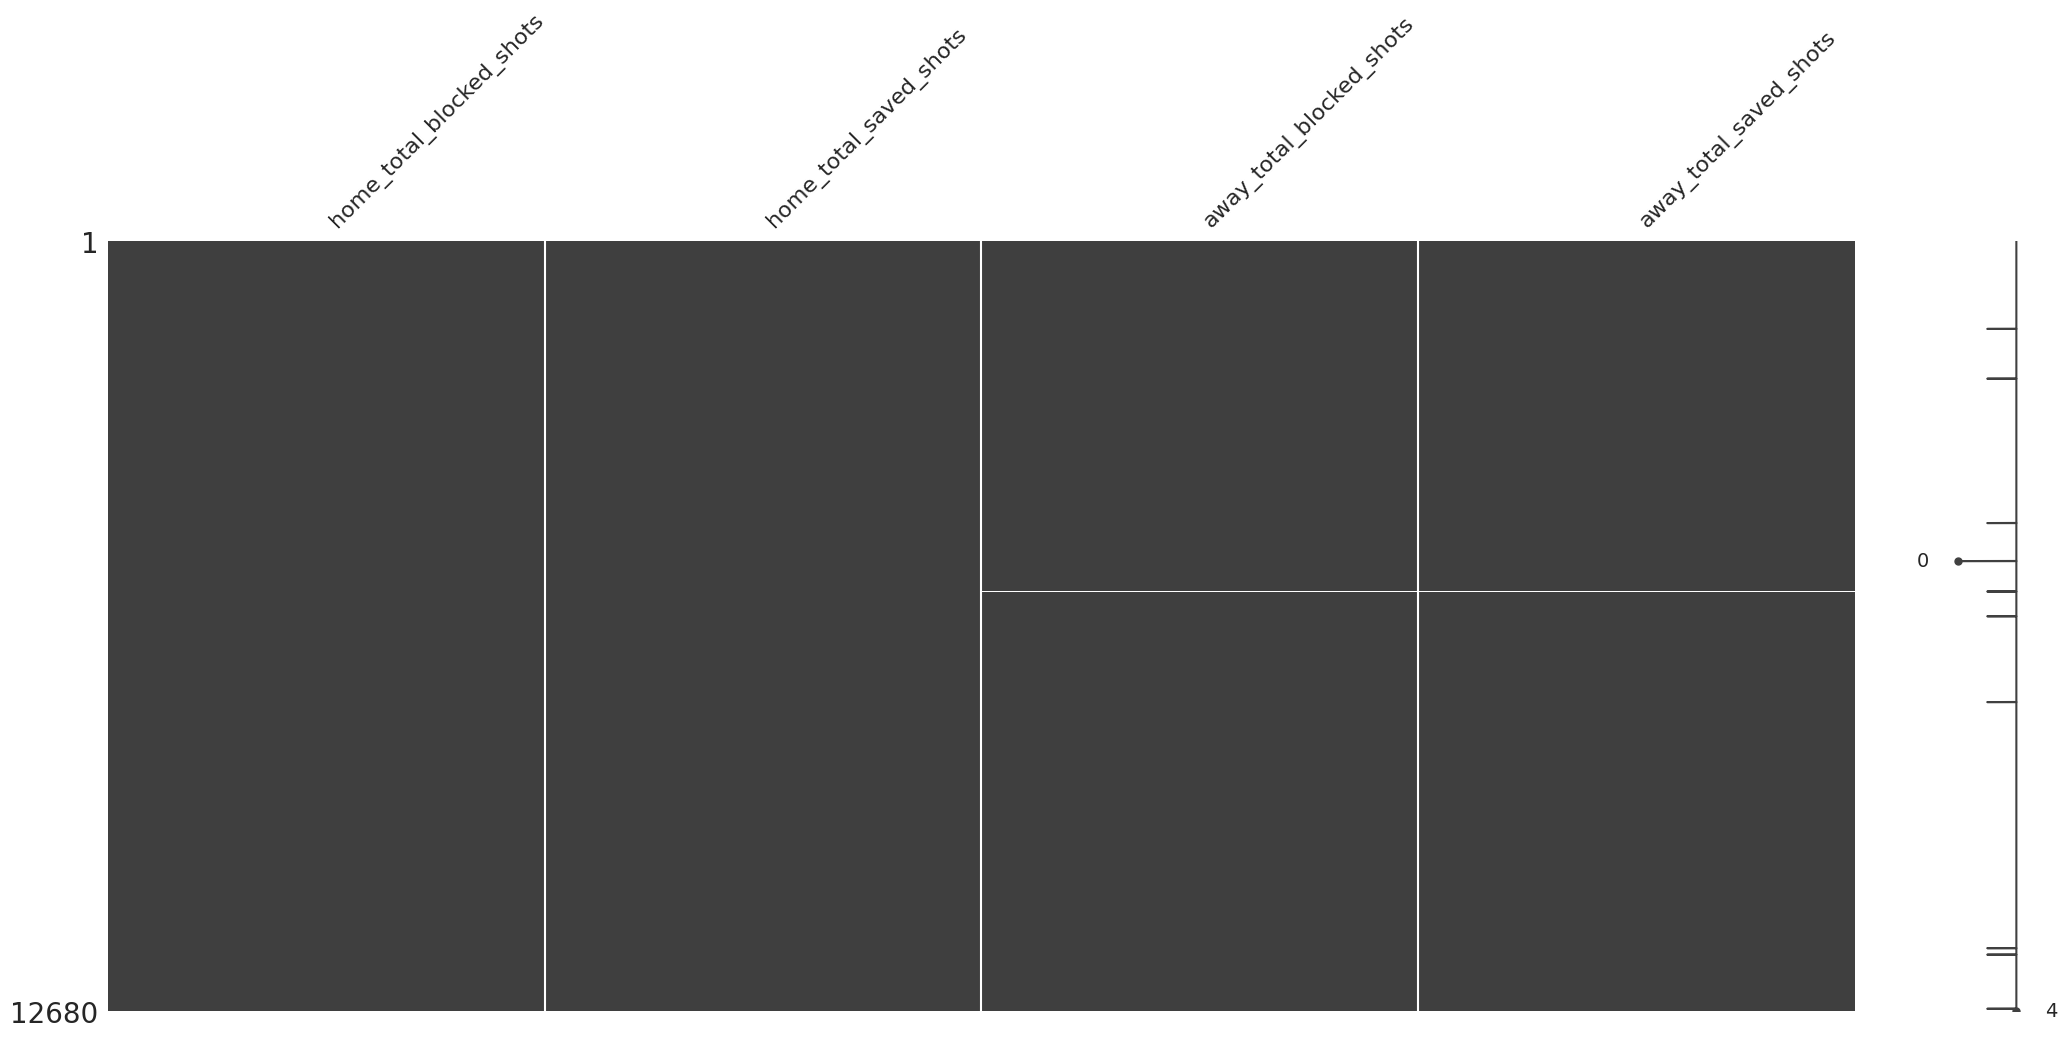

In [240]:
import missingno as msno
display(msno.matrix(df))
display(msno.matrix(df_nulls))

Dataframe containing missing value counts and their frequency:

In [241]:
mis_val = df_nulls.isna().sum()
mis_val_per = df_nulls.isna().sum()/len(df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

Missing Values  % of Total Values
away_total_blocked_shots               8                0.1
away_total_saved_shots                 8                0.1
home_total_blocked_shots               3                0.0
home_total_saved_shots                 3                0.0

In [242]:
display(df[df['home_total_blocked_shots'].isna() == True])
display(df[df['home_total_saved_shots'].isna() == True])
display(df[df['away_total_blocked_shots'].isna() == True])
display(df[df['away_total_saved_shots'].isna() == True])

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
7592     9486         1    2018 2019-03-02 15:00:00          73          88   
11751   15207         3    2020 2020-11-21 14:30:00         262         119   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
5270       1.12799          16                   7          7  ...   
7592       0.00000           0                   0          0  ...   
11751      0.00000           0                   0          1  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
5270                   0.348398                        1   
7592                   2.990505                        2   
11751                  2.241605                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
5270                      0                       NaN                     NaN   
7592                      0                       6.0                     6.0   
11751                     0                       2.0                     2.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
5270            2                   Yes                    No   
7592            0                    No                    No   
11751           0                    No                    No   

       home_yellowCards_cat  away_yellowCards_cat  
5270                      2                     1  
7592                      1                     2  
11751                     0                     1  

[3 rows x 47 columns]

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
7592     9486         1    2018 2019-03-02 15:00:00          73          88   
11751   15207         3    2020 2020-11-21 14:30:00         262         119   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
5270       1.12799          16                   7          7  ...   
7592       0.00000           0                   0          0  ...   
11751      0.00000           0                   0          1  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
5270                   0.348398                        1   
7592                   2.990505                        2   
11751                  2.241605                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
5270                      0                       NaN                     NaN   
7592                      0                       6.0                     6.0   
11751                     0                       2.0                     2.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
5270            2                   Yes                    No   
7592            0                    No                    No   
11751           0                    No                    No   

       home_yellowCards_cat  away_yellowCards_cat  
5270                      2                     1  
7592                      1                     2  
11751                     0                     1  

[3 rows x 47 columns]

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
1447     1528         4    2015 2015-11-29 23:30:00         138         146   
2267     2348         5    2016 2016-10-23 22:45:00         161         164   
4644     5392         3    2014 2014-10-18 14:30:00         117         123   
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
5771     7413         1    2017 2018-03-10 15:00:00         219          84   
6179     7821         2    2017 2018-04-17 18:45:00         106         116   
11644   15100         4    2020 2021-04-18 14:15:00         143         156   
12642   16098         5    2020 2021-05-01 19:00:00         160         170   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
1447      1.633370          15                   5         13  ...   
2267      1.514510          16                   2          9  ...   
4644      2.498260          19                   6         16  ...   
5270      1.127990          16                   7          7  ...   
5771      1.393810          28                   4          9  ...   
6179      2.350540          20                   9         10  ...   
11644     2.750290          10                   7         13  ...   
12642     0.684625          12                   4          7  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
1447                   0.000000                        2   
2267                   0.000000                        2   
4644                   0.000000                        1   
5270                   0.348398                        1   
5771                   0.000000                        3   
6179                   0.000000                        1   
11644                  0.000000                        1   
12642                  0.000000                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
1447                      2                       NaN                     NaN   
2267                      0                       NaN                     NaN   
4644                      0                       NaN                     NaN   
5270                      0                       NaN                     NaN   
5771                      1                       NaN                     NaN   
6179                      0                       NaN                     NaN   
11644                     0                       NaN                     NaN   
12642                     1                       NaN                     NaN   

       gameresult  home_redCards_binary  away_redCards_binary  \
1447            2                    No                   Yes   
2267            1                    No                    No   
4644            2                    No                    No   
5270            2                   Yes                    No   
5771            1                    No                   Yes   
6179            2                    No                    No   
11644           2                    No                    No   
12642           2                    No                   Yes   

       home_yellowCards_cat  away_yellowCards_cat  
1447                      3                     2  
2267                      0                     2  
4644                      0                     1  
5270                      2                     1  
5771                      2                     3  
6179                      1                     1  
11644                     0                     1  
12642                     2                     3  

[8 rows x 47 columns]

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
1447     1528         4    2015 2015-11-29 23:30:00         138         146   
2267     2348         5    2016 2016-10-23 22:45:00         161         164   
4644     5392         3    2014 2014-10-18 14:30:00         117         123   
5270     6018         5    2014 2015-01-18 20:00:00         164         169   
5771     7413         1    2017 2018-03-10 15:00:00         219          84   
6179     7821         2    2017 2018-04-17 18:45:00         106         116   
11644   15100         4    2020 2021-04-18 14:15:00         143         156   
12642   16098         5    2020 2021-05-01 19:00:00         160         170   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
1447      1.633370          15                   5         13  ...   
2267      1.514510          16                   2          9  ...   
4644      2.498260          19                   6         16  ...   
5270      1.127990          16                   7          7  ...   
5771      1.393810          28                   4          9  ...   
6179      2.350540          20                   9         10  ...   
11644     2.750290          10                   7         13  ...   
12642     0.684625          12                   4          7  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
1447                   0.000000                        2   
2267                   0.000000                        2   
4644                   0.000000                        1   
5270                   0.348398                        1   
5771                   0.000000                        3   
6179                   0.000000                        1   
11644                  0.000000                        1   
12642                  0.000000                        1   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
1447                      2                       NaN                     NaN   
2267                      0                       NaN                     NaN   
4644                      0                       NaN                     NaN   
5270                      0                       NaN                     NaN   
5771                      1                       NaN                     NaN   
6179                      0                       NaN                     NaN   
11644                     0                       NaN                     NaN   
12642                     1                       NaN                     NaN   

       gameresult  home_redCards_binary  away_redCards_binary  \
1447            2                    No                   Yes   
2267            1                    No                    No   
4644            2                    No                    No   
5270            2                   Yes                    No   
5771            1                    No                   Yes   
6179            2                    No                    No   
11644           2                    No                    No   
12642           2                    No                   Yes   

       home_yellowCards_cat  away_yellowCards_cat  
1447                      3                     2  
2267                      0                     2  
4644                      0                     1  
5270                      2                     1  
5771                      2                     3  
6179                      1                     1  
11644                     0                     1  
12642                     2                     3  

[8 rows x 47 columns]

Creating a dataframe with each of the missing values as 1, while non missing values are 0:

In [243]:
df_missing_data = (df.isna()).astype('int64')
df_missing_data.describe()

gameID  leagueID   season     date  homeTeamID  awayTeamID  \
count  12680.0   12680.0  12680.0  12680.0     12680.0     12680.0   
mean       0.0       0.0      0.0      0.0         0.0         0.0   
std        0.0       0.0      0.0      0.0         0.0         0.0   
min        0.0       0.0      0.0      0.0         0.0         0.0   
25%        0.0       0.0      0.0      0.0         0.0         0.0   
50%        0.0       0.0      0.0      0.0         0.0         0.0   
75%        0.0       0.0      0.0      0.0         0.0         0.0   
max        0.0       0.0      0.0      0.0         0.0         0.0   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
count      12680.0     12680.0             12680.0    12680.0  ...   
mean           0.0         0.0                 0.0        0.0  ...   
std            0.0         0.0                 0.0        0.0  ...   
min            0.0         0.0                 0.0        0.0  ...   
25%            0.0         0.0                 0.0        0.0  ...   
50%            0.0         0.0                 0.0        0.0  ...   
75%            0.0         0.0                 0.0        0.0  ...   
max            0.0         0.0                 0.0        0.0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
count                   12680.0                  12680.0   
mean                        0.0                      0.0   
std                         0.0                      0.0   
min                         0.0                      0.0   
25%                         0.0                      0.0   
50%                         0.0                      0.0   
75%                         0.0                      0.0   
max                         0.0                      0.0   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
count               12680.0              12680.000000            12680.000000   
mean                    0.0                  0.000631                0.000631   
std                     0.0                  0.025111                0.025111   
min                     0.0                  0.000000                0.000000   
25%                     0.0                  0.000000                0.000000   
50%                     0.0                  0.000000                0.000000   
75%                     0.0                  0.000000                0.000000   
max                     0.0                  1.000000                1.000000   

       gameresult  home_redCards_binary  away_redCards_binary  \
count     12680.0               12680.0               12680.0   
mean          0.0                   0.0                   0.0   
std           0.0                   0.0                   0.0   
min           0.0                   0.0                   0.0   
25%           0.0                   0.0                   0.0   
50%           0.0                   0.0                   0.0   
75%           0.0                   0.0                   0.0   
max           0.0                   0.0                   0.0   

       home_yellowCards_cat  away_yellowCards_cat  
count               12680.0               12680.0  
mean                    0.0                   0.0  
std                     0.0                   0.0  
min                     0.0                   0.0  
25%                     0.0                   0.0  
50%                     0.0                   0.0  
75%                     0.0                   0.0  
max                     0.0                   0.0  

[8 rows x 47 columns]

### outliers_df

The data is skewed and not normaly distributed, we'll use the IQR method to identify outliers to set up a boundary before Q1 and after Q3. Any values that fall outside of this boundary are considered outliers:

In [317]:
def outliers_df(df):
    """
    Detects outliers in a numerical dataset using the IQR (Interquartile Range) method.
    
    For each column (excluding 'gameresult'), it calculates:
      - Q1 = 25th percentile
      - Q3 = 75th percentile
      - IQR = Q3 - Q1
      - Upper limit = Q3 + 1.5 * IQR
      - Lower limit = Q1 - 1.5 * IQR
    
    Rows above the upper limit or below the lower limit are counted as outliers.
    
    Returns:
    - A DataFrame listing the number of outliers ("Outlier count") and the 
      percentage of outliers ("Percent") for each feature, sorted in descending order 
      of outlier percentage, but only for columns that actually have > 0% outliers.
    """
    total_outliers = pd.DataFrame(columns=['Outlier count','Percent'])

    for col in df.columns:
        if col != 'gameresult':  # Exclude your target or non-numeric column
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR

            # Single query for outliers
            outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
            num_outliers = len(outliers)

            total_outliers.loc[col] = [
                num_outliers, 
                (num_outliers / len(df)) * 100
            ]

    # Return only columns with > 0% outliers, sorted descending by Percent
    return (total_outliers[total_outliers['Percent'] > 0]
            .sort_values('Percent', ascending=False))

In [318]:
outliers_df = outliers_df(df_num)

In [319]:
outliers_df

Outlier count    Percent
away_redCards                    1396.0  11.009464
away_total_red_cards             1382.0  10.899054
home_redCards                    1078.0   8.501577
home_total_red_cards             1064.0   8.391167
away_total_assists                790.0   6.230284
away_total_xGoalsBuildup          718.0   5.662461
home_total_xGoalsBuildup          664.0   5.236593
away_ppda                         606.0   4.779180
home_ppda                         540.0   4.258675
away_total_xGoalsChain            538.0   4.242902
home_total_saved_shots            532.0   4.195584
home_total_xGoalsChain            523.0   4.124606
away_deep                         423.0   3.335962
away_total_xAssists               389.0   3.067823
home_shotsOnTarget                351.0   2.768139
home_total_xAssists               346.0   2.728707
away_xGoals                       312.0   2.460568
away_corners                      283.0   2.231861
home_xGoals                       276.0   2.176656
home_fouls                        241.0   1.900631
away_shotsOnTarget                233.0   1.837539
home_total_blocked_shots          230.0   1.813880
home_deep                         227.0   1.790221
away_total_blocked_shots          187.0   1.474763
away_total_key_passes             169.0   1.332808
home_shots                        167.0   1.317035
away_shots                        161.0   1.269716
home_corners                      143.0   1.127760
home_total_key_passes             123.0   0.970032
away_total_saved_shots             95.0   0.749211
away_fouls                         81.0   0.638801
away_yellowCards                   43.0   0.339117
home_yellowCards                   37.0   0.291798
away_total_yellow_cards            26.0   0.205047
home_total_yellow_cards            20.0   0.157729
home_total_assists                 20.0   0.157729

In [320]:

outliers_df.to_csv('../csvs/outliers_df.csv')

## new_outliers_df


In [321]:
# outliers_df = pd.read_csv('../csvs/outliers_df.csv')

In [322]:
outliers_df

Outlier count    Percent
away_redCards                    1396.0  11.009464
away_total_red_cards             1382.0  10.899054
home_redCards                    1078.0   8.501577
home_total_red_cards             1064.0   8.391167
away_total_assists                790.0   6.230284
away_total_xGoalsBuildup          718.0   5.662461
home_total_xGoalsBuildup          664.0   5.236593
away_ppda                         606.0   4.779180
home_ppda                         540.0   4.258675
away_total_xGoalsChain            538.0   4.242902
home_total_saved_shots            532.0   4.195584
home_total_xGoalsChain            523.0   4.124606
away_deep                         423.0   3.335962
away_total_xAssists               389.0   3.067823
home_shotsOnTarget                351.0   2.768139
home_total_xAssists               346.0   2.728707
away_xGoals                       312.0   2.460568
away_corners                      283.0   2.231861
home_xGoals                       276.0   2.176656
home_fouls                        241.0   1.900631
away_shotsOnTarget                233.0   1.837539
home_total_blocked_shots          230.0   1.813880
home_deep                         227.0   1.790221
away_total_blocked_shots          187.0   1.474763
away_total_key_passes             169.0   1.332808
home_shots                        167.0   1.317035
away_shots                        161.0   1.269716
home_corners                      143.0   1.127760
home_total_key_passes             123.0   0.970032
away_total_saved_shots             95.0   0.749211
away_fouls                         81.0   0.638801
away_yellowCards                   43.0   0.339117
home_yellowCards                   37.0   0.291798
away_total_yellow_cards            26.0   0.205047
home_total_yellow_cards            20.0   0.157729
home_total_assists                 20.0   0.157729

Labeling every outlier with 'Outlier' in order to seperate the outliers from nulls (temporarily, and then to 0/1):



In [323]:
def labaling_outliers(df, outliers_df):
    """
    Labels outliers in df's columns (listed in outliers_df.index) using the IQR method.
    Values beyond Q1 - 1.5*IQR or Q3 + 1.5*IQR become 'Outlier'.
    """
    label_out_df = df.copy()

    for col in label_out_df.columns:
        if col in outliers_df.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            IQR = Q3 - Q1

            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR

            label_out_df[col] = np.where(
                label_out_df[col] > upper_limit, 
                'Outlier',
                np.where(
                    label_out_df[col] < lower_limit, 
                    'Outlier', 
                    label_out_df[col]
                )
            )

    return label_out_df


In [328]:
new_df_outliers = labaling_outliers(df, outliers_df)

In [329]:
display(new_df_outliers)

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

      home_xGoals home_shots home_shotsOnTarget home_deep  ...  \
0        0.627539          9                  1         4  ...   
1        0.876106         11                  2        11  ...   
2        0.604226         10                  5         5  ...   
3         2.56803         19                  8         5  ...   
4         1.13076         17                  6         5  ...   
...           ...        ...                ...       ...  ...   
12675     1.41119         15                  5        17  ...   
12676     1.19819         10                  3         3  ...   
12677     1.33269         12                  6        10  ...   
12678      1.4605         19                  5         6  ...   
12679     0.32396          6                  2         1  ...   

      away_total_xGoalsBuildup away_total_yellow_cards away_total_red_cards  \
0                  0.811548838                       3                    0   
1                  0.736814573                       4                    0   
2                  1.030588262                       2                    0   
3                      Outlier                       4                    0   
4                      Outlier                       0                    0   
...                        ...                     ...                  ...   
12675              0.715843365                       2                    0   
12676              1.758012205                       1                    0   
12677              0.544501653                       0                    0   
12678              0.764512412                       0                    0   
12679              0.421488475                       1                    0   

      away_total_blocked_shots away_total_saved_shots gameresult  \
0                          3.0                    4.0          2   
1                          2.0                    2.0          0   
2                          3.0                    3.0          1   
3                          2.0                    3.0          2   
4                          2.0                    4.0          0   
...                        ...                    ...        ...   
12675                      1.0                    3.0          0   
12676                      4.0                    3.0          0   
12677                      0.0                    2.0          2   
12678                      1.0                    1.0          0   
12679                      2.0                    0.0          1   

      home_redCards_binary away_redCards_binary home_yellowCards_cat  \
0                       No                   No                    2   
1                       No                   No                    3   
2                       No                   No                    1   
3                       No                   No                    2   
4                       No                   No                    1   
...                    ...                  ...                  ..

## df_outliers

Creating a dataframe with outliers as 1 and non-outliers as 0:


In [331]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')

In [333]:
df_outliers

gameID  leagueID  season  date  homeTeamID  awayTeamID  home_xGoals  \
0           0         0       0     0           0           0            0   
1           0         0       0     0           0           0            0   
2           0         0       0     0           0           0            0   
3           0         0       0     0           0           0            0   
4           0         0       0     0           0           0            0   
...       ...       ...     ...   ...         ...         ...          ...   
12675       0         0       0     0           0           0            0   
12676       0         0       0     0           0           0            0   
12677       0         0       0     0           0           0            0   
12678       0         0       0     0           0           0            0   
12679       0         0       0     0           0           0            0   

       home_shots  home_shotsOnTarget  home_deep  ...  \
0               0                   0          0  ...   
1               0                   0          0  ...   
2               0                   0          0  ...   
3               0                   0          0  ...   
4               0                   0          0  ...   
...           ...                 ...        ...  ...   
12675           0                   0          0  ...   
12676           0                   0          0  ...   
12677           0                   0          0  ...   
12678           0                   0          0  ...   
12679           0                   0          0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             1                        0   
4                             1                        0   
...                         ...                      ...   
12675                         0                        0   
12676                         0                        0   
12677                         0                        0   
12678                         0                        0   
12679                         0                        0   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
0                         0                         0                       0   
1                         0                         0                       0   
2                         0                         0                       0   
3                         0                         0                       0   
4                         0                         0                       0   
...                     ...                       ...                     ...   
12675                     0                         0                       0   
12676                     0                         0                       0   
12677                     0                         0                       0   
12678                     0                         0                       0   
12679                     0                         0                       0   

       gameresult  home_redCards_binary  away_redCards_binary  \
0               0                     0                     0   
1               0                     0                     0   
2               0                     0                     0   
3               0                     0                     0   
4               0                     0                     0   
...           ...                   ...                   ...   
12675           0                     0                     0   
12676           0                     0                     0   
12677           0                     0                     0   
12678           0                     0  

Now that we have a dataframe saving all the outliers we'll convert all the outliers to nulls, just so I can see differences in distribution with and without outliers and then decide which of the outliers to remove or not:

In [336]:
def capping(df, df_outliers):
    """
    Returns a copy of df where rows flagged as 1 in mask_df
    are replaced with NaN in the corresponding columns.
    """
    capped_df = df.copy()
    for col in df.columns:
        if df_outliers[col].sum() > 0:
            capped_df.loc[df_outliers[col] == 1, col] = np.nan
    return capped_df

In [337]:
capping_outliers_df = capping(df, df_outliers)

In [338]:
display(capping_outliers_df)

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539         9.0                 1.0        4.0  ...   
1         0.876106        11.0                 2.0       11.0  ...   
2         0.604226        10.0                 5.0        5.0  ...   
3         2.568030        19.0                 8.0        5.0  ...   
4         1.130760        17.0                 6.0        5.0  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190        15.0                 5.0       17.0  ...   
12676     1.198190        10.0                 3.0        3.0  ...   
12677     1.332690        12.0                 6.0       10.0  ...   
12678     1.460500        19.0                 5.0        6.0  ...   
12679     0.323960         6.0                 2.0        1.0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
0                      0.811549                      3.0   
1                      0.736815                      4.0   
2                      1.030588                      2.0   
3                           NaN                      4.0   
4                           NaN                      0.0   
...                         ...                      ...   
12675                  0.715843                      2.0   
12676                  1.758012                      1.0   
12677                  0.544502                      0.0   
12678                  0.764512                      0.0   
12679                  0.421488                      1.0   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
0                       0.0                       3.0                     4.0   
1                       0.0                       2.0                     2.0   
2                       0.0                       3.0                     3.0   
3                       0.0                       2.0                     3.0   
4                       0.0                       2.0                     4.0   
...                     ...                       ...                     ...   
12675                   0.0                       1.0                     3.0   
12676                   0.0                       4.0                     3.0   
12677                   0.0                       0.0                     2.0   
12678                   0.0                       1.0                     1.0   
12679                   0.0                       2.0                     0.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
0               2                    No                    No   
1               0                    No                    No   
2               1                    No                    No   
3               2                    No                    No   
4               0                    No                    No   
...           ...                   ...                   ...   
12675           0                    No                    No   
126

Saving the inter quartal outliers dataframe for future reference.

In [339]:
print(outliers_df.index)

Index(['away_redCards', 'away_total_red_cards', 'home_redCards',
       'home_total_red_cards', 'away_total_assists',
       'away_total_xGoalsBuildup', 'home_total_xGoalsBuildup', 'away_ppda',
       'home_ppda', 'away_total_xGoalsChain', 'home_total_saved_shots',
       'home_total_xGoalsChain', 'away_deep', 'away_total_xAssists',
       'home_shotsOnTarget', 'home_total_xAssists', 'away_xGoals',
       'away_corners', 'home_xGoals', 'home_fouls', 'away_shotsOnTarget',
       'home_total_blocked_shots', 'home_deep', 'away_total_blocked_shots',
       'away_total_key_passes', 'home_shots', 'away_shots', 'home_corners',
       'home_total_key_passes', 'away_total_saved_shots', 'away_fouls',
       'away_yellowCards', 'home_yellowCards', 'away_total_yellow_cards',
       'home_total_yellow_cards', 'home_total_assists'],
      dtype='object')


In [341]:
def dist_outliers(original_df, new, cols):
    for col in original_df:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()


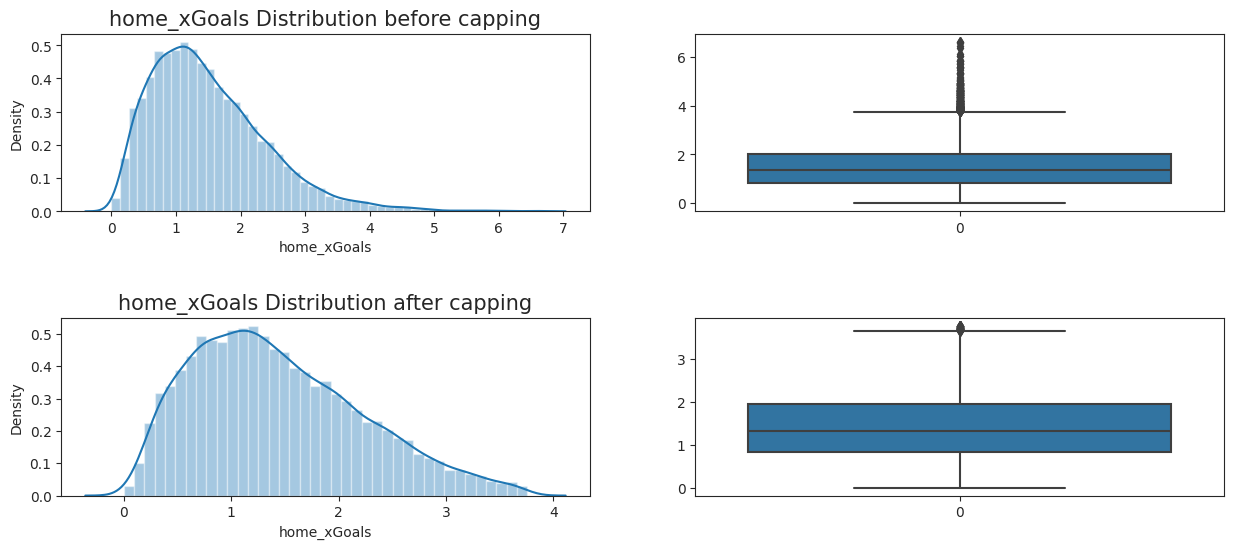

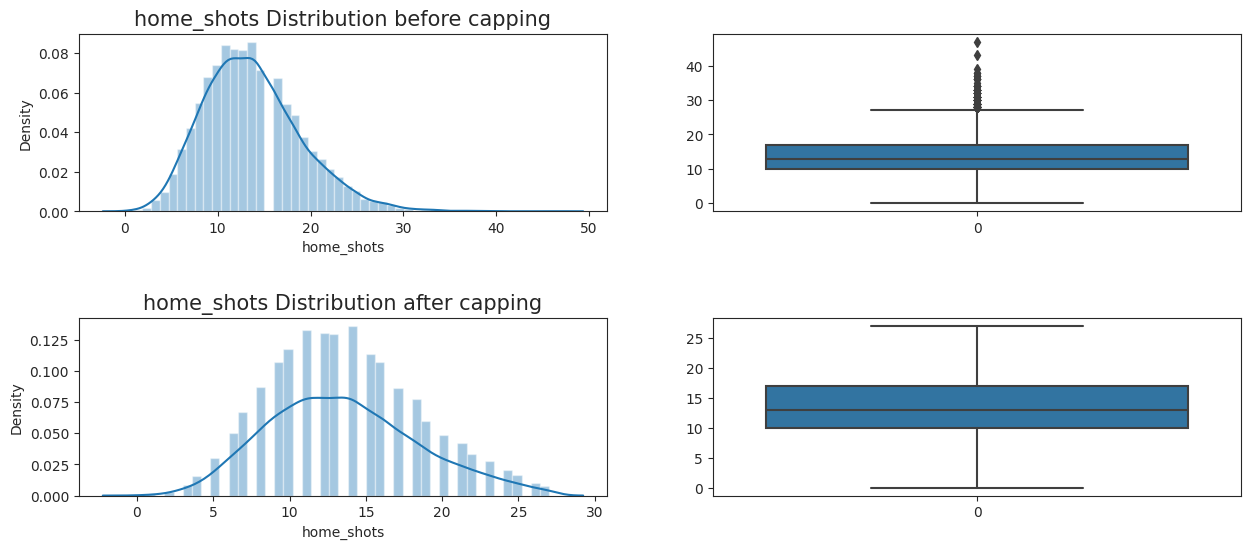

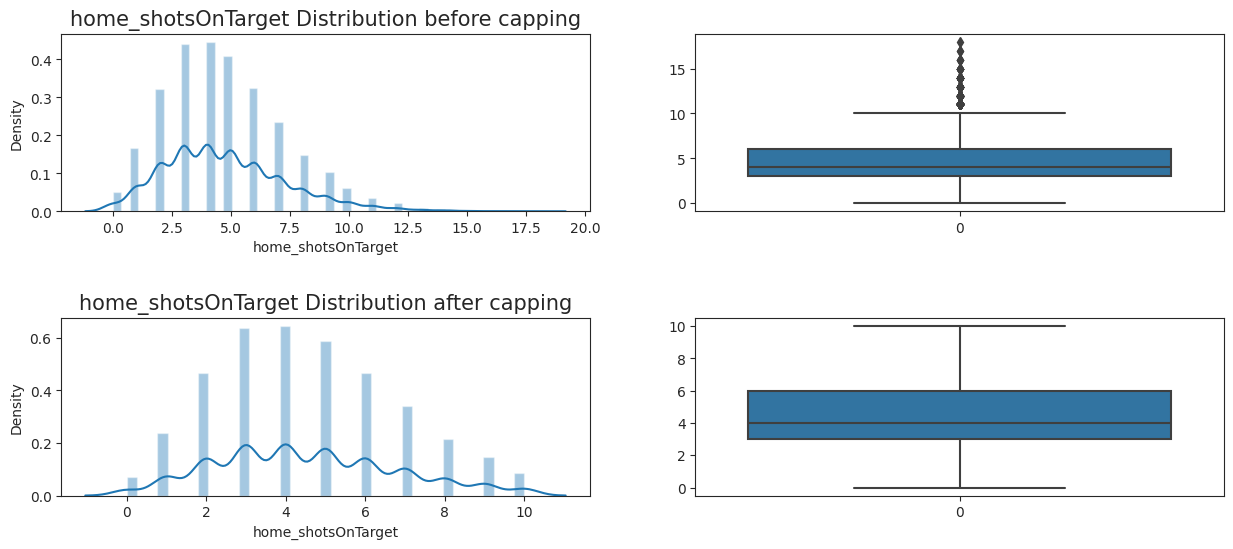

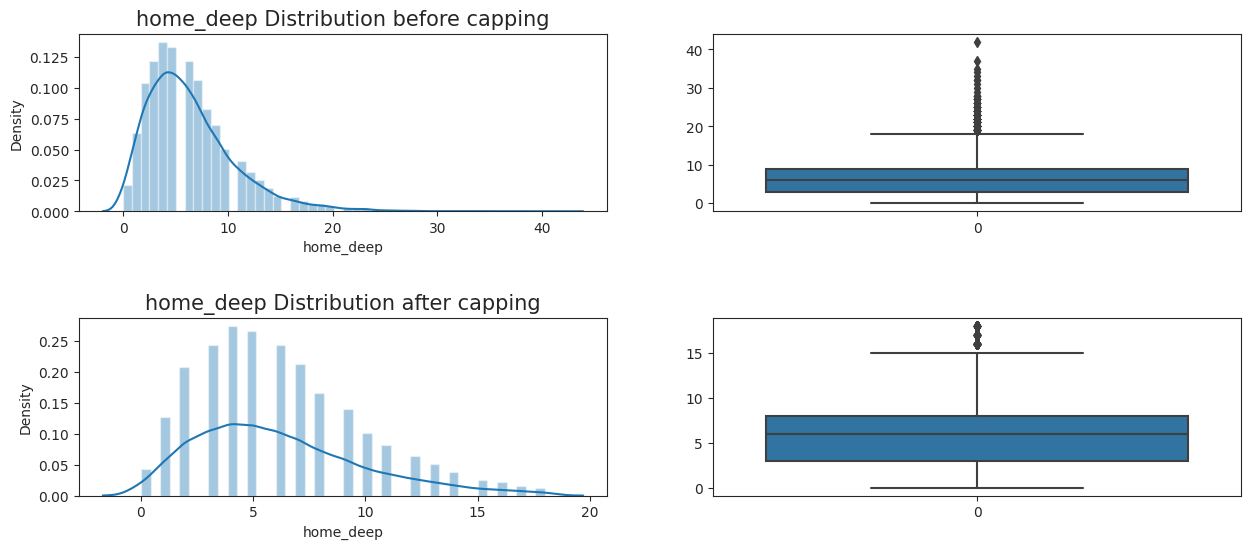

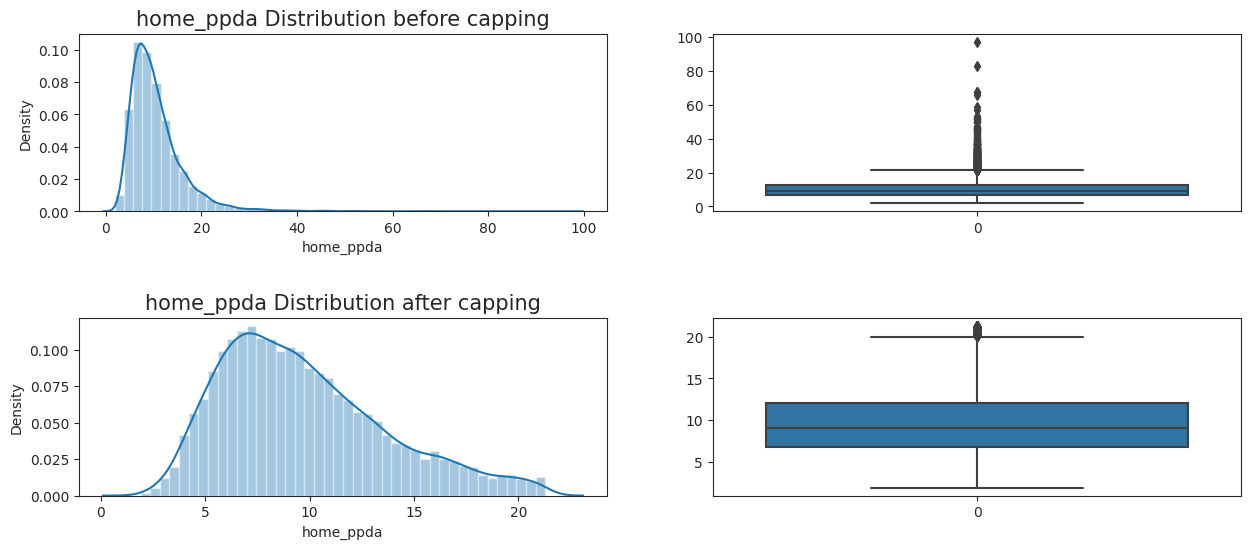

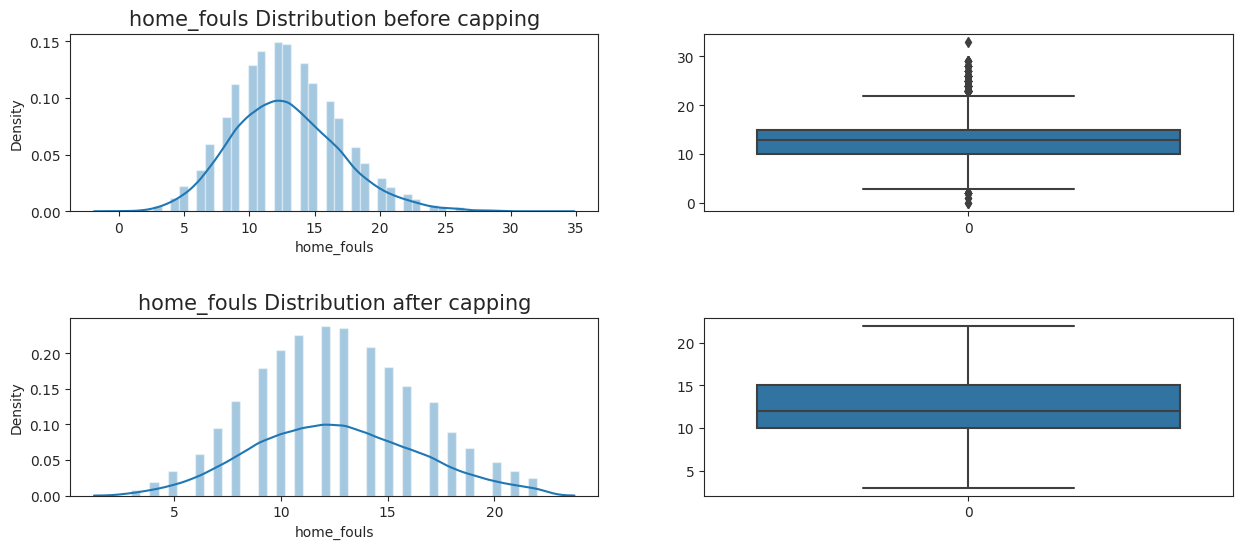

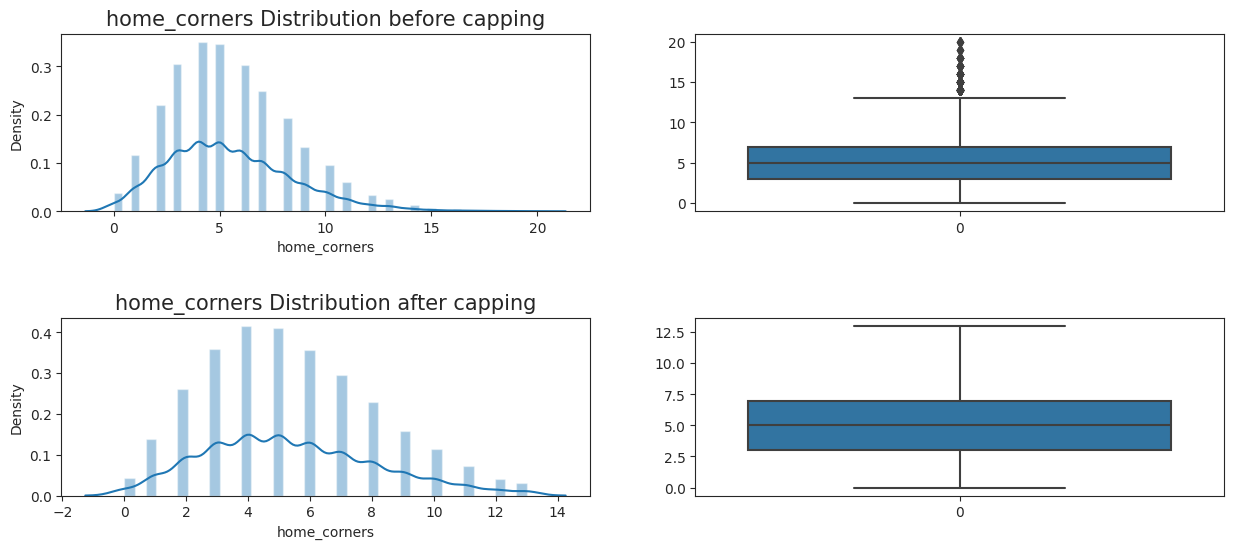

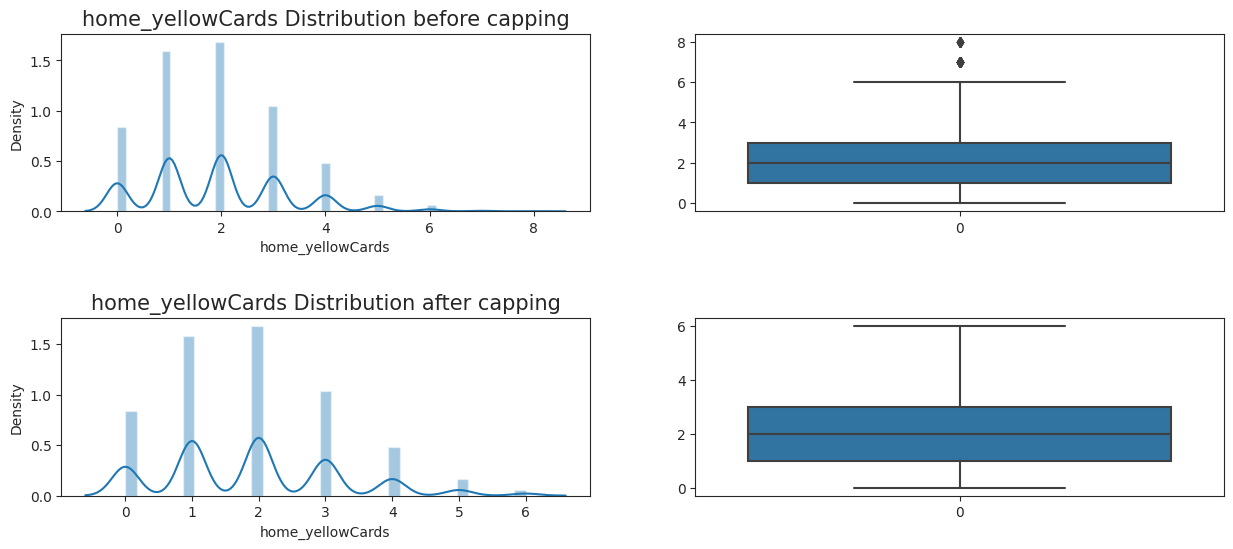

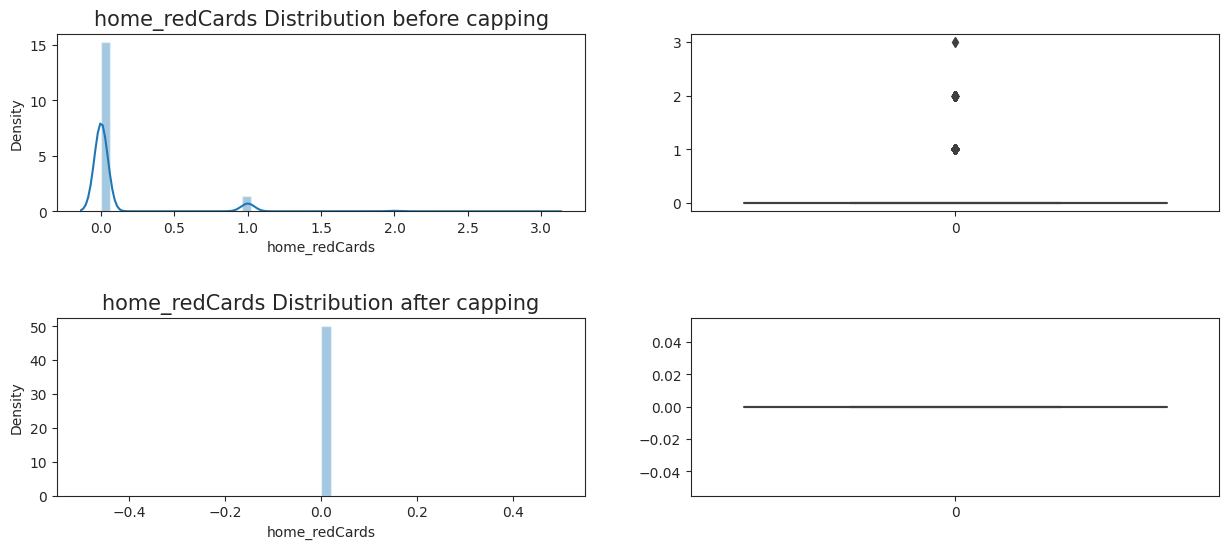

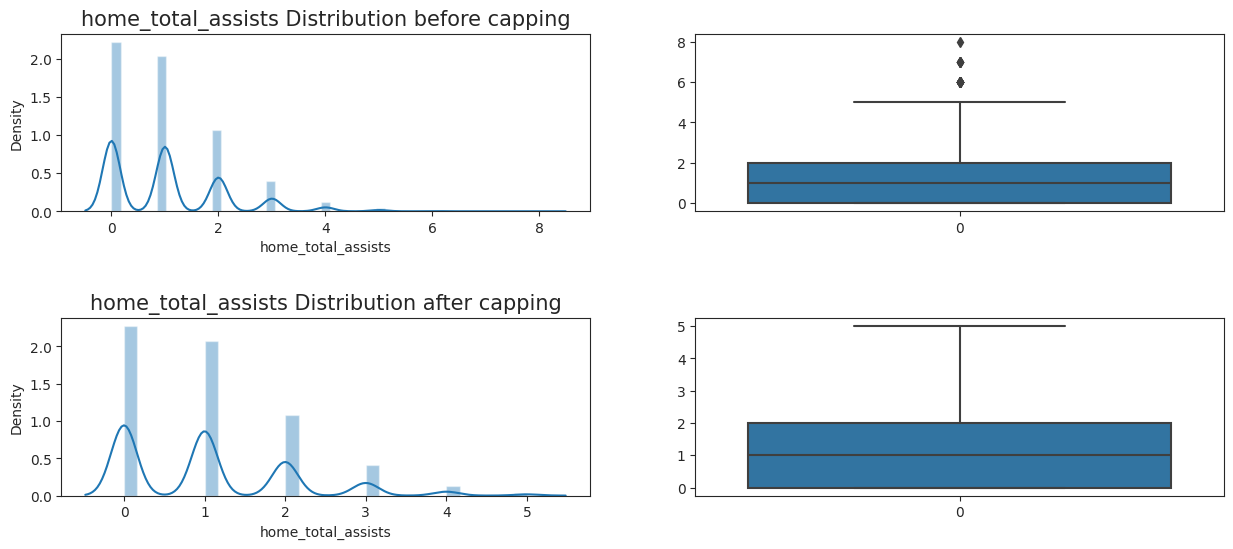

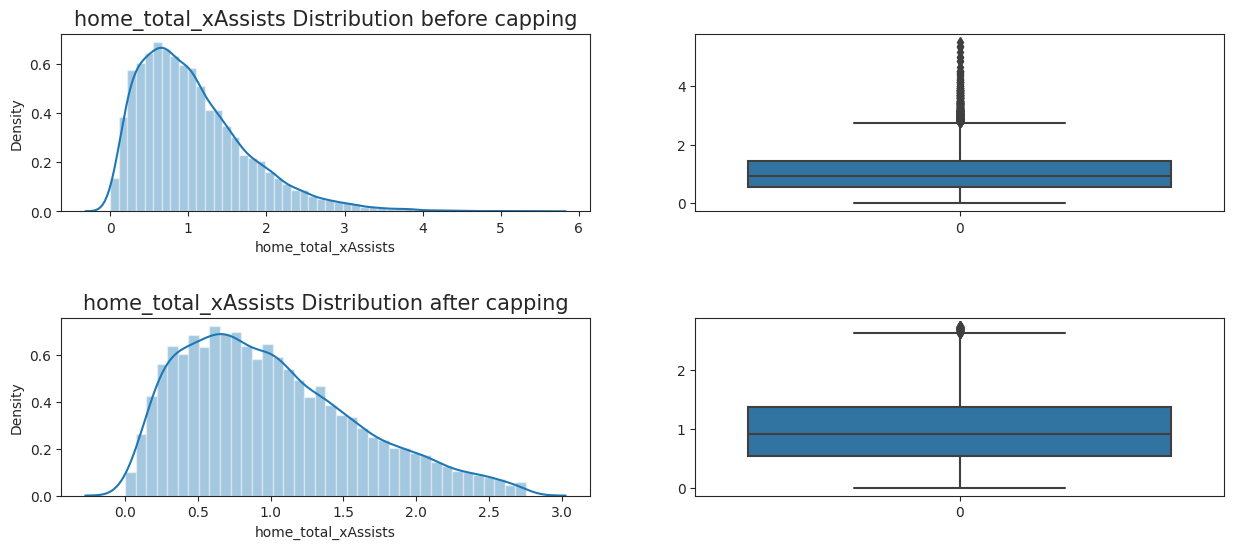

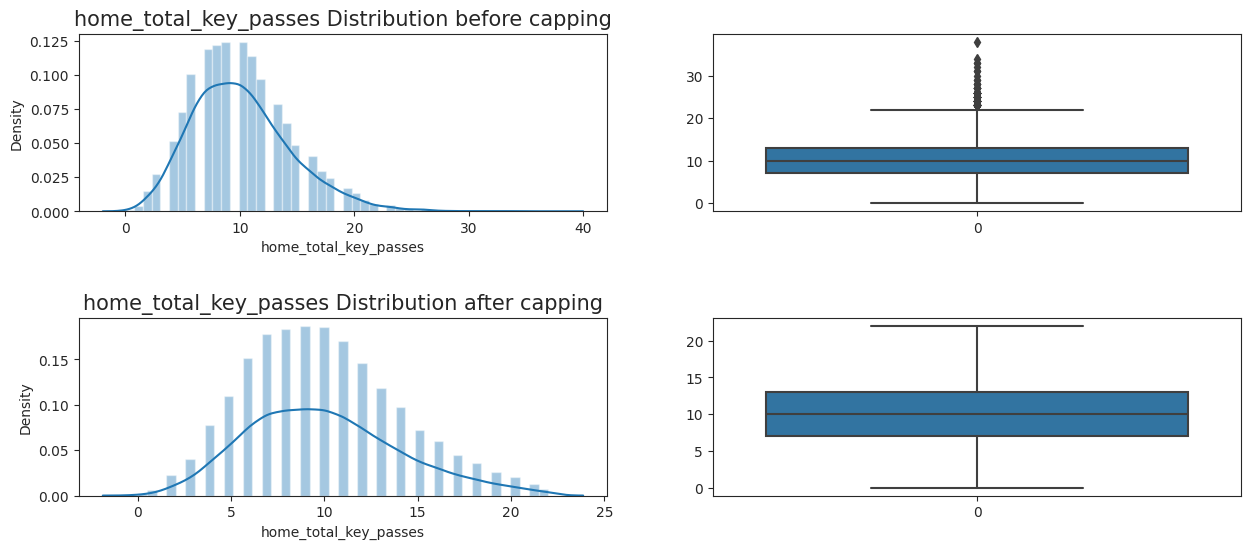

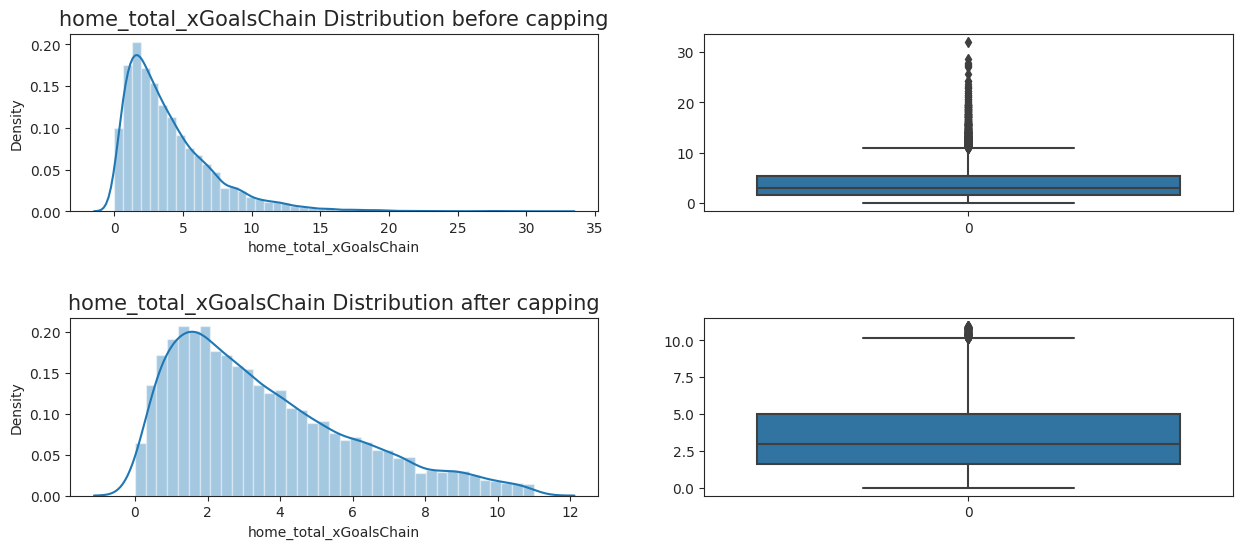

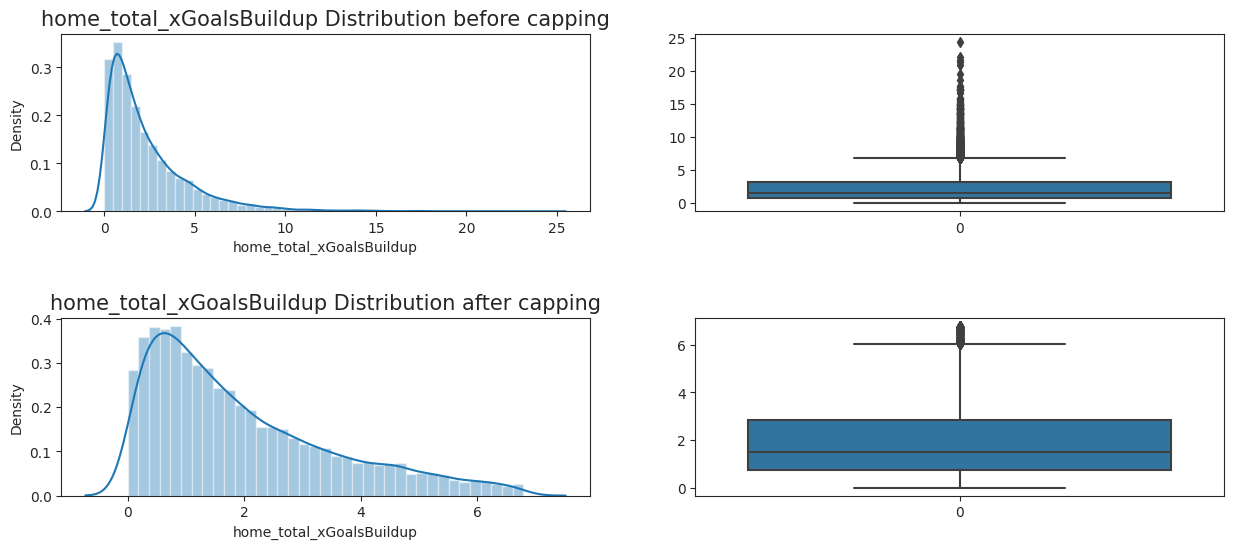

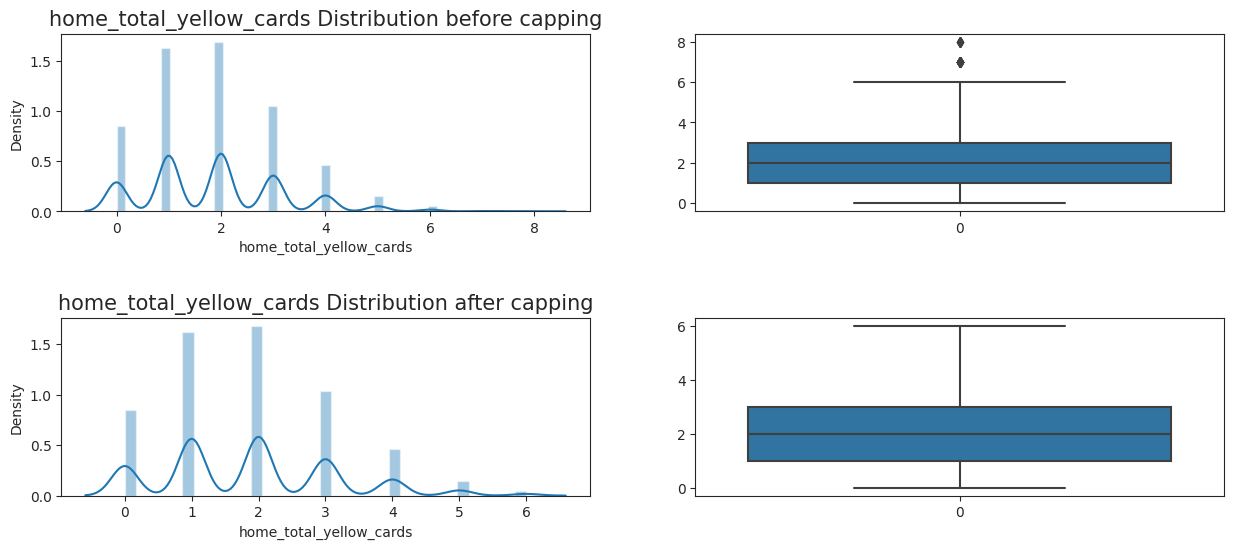

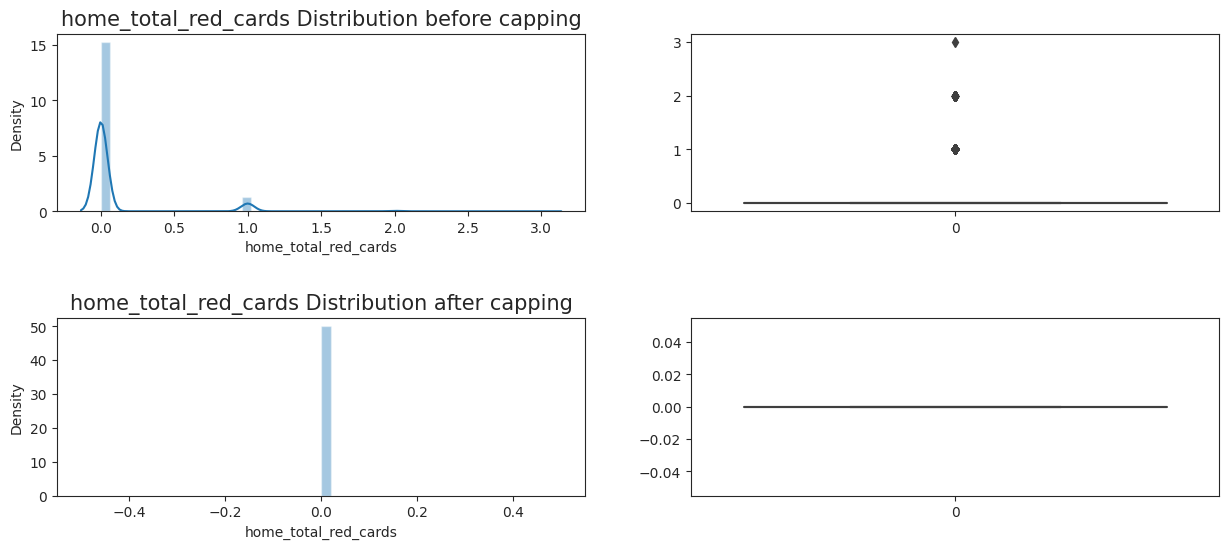

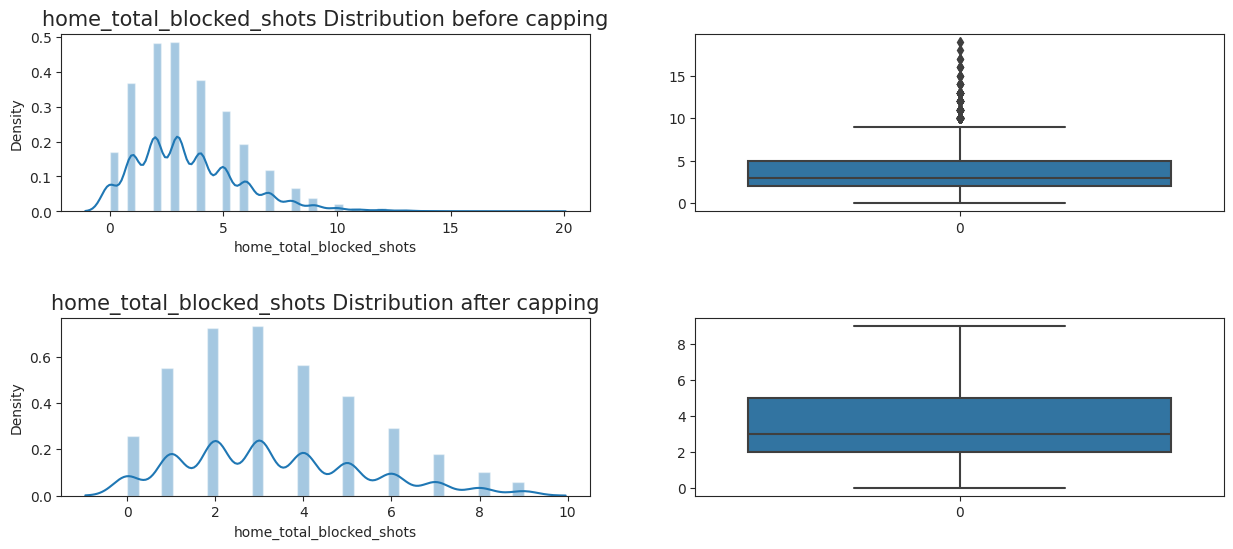

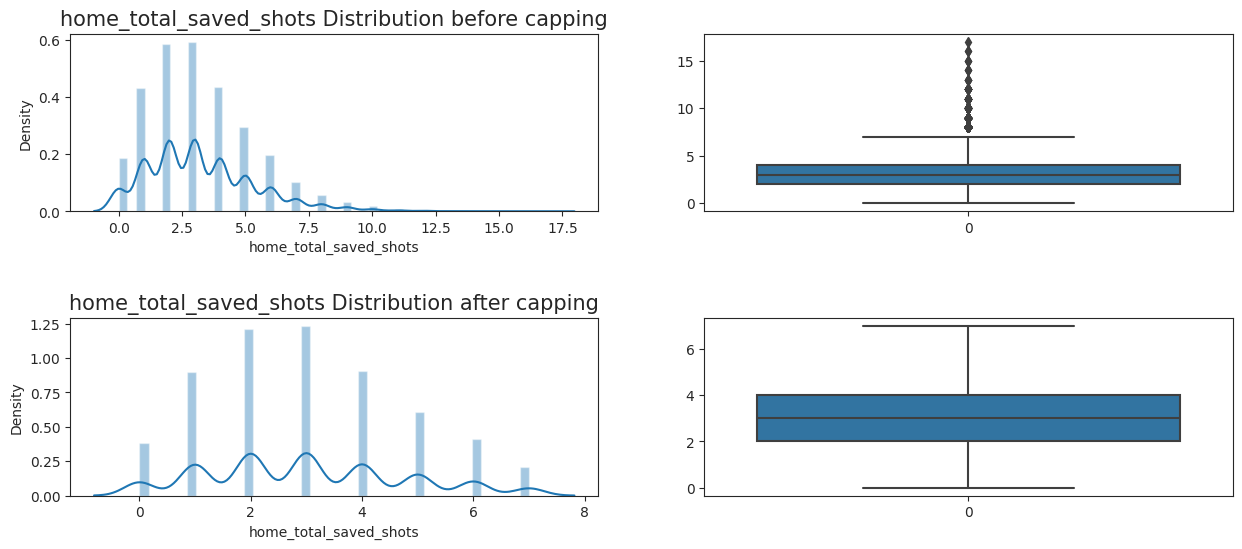

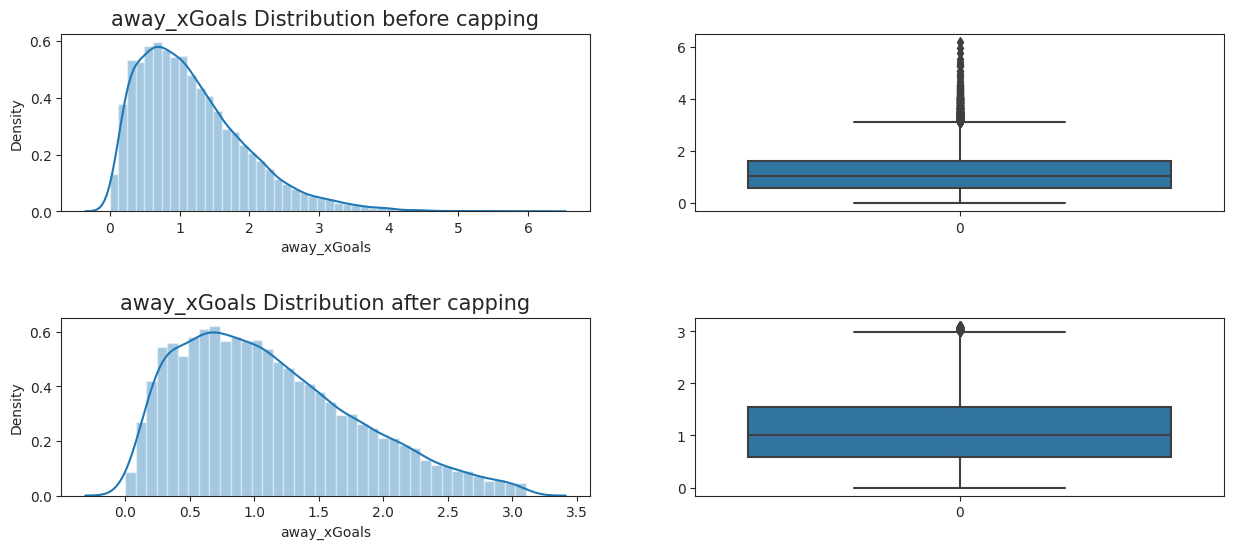

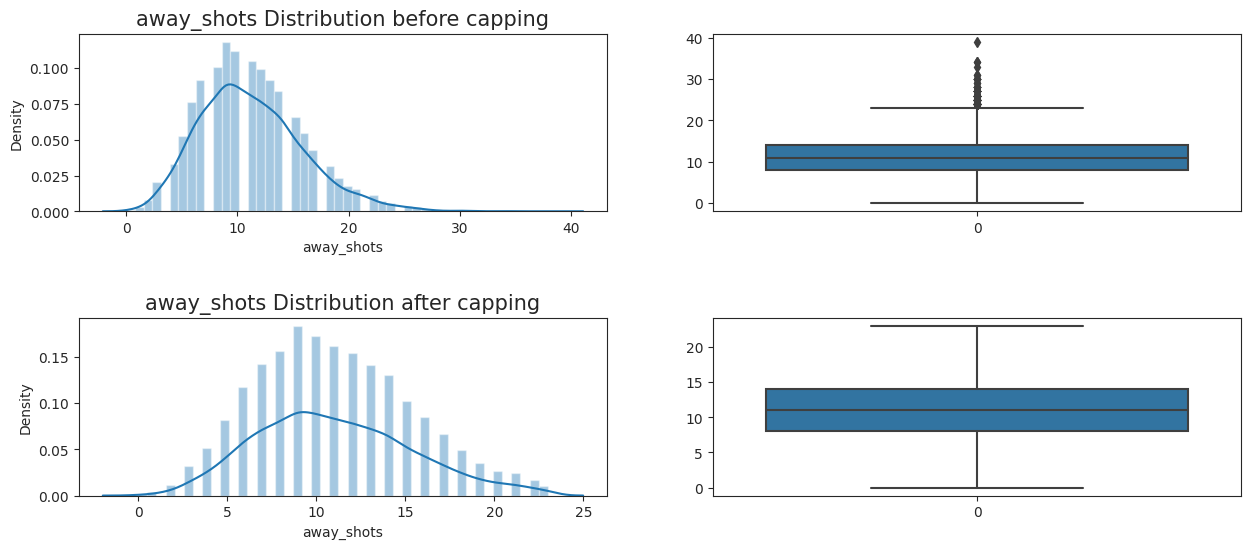

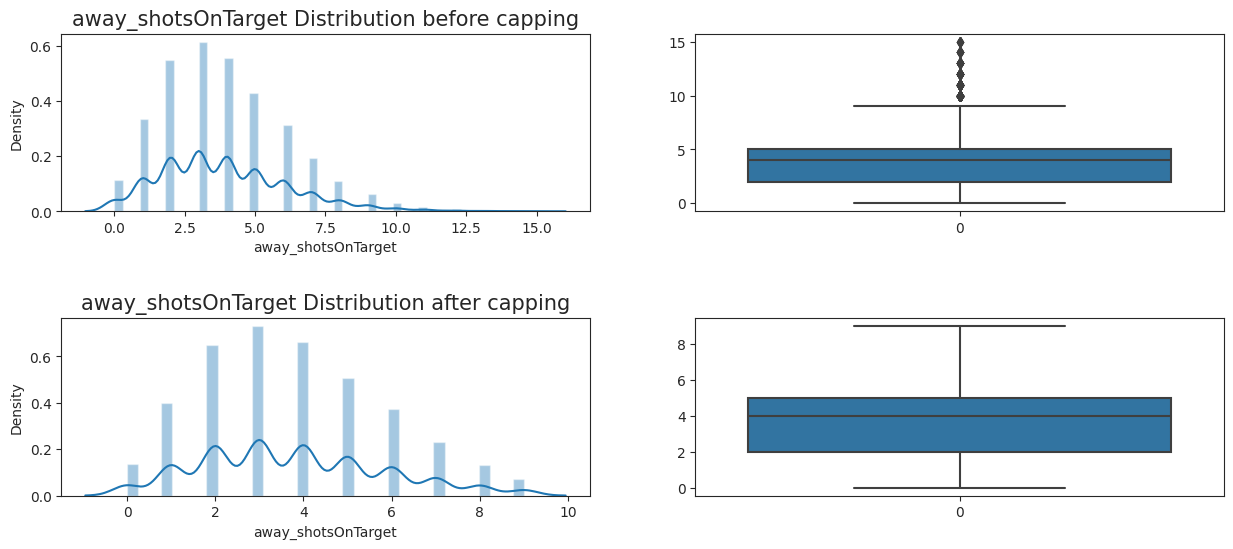

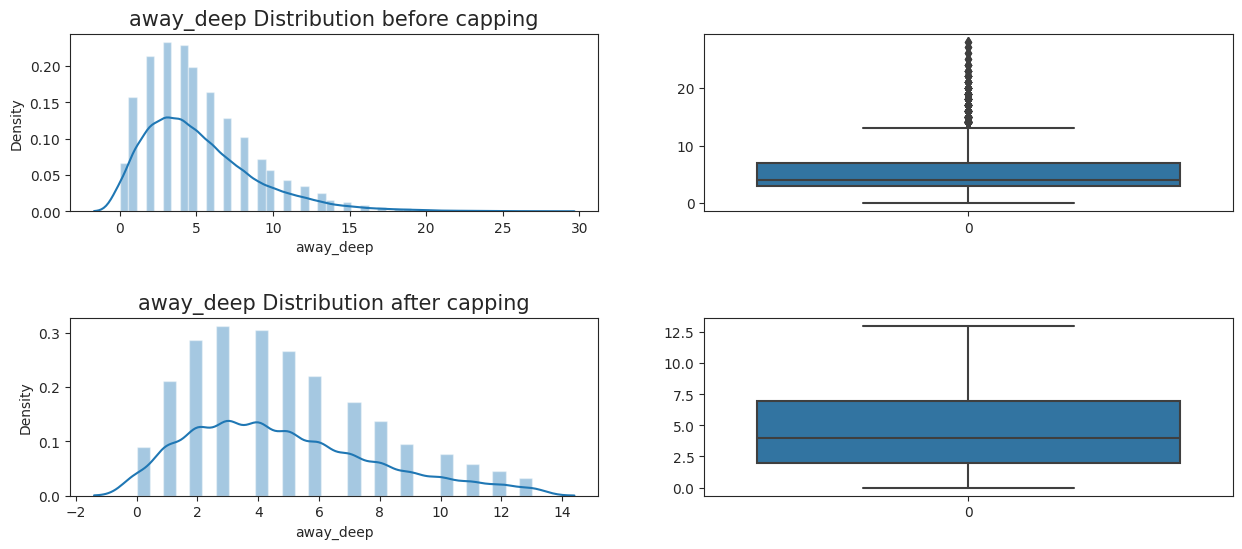

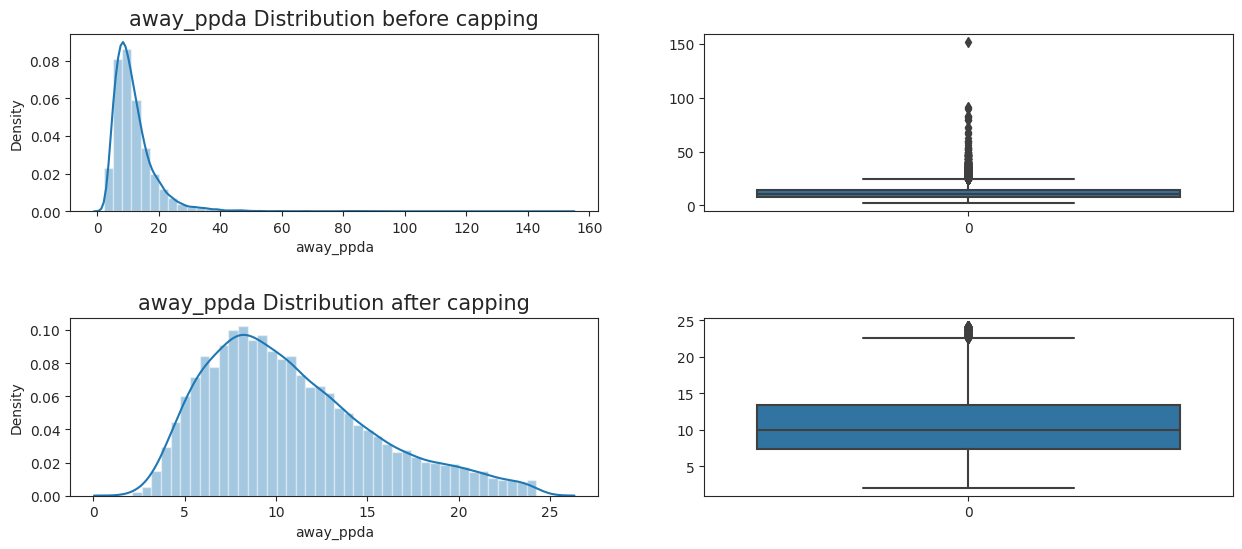

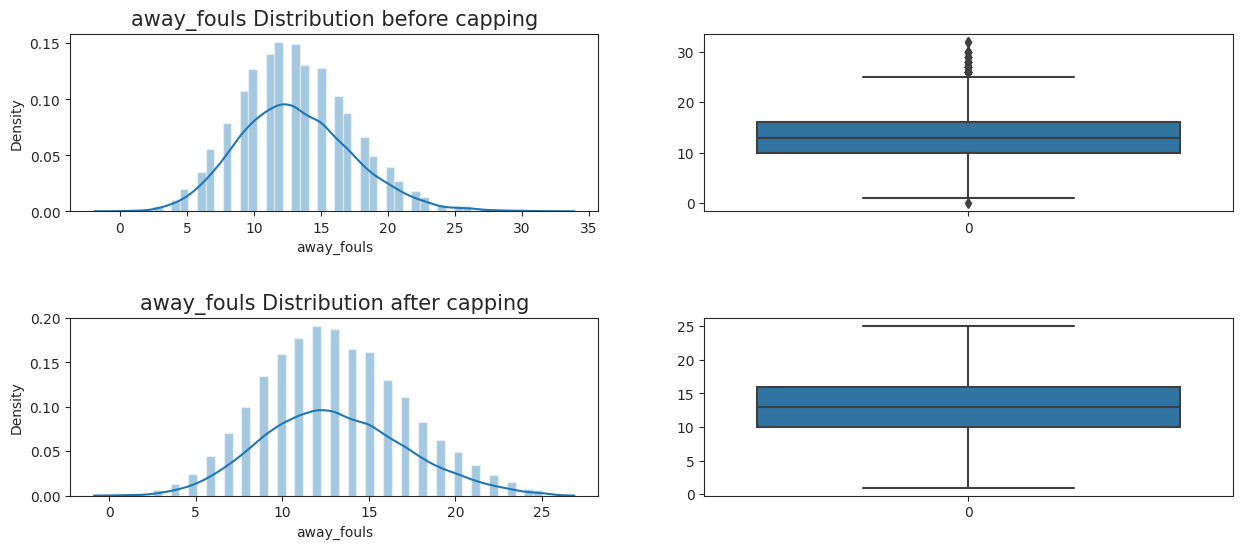

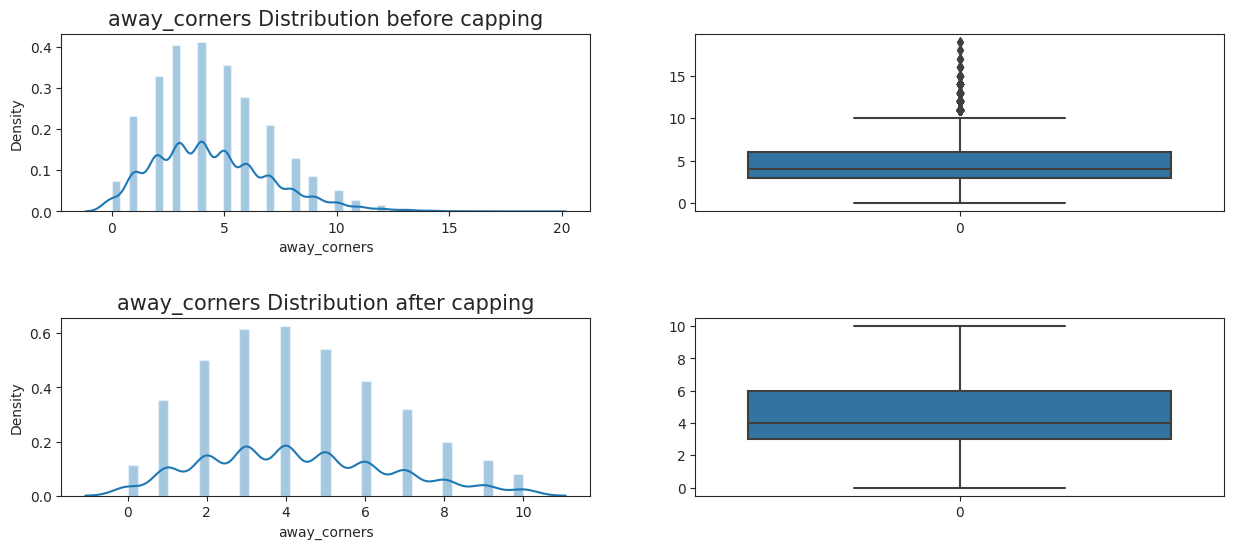

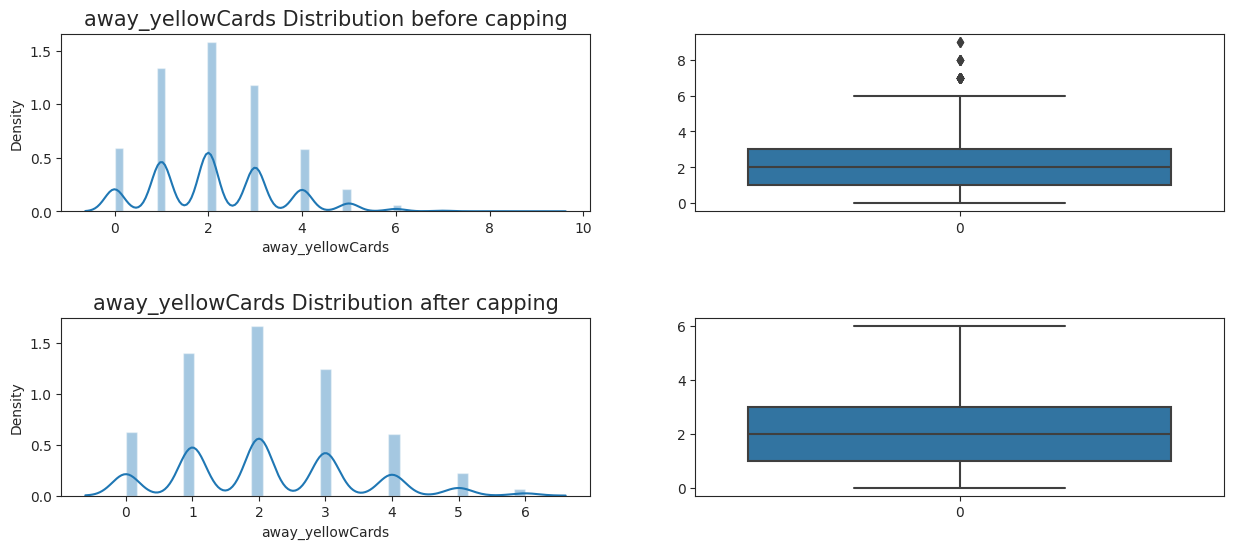

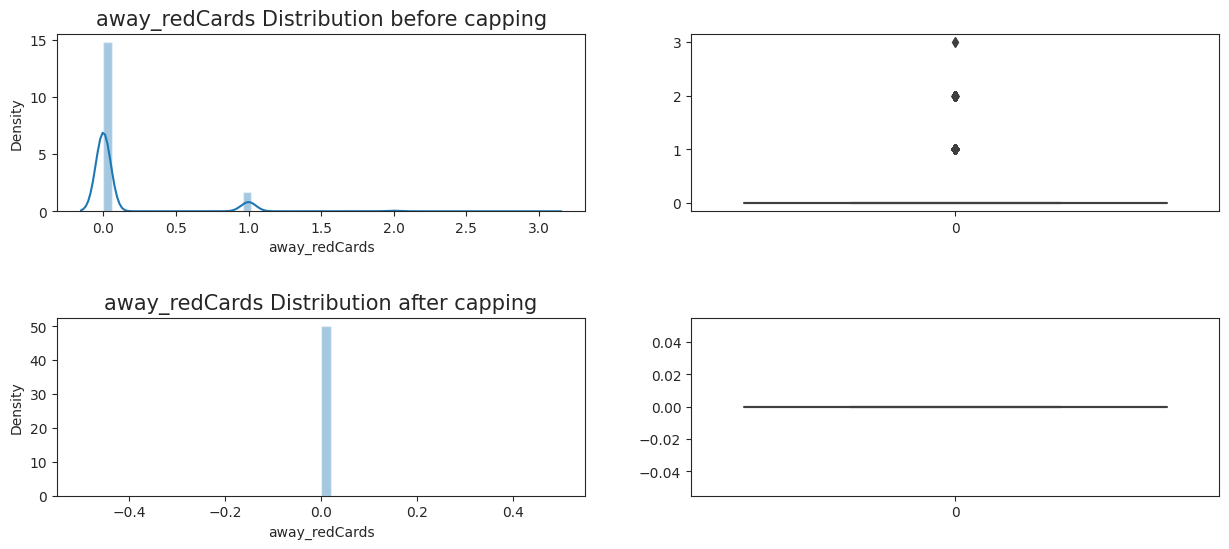

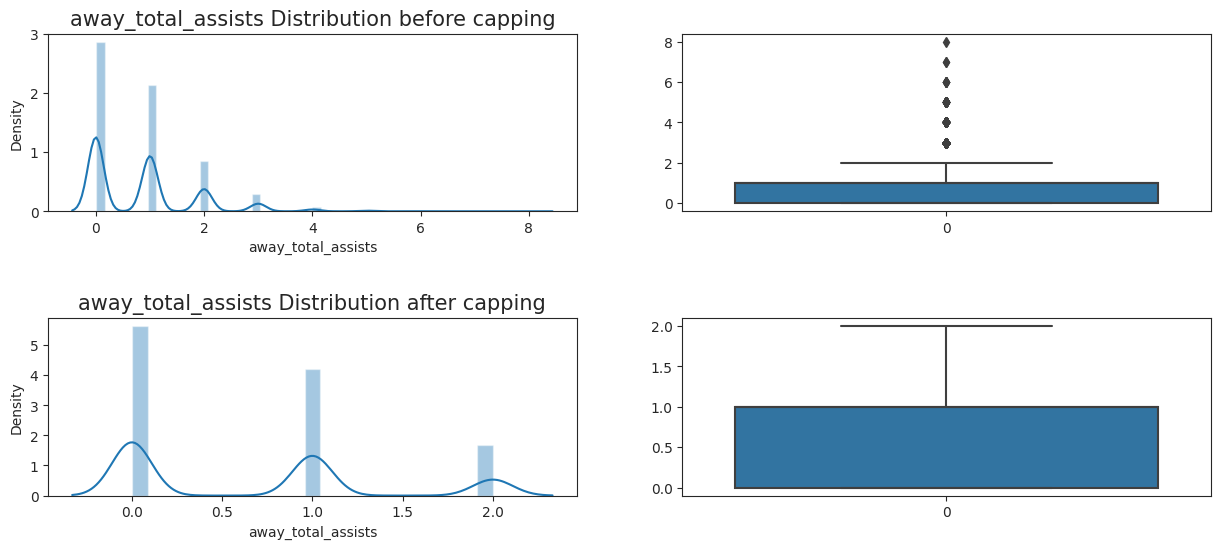

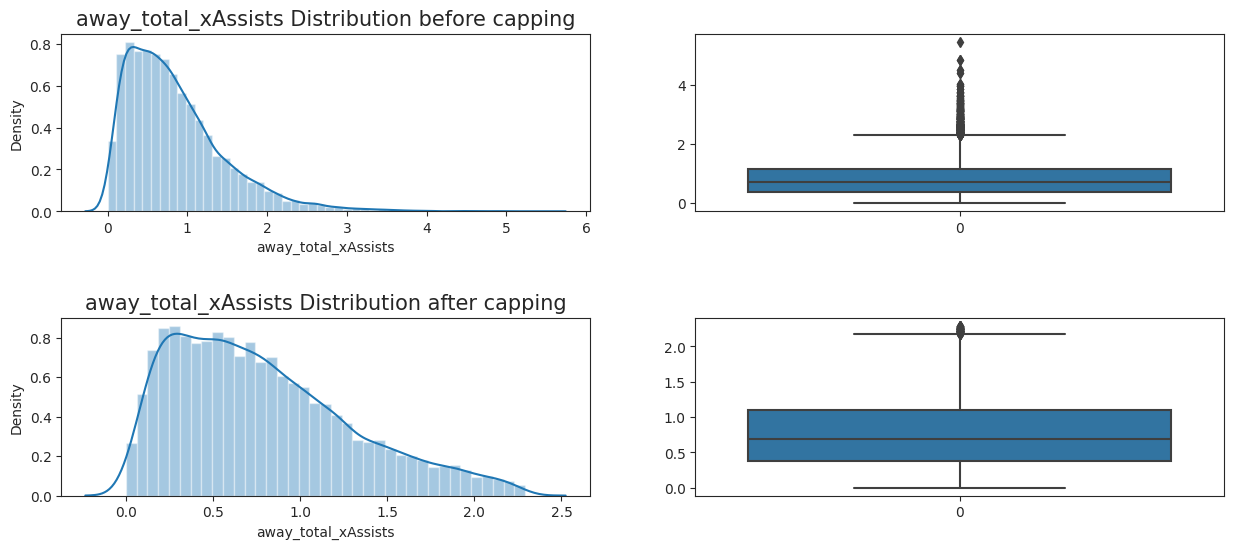

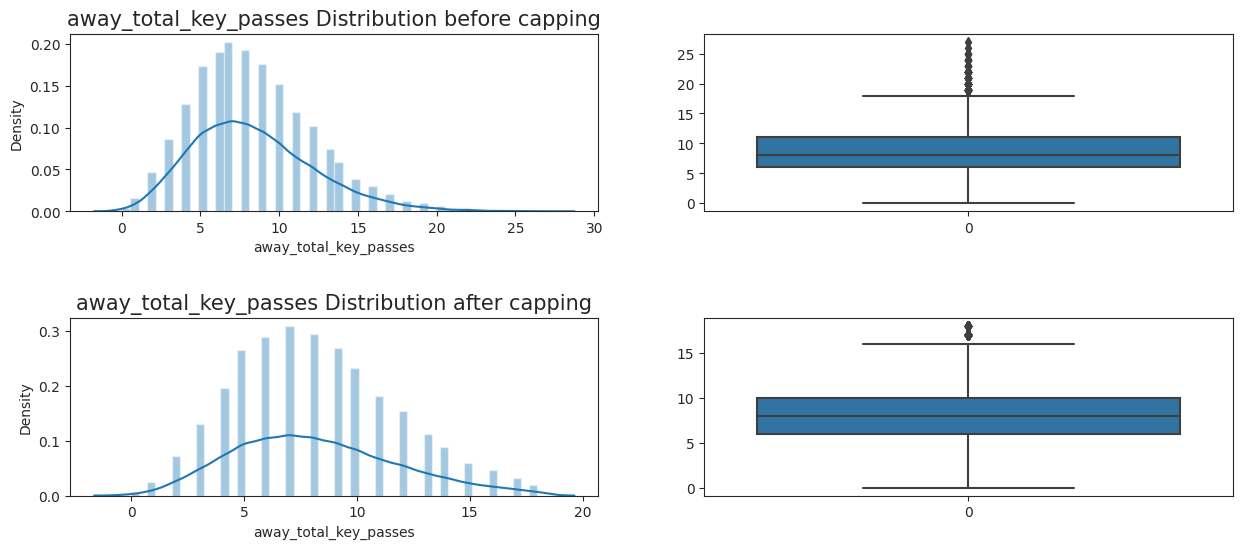

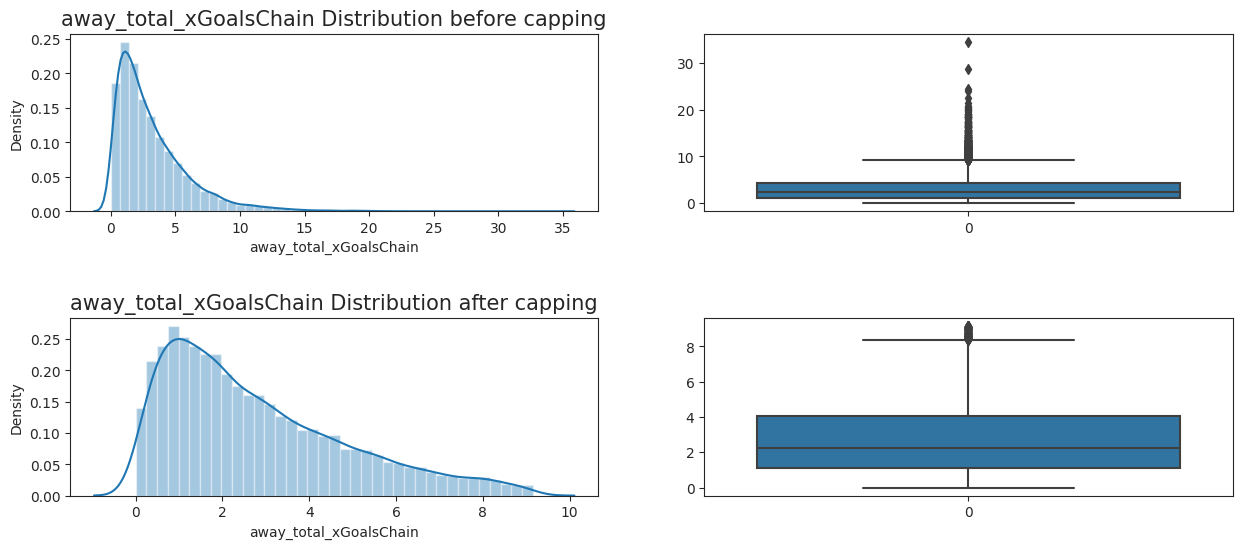

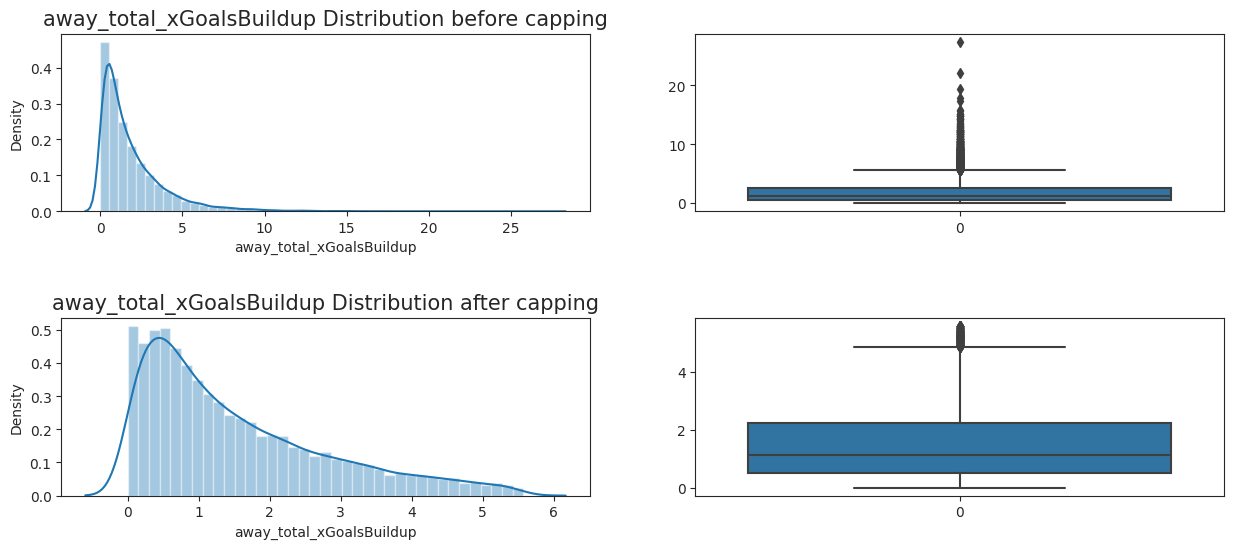

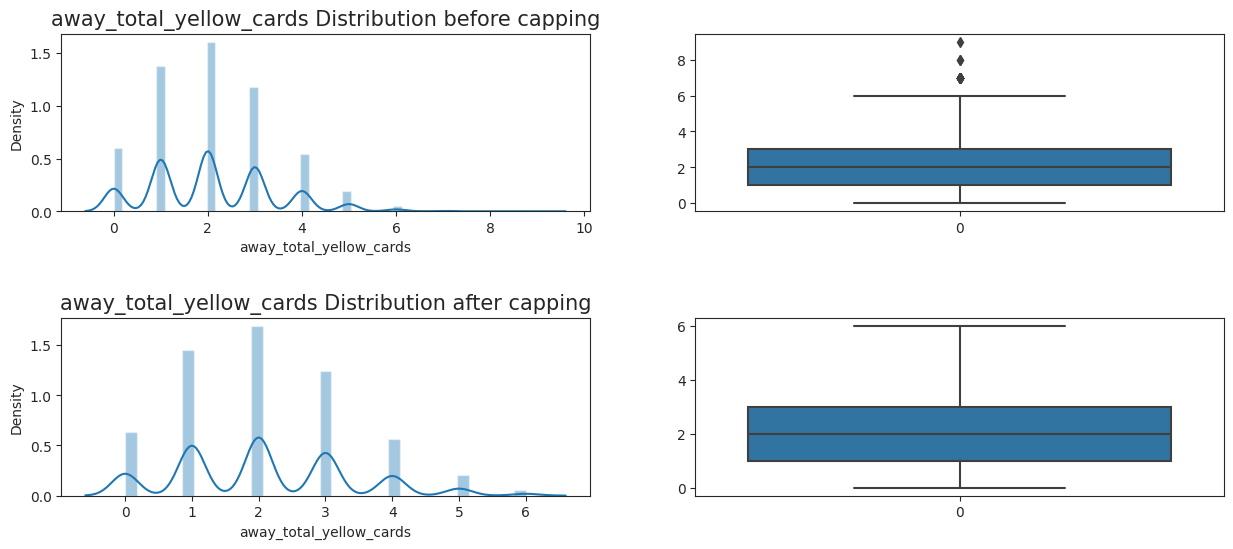

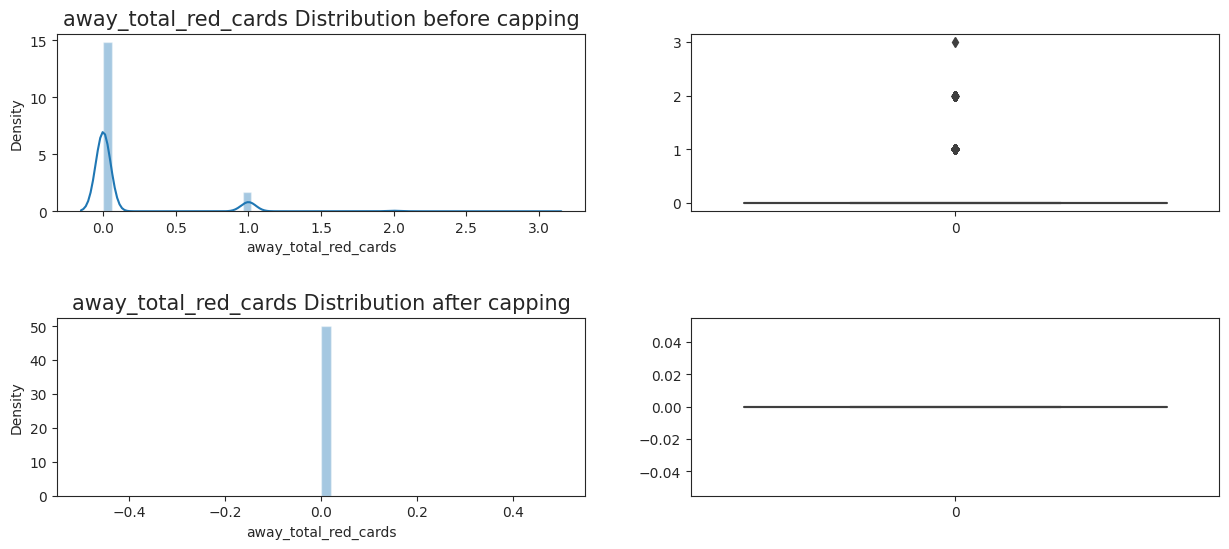

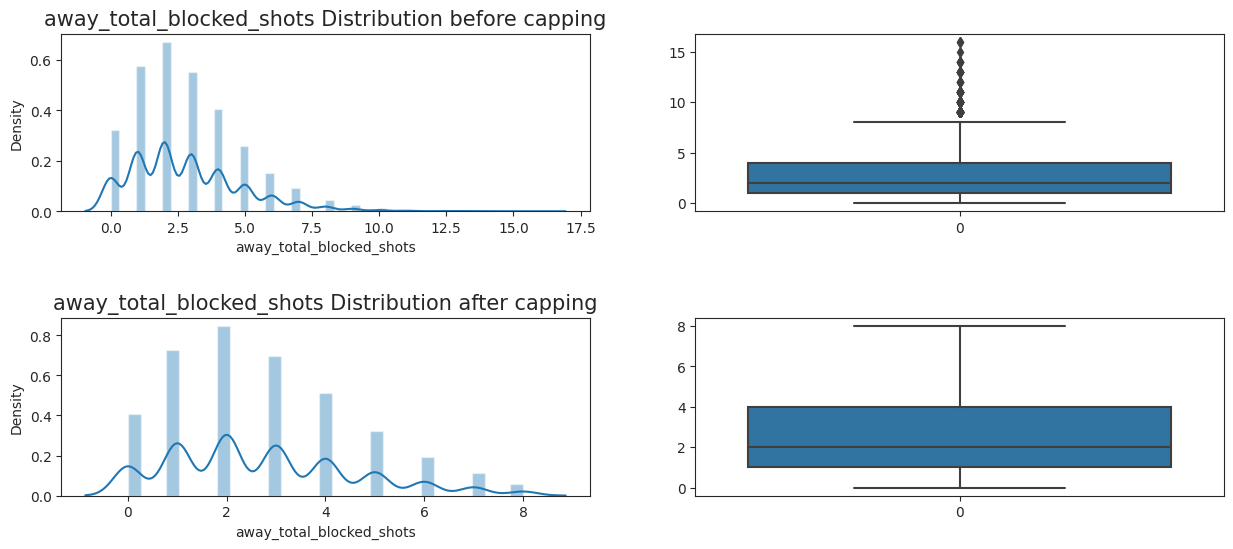

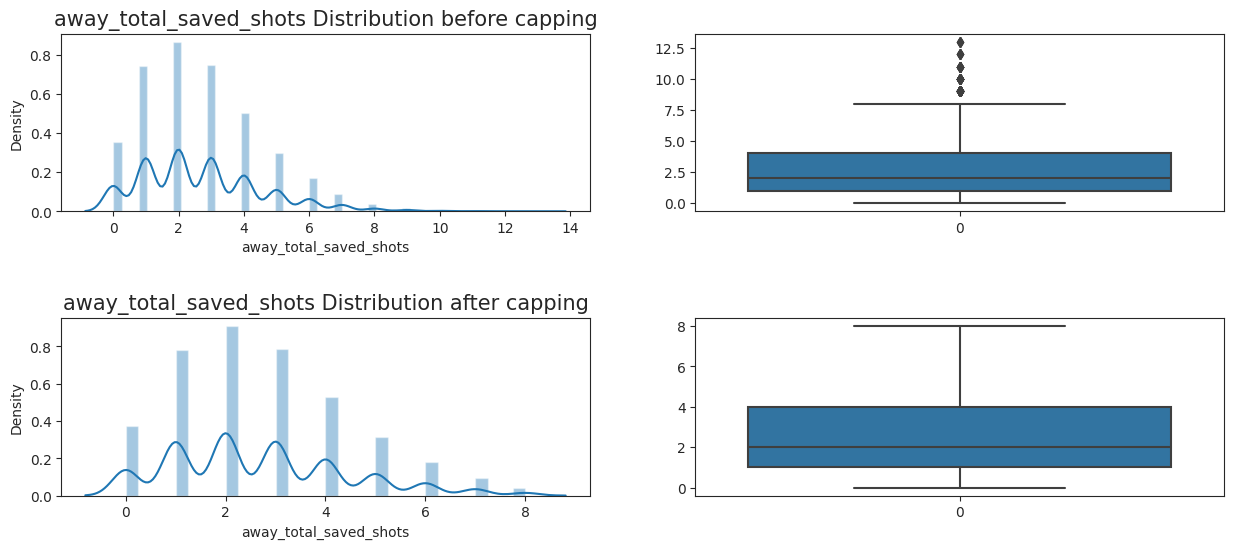

In [342]:
dist_outliers(df, capping_outliers_df, outliers_df.index)

We clearly need to filter some features that either the feature distribution has changed significantly, or cases where removing outliers results with only one value.

Checking if distribution (Kolmogorov–Smirnov) and/or correlation has changed significantly:

In [344]:
from scipy.stats import norm, ks_2samp

In [345]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test

def cocor(x1, y1, x2, y2):
    """
    Compare two Spearman correlations from independent samples using the Fisher z-transform.
    Returns a tuple (z, p_value) for a two-tailed test of whether the correlations differ.
    """
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)

    # Fisher z-transforms
    xy_z = 0.5 * np.log((1 + xy1) / (1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2) / (1 - xy2))

    # Standard error for independent samples
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))

    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)

    # Two-tailed p-value
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [346]:
def analyze_outliers(df, df_num, df_outliers, target_col, cocor_func):
    """
    Analyzes distribution (KS test) & correlation (cocor_func) changes after removing outliers.
    Returns a DataFrame with 'feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'.
    """

    c = df_num
    columns = c.columns
    out_df = pd.DataFrame(columns=['feature','outliers_cnt','distribution_changed','correlation_changed'])

    np.seterr(divide='ignore', invalid='ignore')

    for col in columns:
        out = df_num[col]
        result_out = df[target_col]

        non = df_num[col].loc[df_outliers[col] == 0]
        result_non = df[target_col].loc[df_outliers[col] == 0]

        p, pvalue = cocor_func(out, result_out, non, result_non)
        cor_change = '+' if pvalue < 0.05 else '-'

        mv = df_outliers[col].sum()

        p_ks = ks_2samp(out, non)[1]
        dist_change = '+' if p_ks < 0.05 else '-'

        out_df = out_df.append({
            'feature': col,
            'outliers_cnt': mv,
            'distribution_changed': dist_change,
            'correlation_changed': cor_change
        }, ignore_index=True)

    return out_df

In [348]:
out_df = analyze_outliers(
    df=df,
    df_num=df_num,
    df_outliers=df_outliers,
    target_col='gameresult',
    cocor_func=cocor
)

In [349]:
out_df

feature outliers_cnt distribution_changed  \
0                home_xGoals          276                    +   
1                 home_shots          167                    -   
2         home_shotsOnTarget          351                    +   
3                  home_deep          227                    +   
4                  home_ppda          540                    +   
5                 home_fouls          241                    +   
6               home_corners          143                    -   
7           home_yellowCards           37                    -   
8              home_redCards         1078                    +   
9         home_total_assists           20                    -   
10       home_total_xAssists          346                    +   
11     home_total_key_passes          123                    -   
12    home_total_xGoalsChain          523                    +   
13  home_total_xGoalsBuildup          664                    +   
14   home_total_yellow_cards           20                    -   
15      home_total_red_cards         1064                    +   
16  home_total_blocked_shots          230                    +   
17    home_total_saved_shots          532                    +   
18               away_xGoals          312                    +   
19                away_shots          161                    -   
20        away_shotsOnTarget          233                    +   
21                 away_deep          423                    +   
22                 away_ppda          606                    +   
23                away_fouls           81                    -   
24              away_corners          283                    +   
25          away_yellowCards           43                    -   
26             away_redCards         1396                    +   
27        away_total_assists          790                    +   
28       away_total_xAssists          389                    +   
29     away_total_key_passes          169                    -   
30    away_total_xGoalsChain          538                    +   
31  away_total_xGoalsBuildup          718                    +   
32   away_total_yellow_cards           26                    -   
33      away_total_red_cards         1382                    +   
34  away_total_blocked_shots          187                    -   
35    away_total_saved_shots           95                    -   

   correlation_changed  
0                    -  
1                    -  
2                    -  
3                    -  
4                    +  
5                    -  
6                    -  
7                    -  
8                    -  
9                    -  
10                   -  
11                   -  
12                   +  
13                   +  
14                   -  
15                   -  
16                   -  
17                   -  
18                   +  
19                   -  
20                   -  
21                   -  
22                   +  
23                   -  
24                   -  
25                   -  
26                   -  
27                   +  
28                   +  
29                   -  
30                   +  
31                   +  
32                   -  
33                   -  
34                   -  
35                   -

In [350]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change the distribution
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

feature outliers_cnt distribution_changed  \
0                home_xGoals          276                    +   
1                 home_shots          167                    -   
2         home_shotsOnTarget          351                    +   
3                  home_deep          227                    +   
4                  home_ppda          540                    +   
5                 home_fouls          241                    +   
6               home_corners          143                    -   
7           home_yellowCards           37                    -   
8              home_redCards         1078                    +   
9         home_total_assists           20                    -   
10       home_total_xAssists          346                    +   
11     home_total_key_passes          123                    -   
12    home_total_xGoalsChain          523                    +   
13  home_total_xGoalsBuildup          664                    +   
14   home_total_yellow_cards           20                    -   
15      home_total_red_cards         1064                    +   
16  home_total_blocked_shots          230                    +   
17    home_total_saved_shots          532                    +   
18               away_xGoals          312                    +   
19                away_shots          161                    -   
20        away_shotsOnTarget          233                    +   
21                 away_deep          423                    +   
22                 away_ppda          606                    +   
23                away_fouls           81                    -   
24              away_corners          283                    +   
25          away_yellowCards           43                    -   
26             away_redCards         1396                    +   
27        away_total_assists          790                    +   
28       away_total_xAssists          389                    +   
29     away_total_key_passes          169                    -   
30    away_total_xGoalsChain          538                    +   
31  away_total_xGoalsBuildup          718                    +   
32   away_total_yellow_cards           26                    -   
33      away_total_red_cards         1382                    +   
34  away_total_blocked_shots          187                    -   
35    away_total_saved_shots           95                    -   

   correlation_changed drop  
0                    -  yes  
1                    -  yes  
2                    -  yes  
3                    -  yes  
4                    +   no  
5                    -  yes  
6                    -  yes  
7                    -  yes  
8                    -  yes  
9                    -  yes  
10                   -  yes  
11                   -  yes  
12                   +   no  
13                   +   no  
14                   -  yes  
15                   -  yes  
16                   -  yes  
17                   -  yes  
18                   +   no  
19                   -  yes  
20                   -  yes  
21                   -  yes  
22                   +   no  
23                   -  yes  
24                   -  yes  
25                   -  yes  
26                   -  yes  
27                   +   no  
28                   +   no  
29                   -  yes  
30                   +   no  
31                   +   no  
32                   -  yes  
33                   -  yes  
34                   -  yes  
35                   -  yes

In [351]:
out_df.groupby('drop').size()

drop
no      9
yes    27
dtype: int64

There are 27 features in total where removal of the outliers does not affect neither correlation nor distribution. And 36 features that shall be removed.

In [352]:
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

0                  home_xGoals
1                   home_shots
2           home_shotsOnTarget
3                    home_deep
5                   home_fouls
6                 home_corners
7             home_yellowCards
8                home_redCards
9           home_total_assists
10         home_total_xAssists
11       home_total_key_passes
14     home_total_yellow_cards
15        home_total_red_cards
16    home_total_blocked_shots
17      home_total_saved_shots
19                  away_shots
20          away_shotsOnTarget
21                   away_deep
23                  away_fouls
24                away_corners
25            away_yellowCards
26               away_redCards
29       away_total_key_passes
32     away_total_yellow_cards
33        away_total_red_cards
34    away_total_blocked_shots
35      away_total_saved_shots
Name: feature, dtype: object

Let's see the distribution with and without outliers for does specific 15 features:

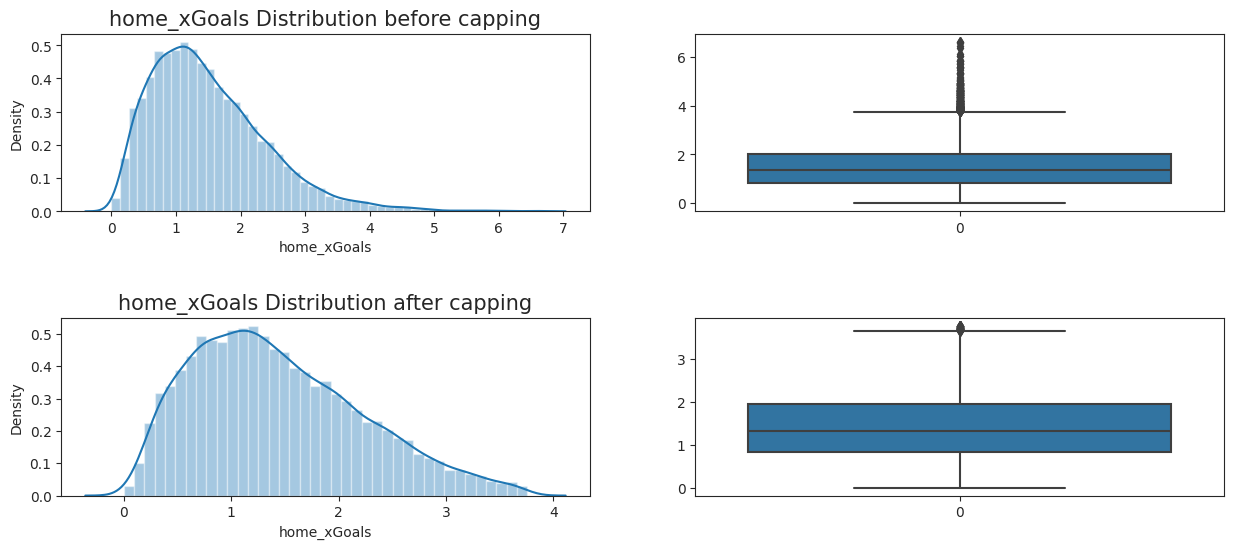

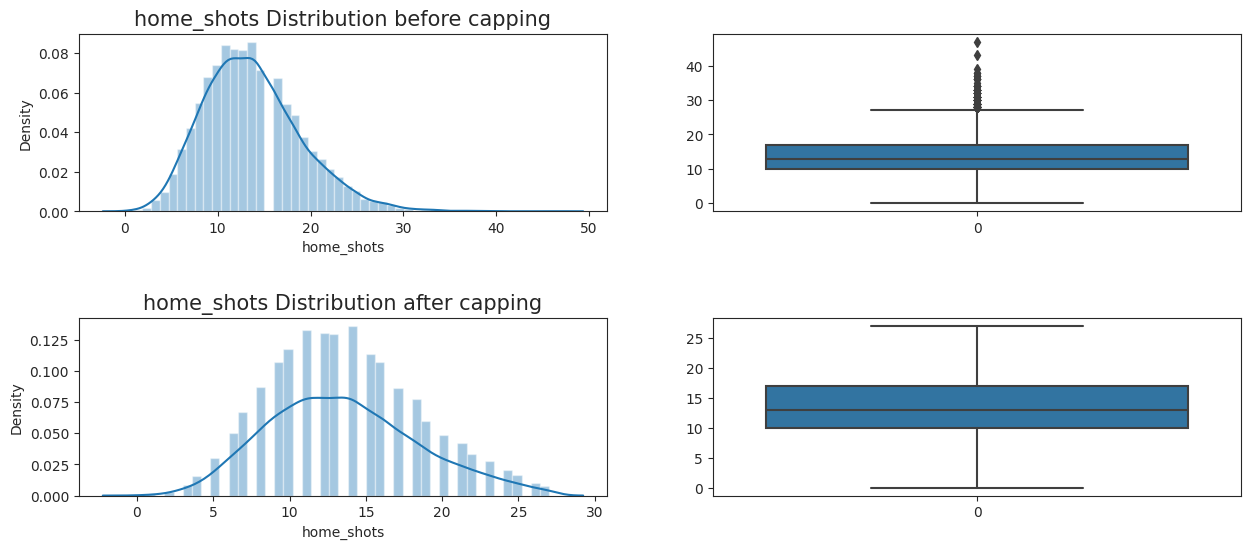

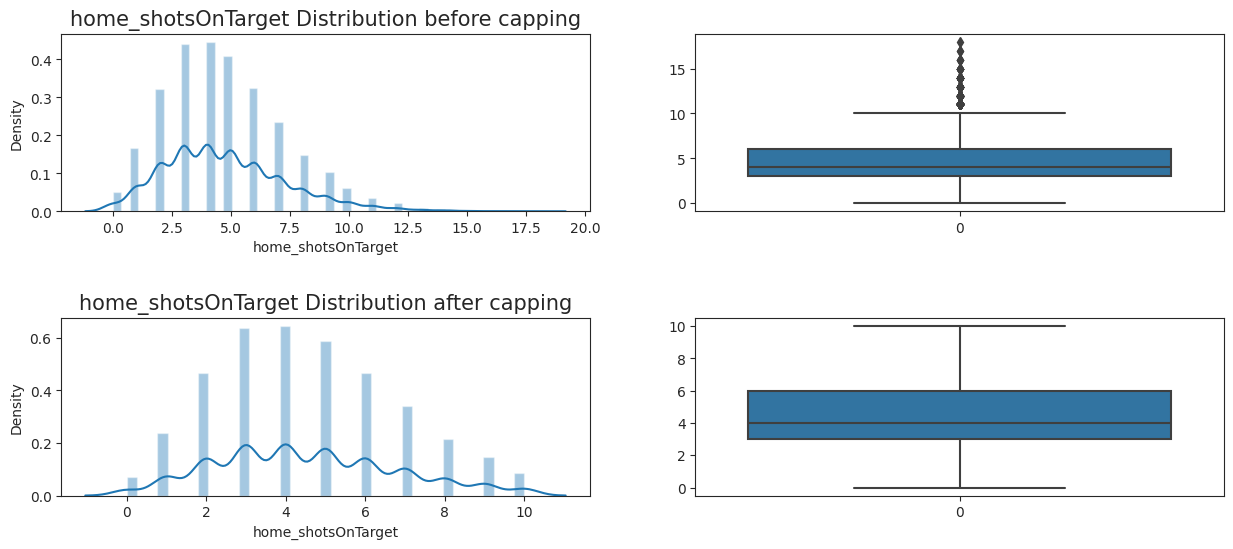

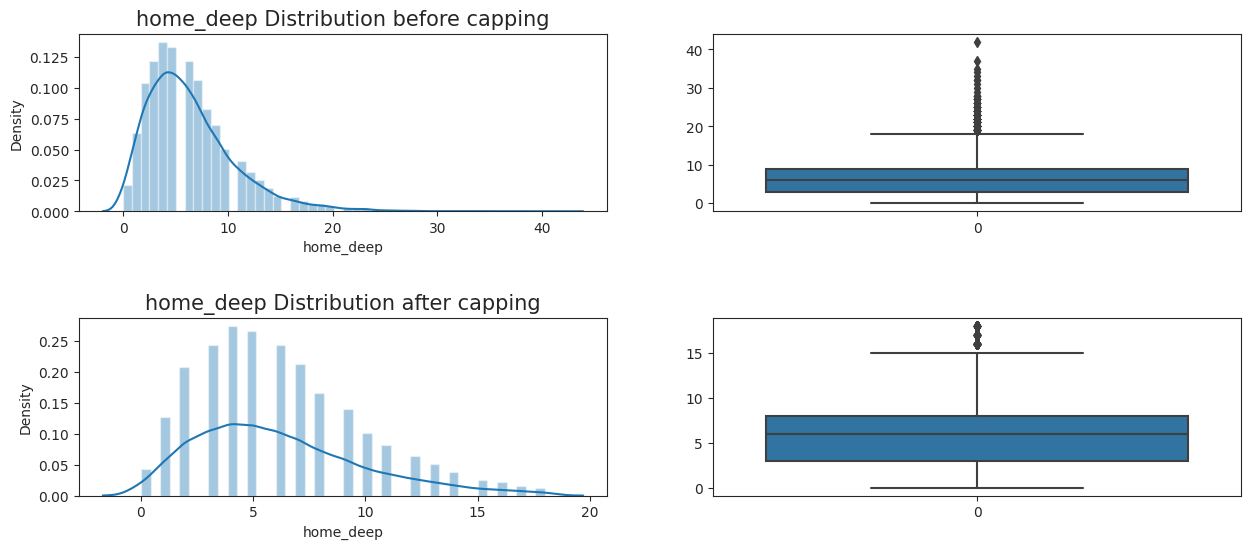

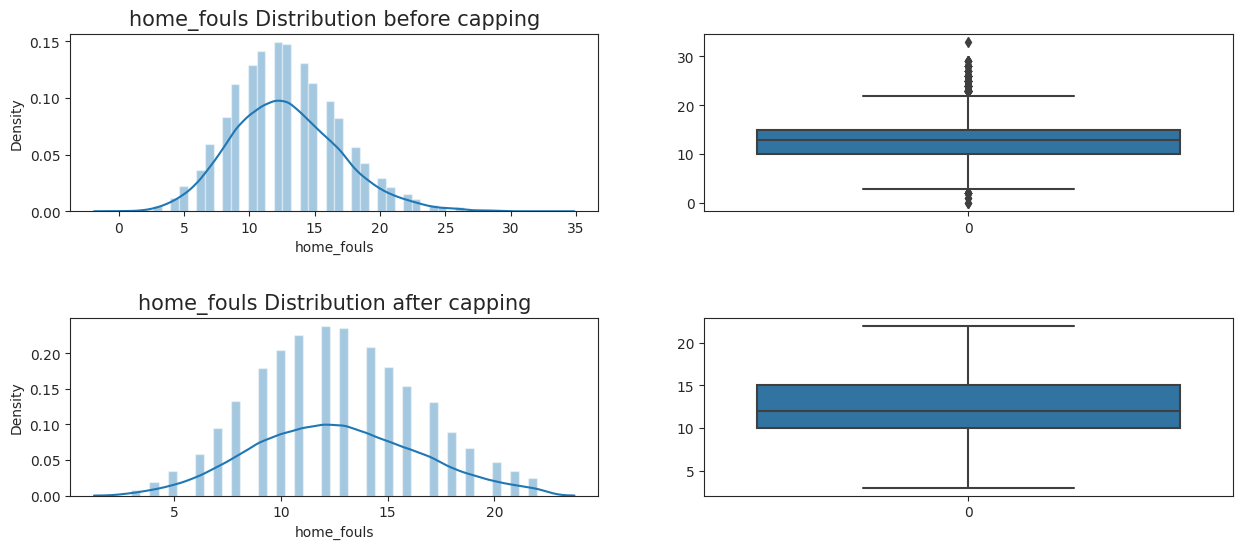

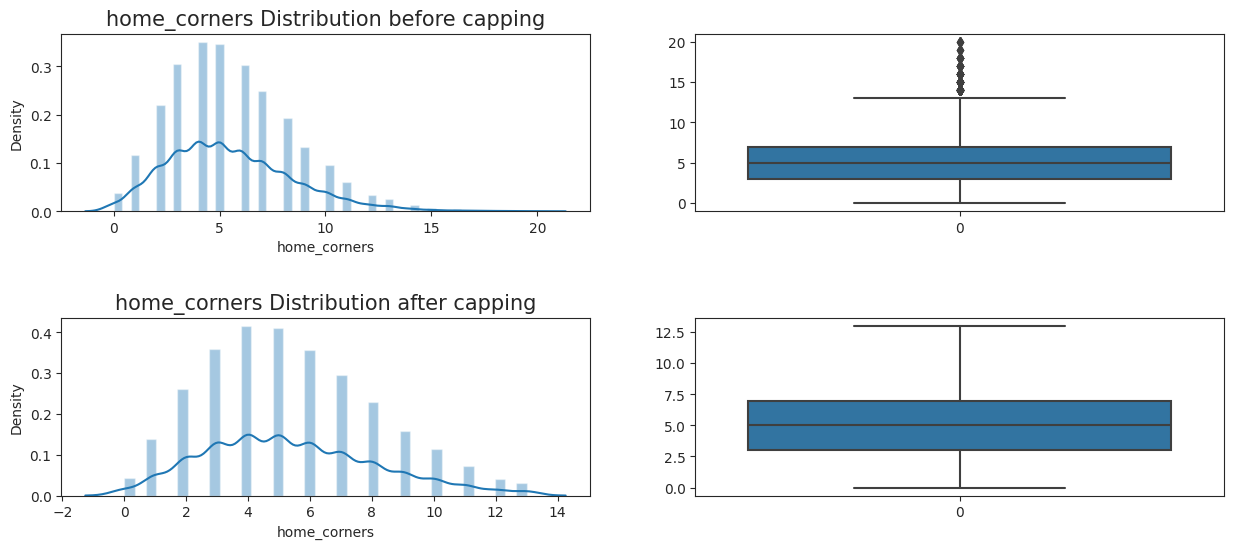

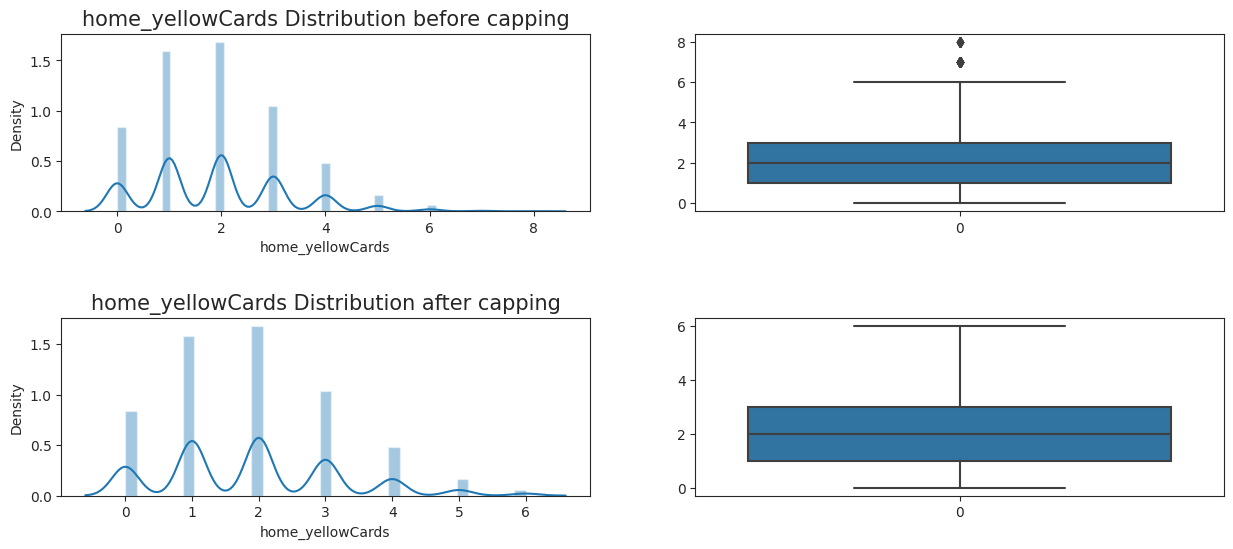

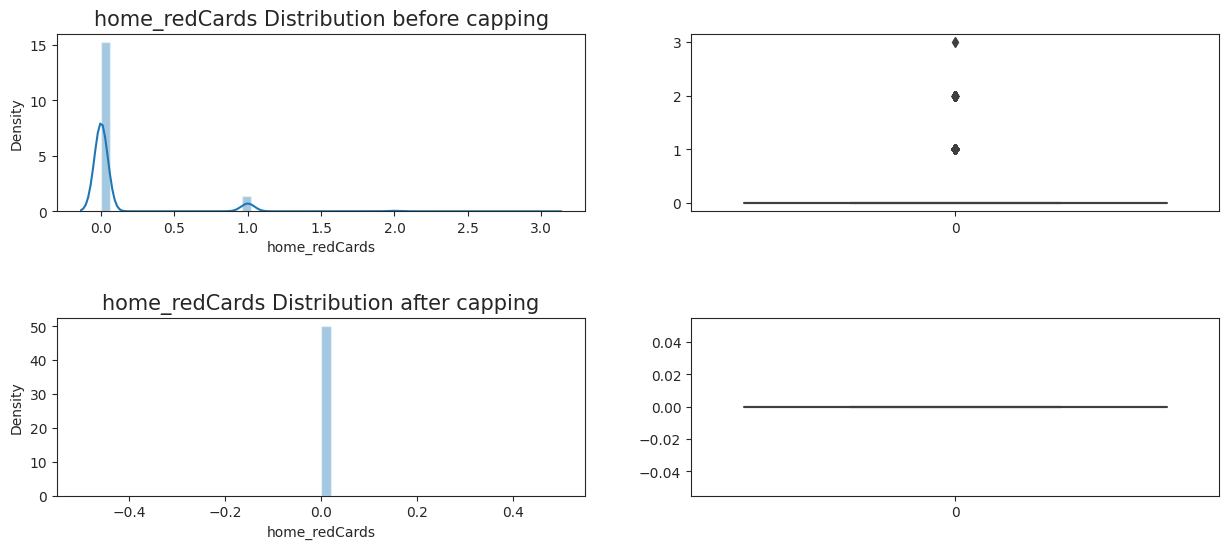

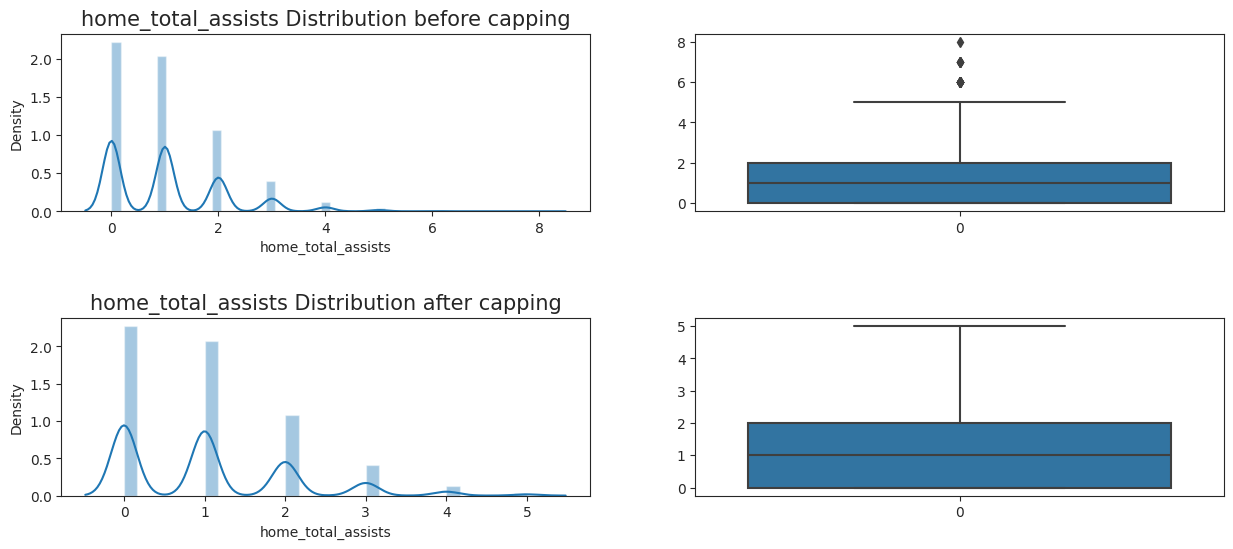

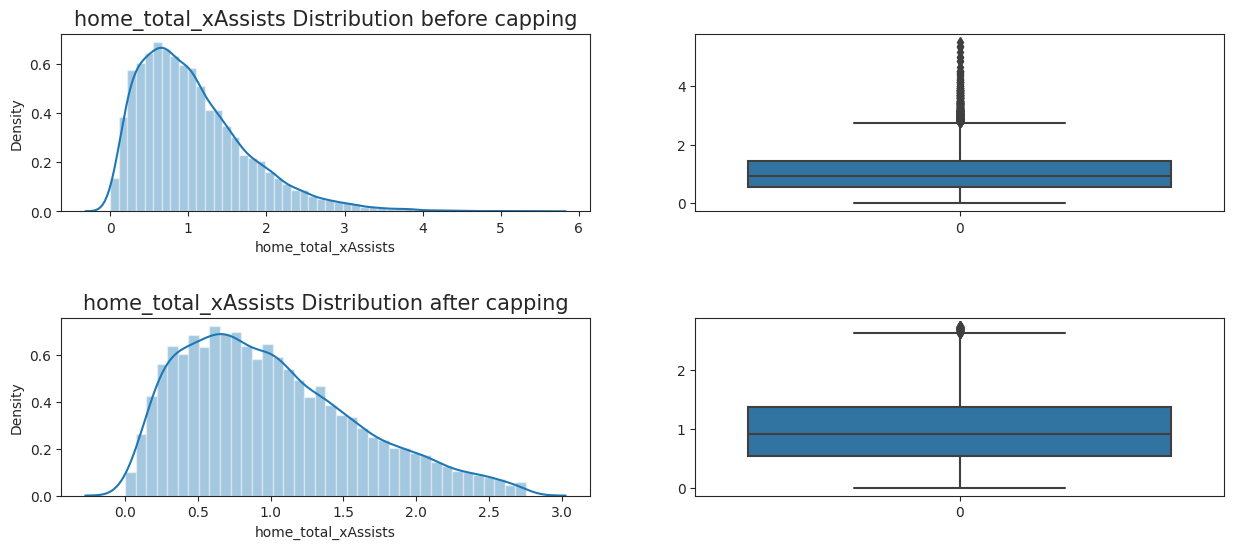

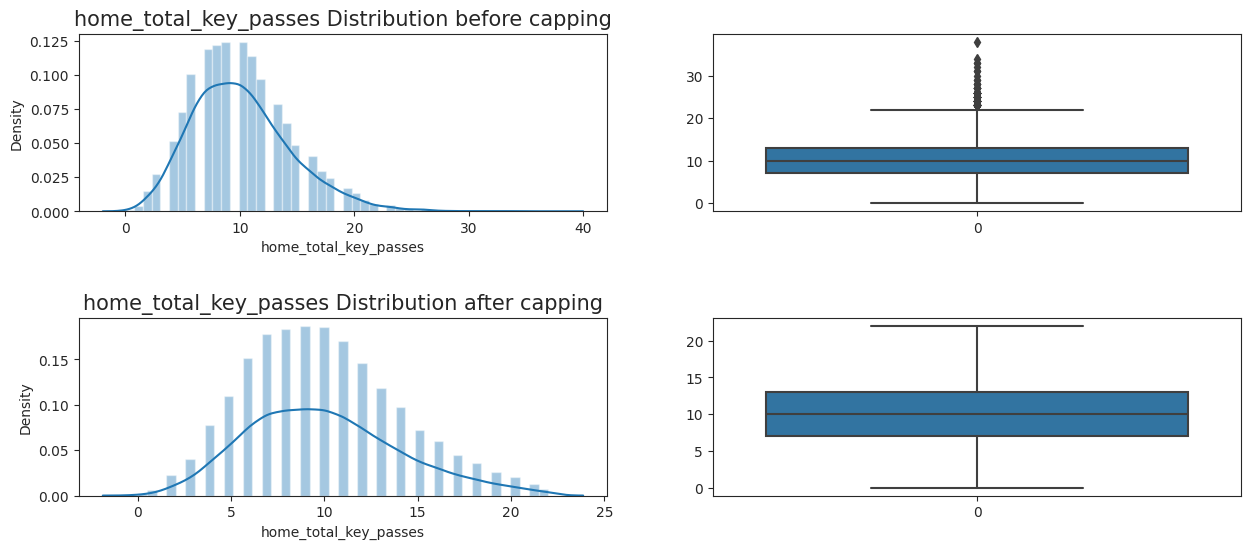

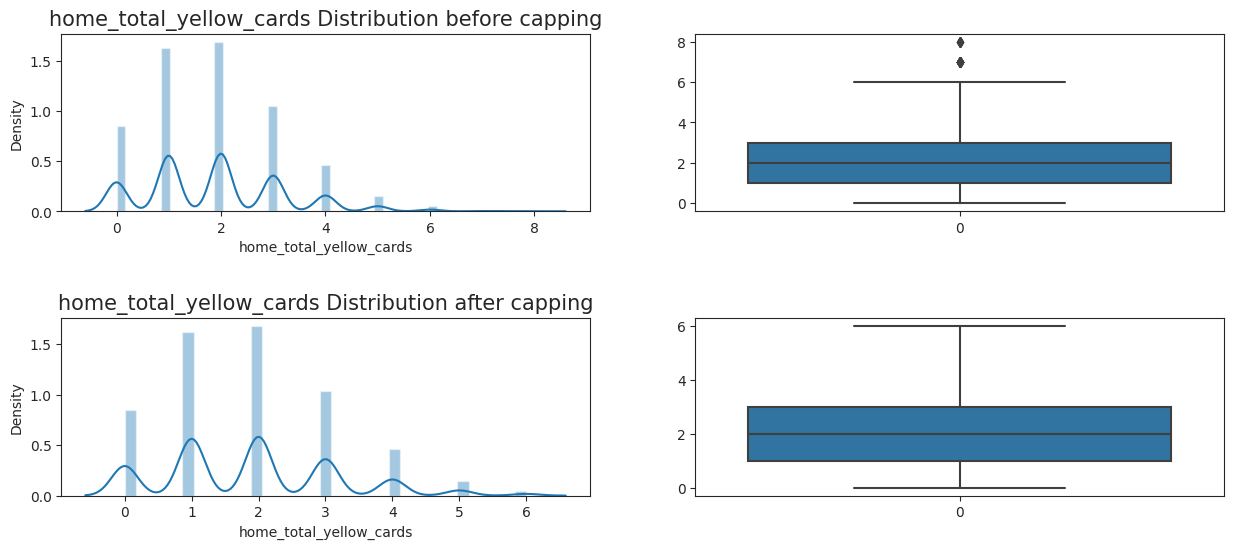

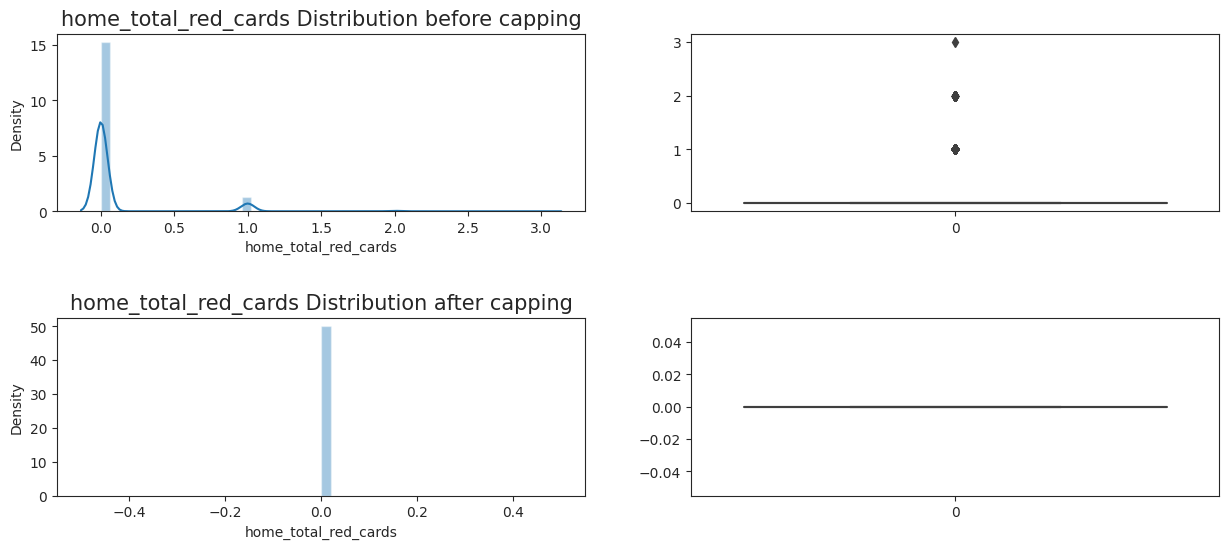

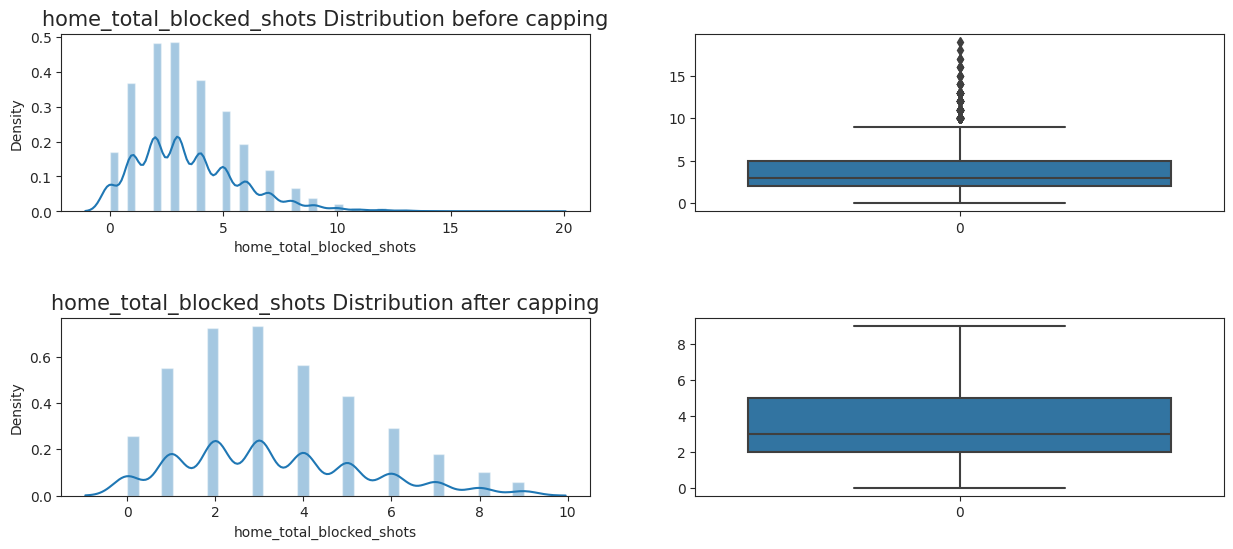

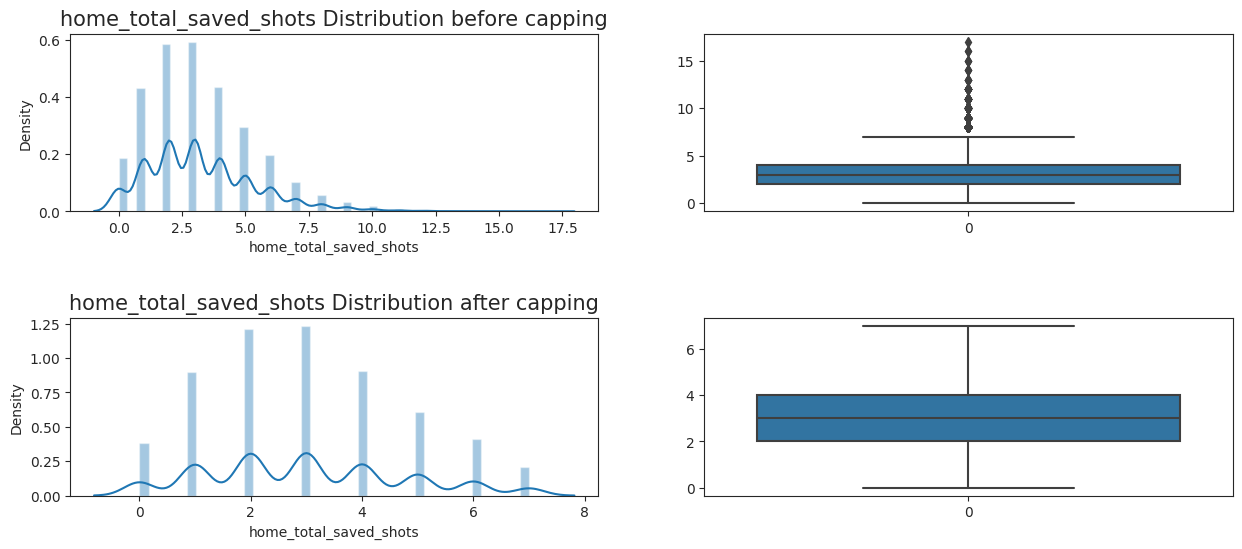

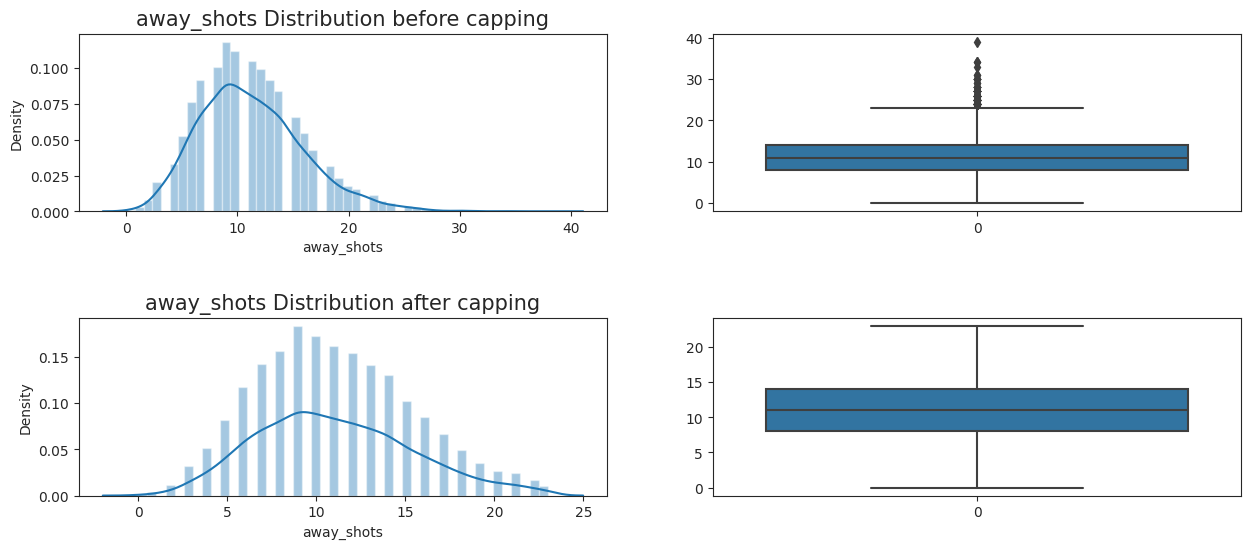

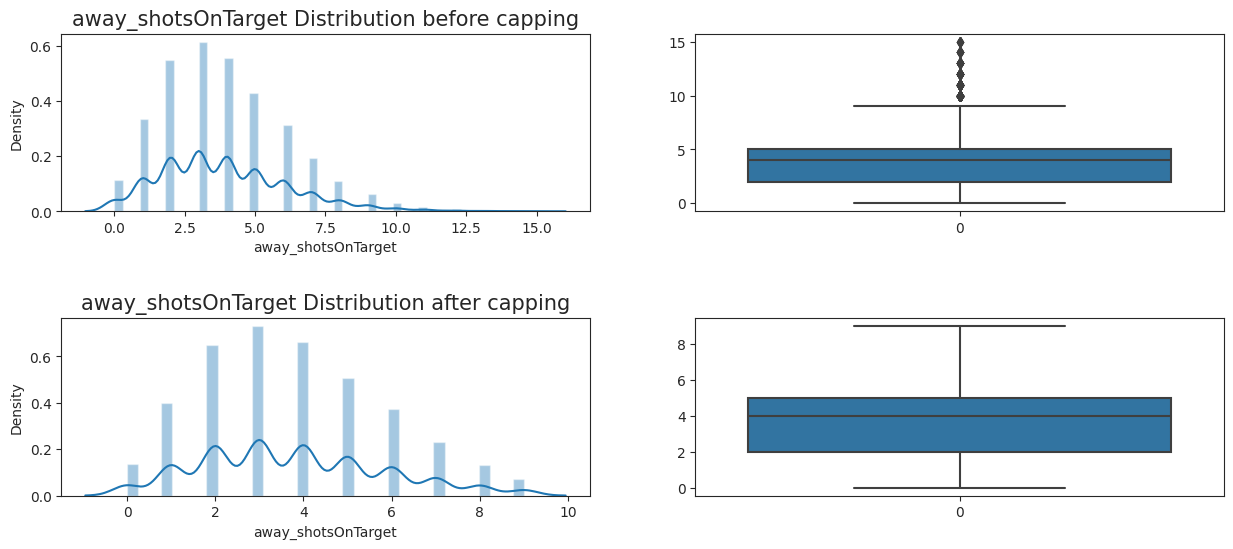

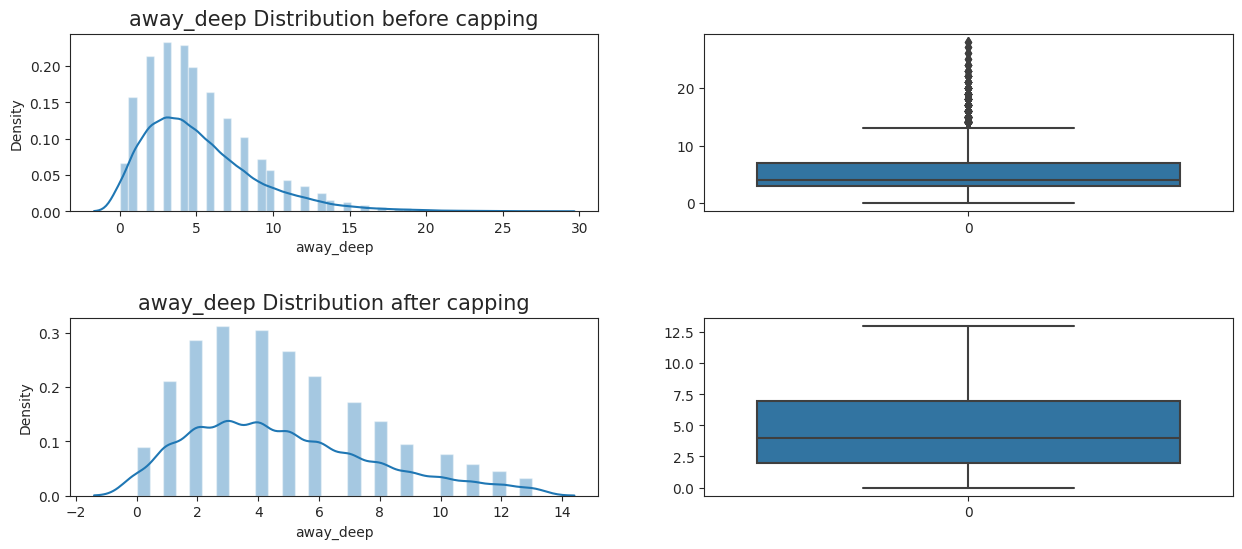

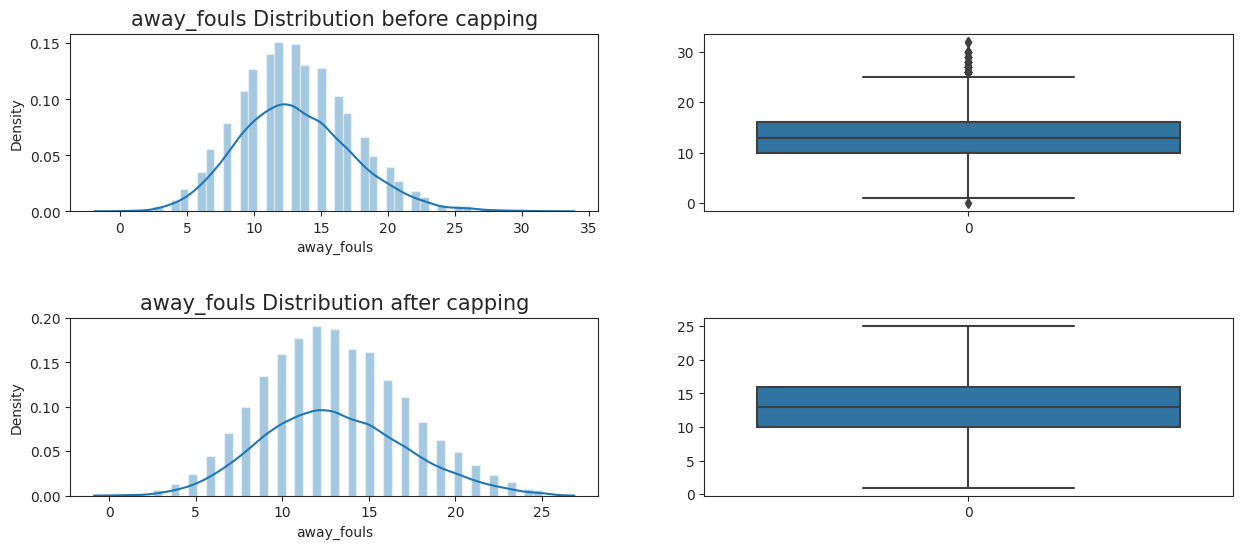

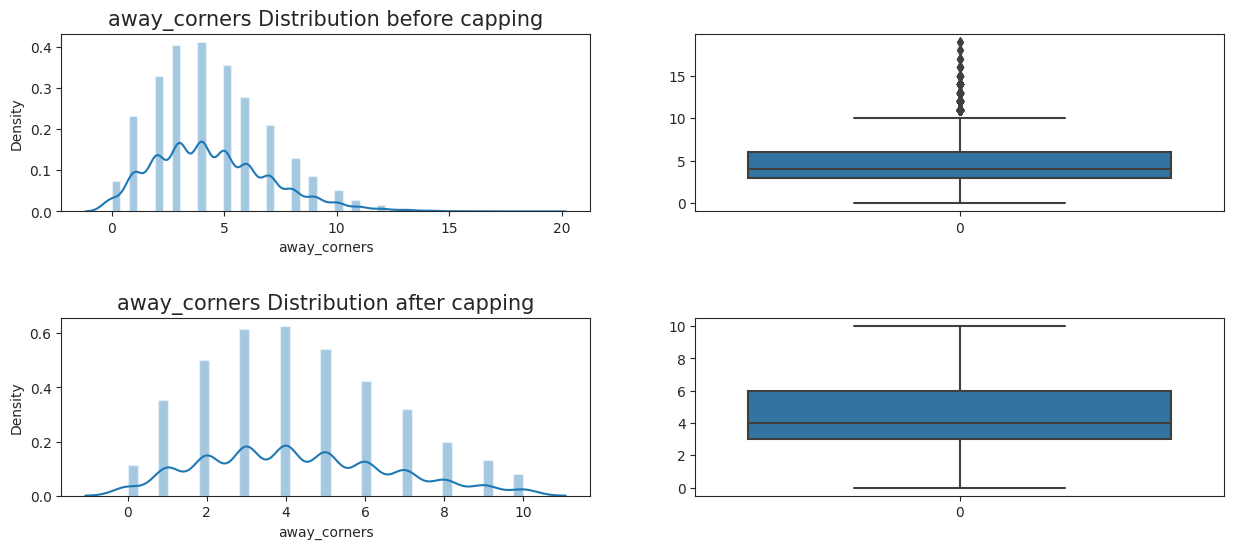

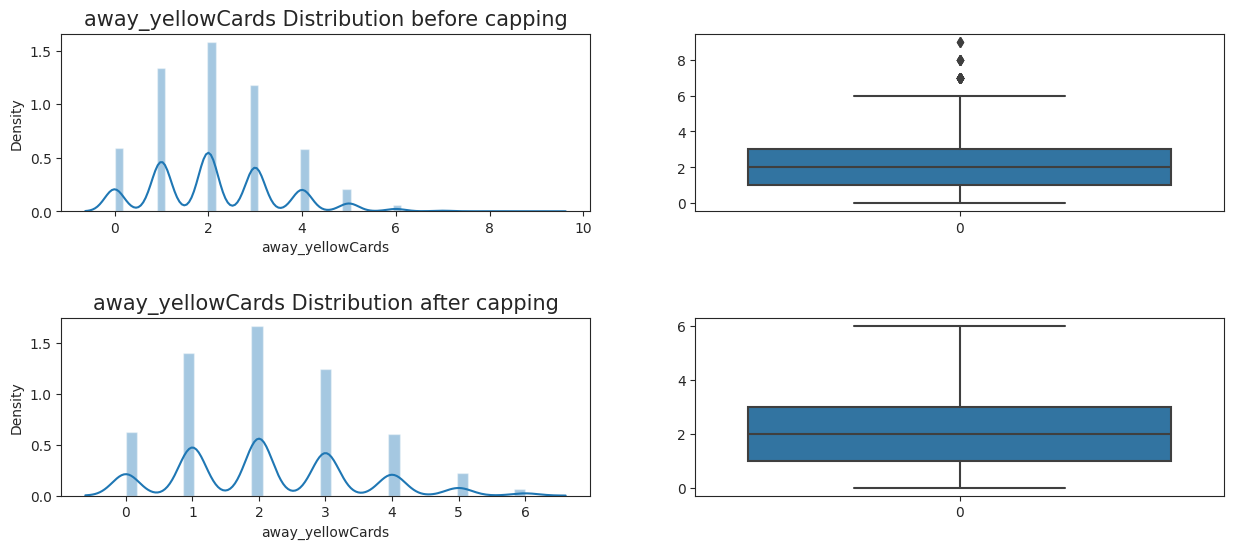

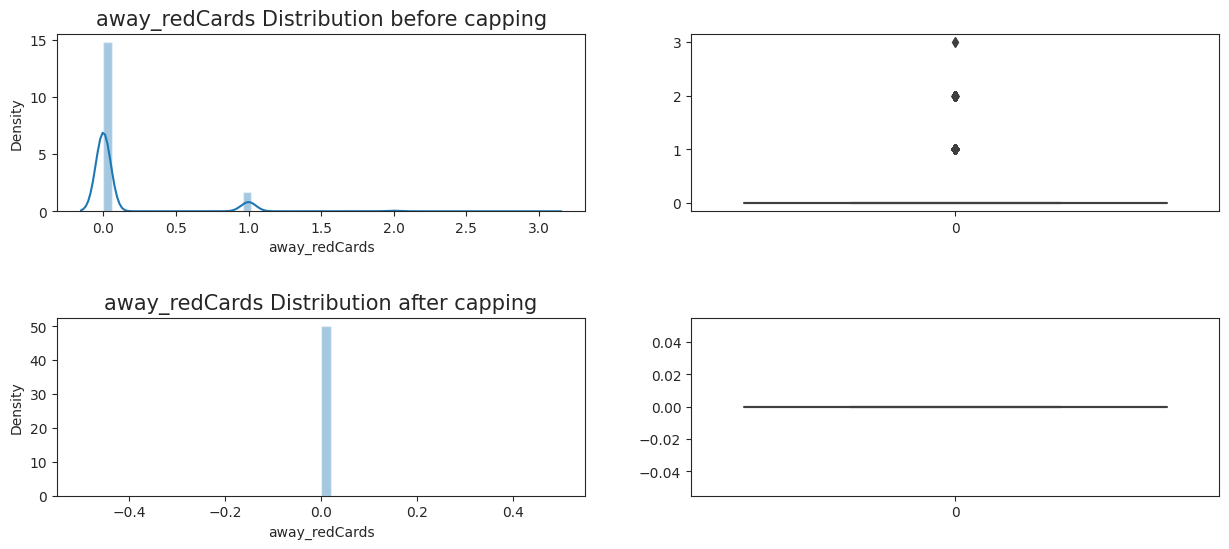

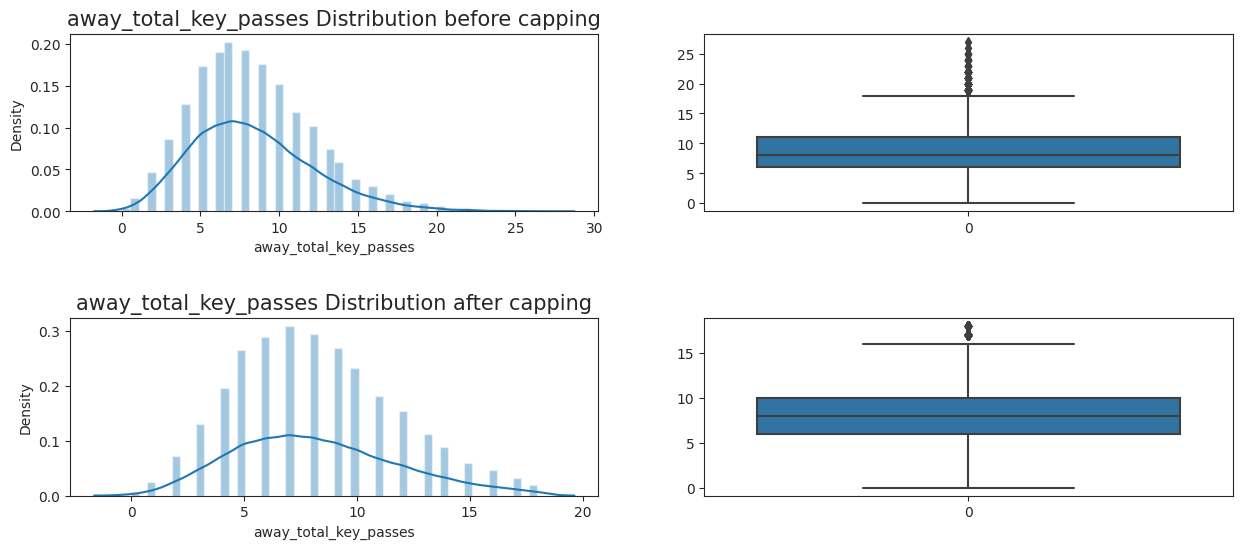

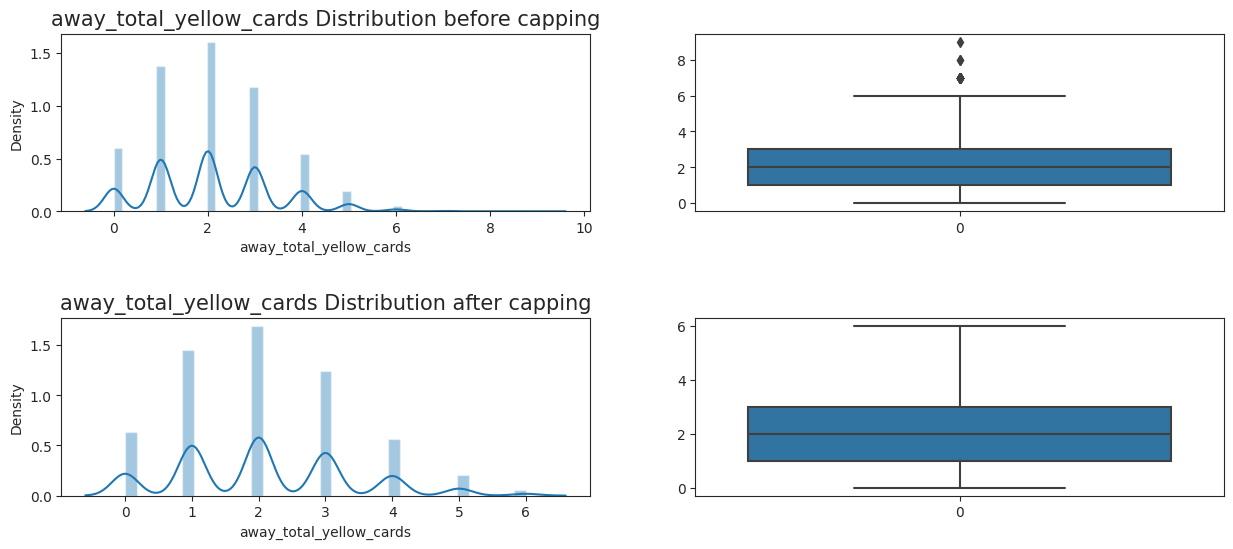

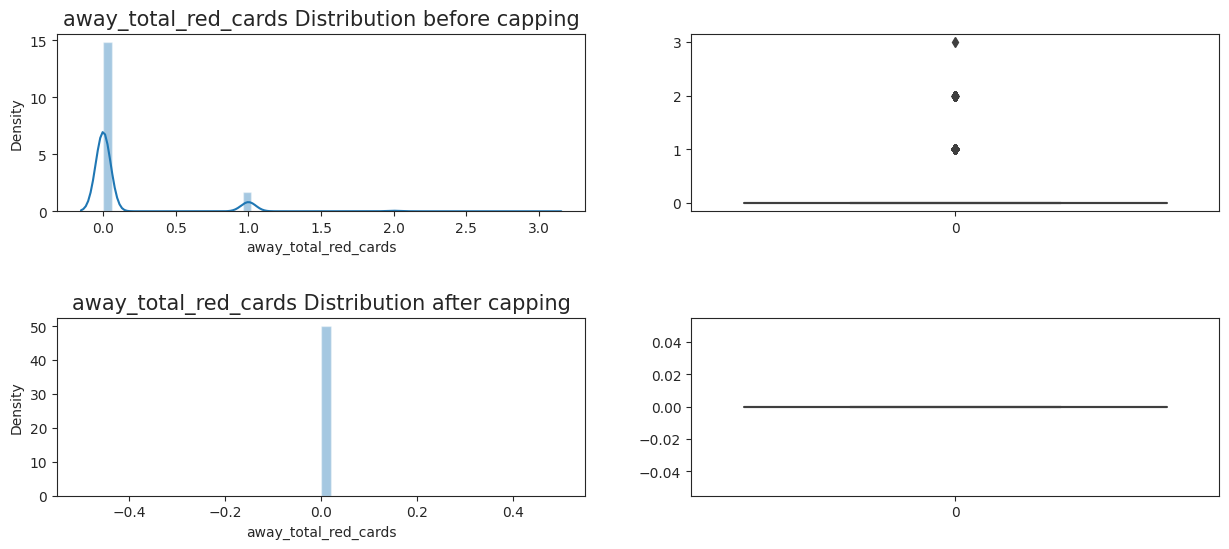

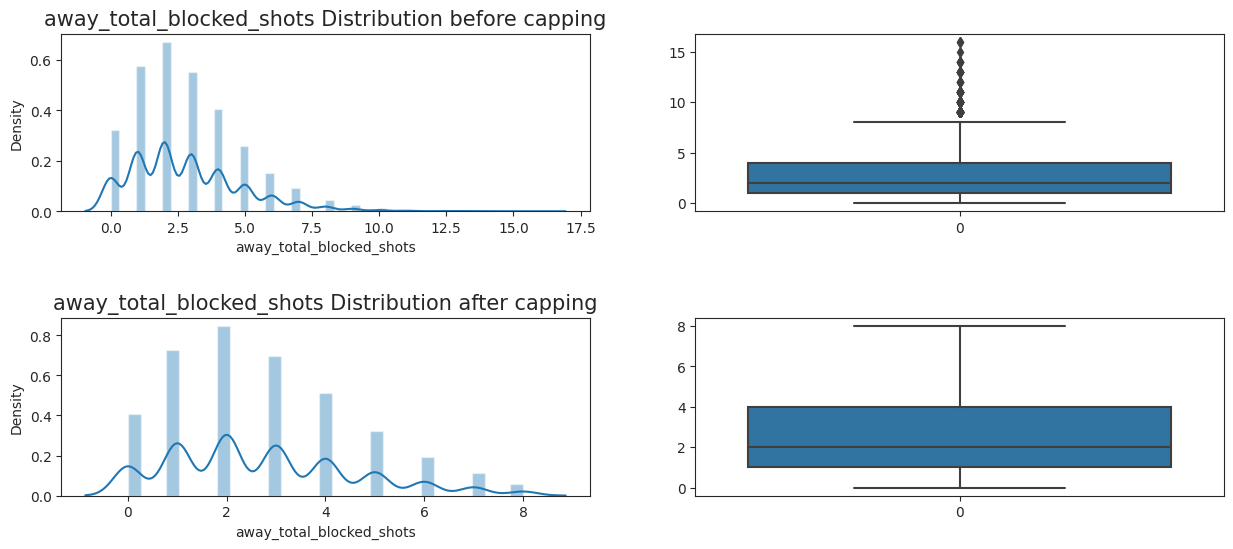

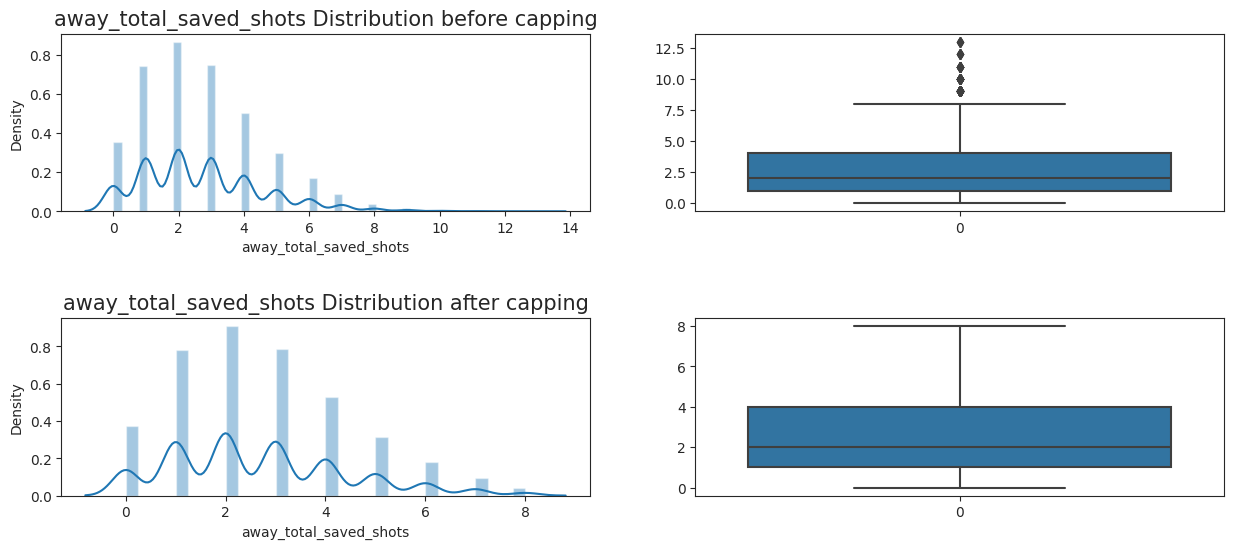

In [354]:
def dist_compare_after_capping(original_df, new, cols):
    for col in relevant_columns_features:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()
dist_compare_after_capping(df, capping_outliers_df, outliers_df.index)

# Data Cleansing



## missingness correlation heatmap

<Axes: >

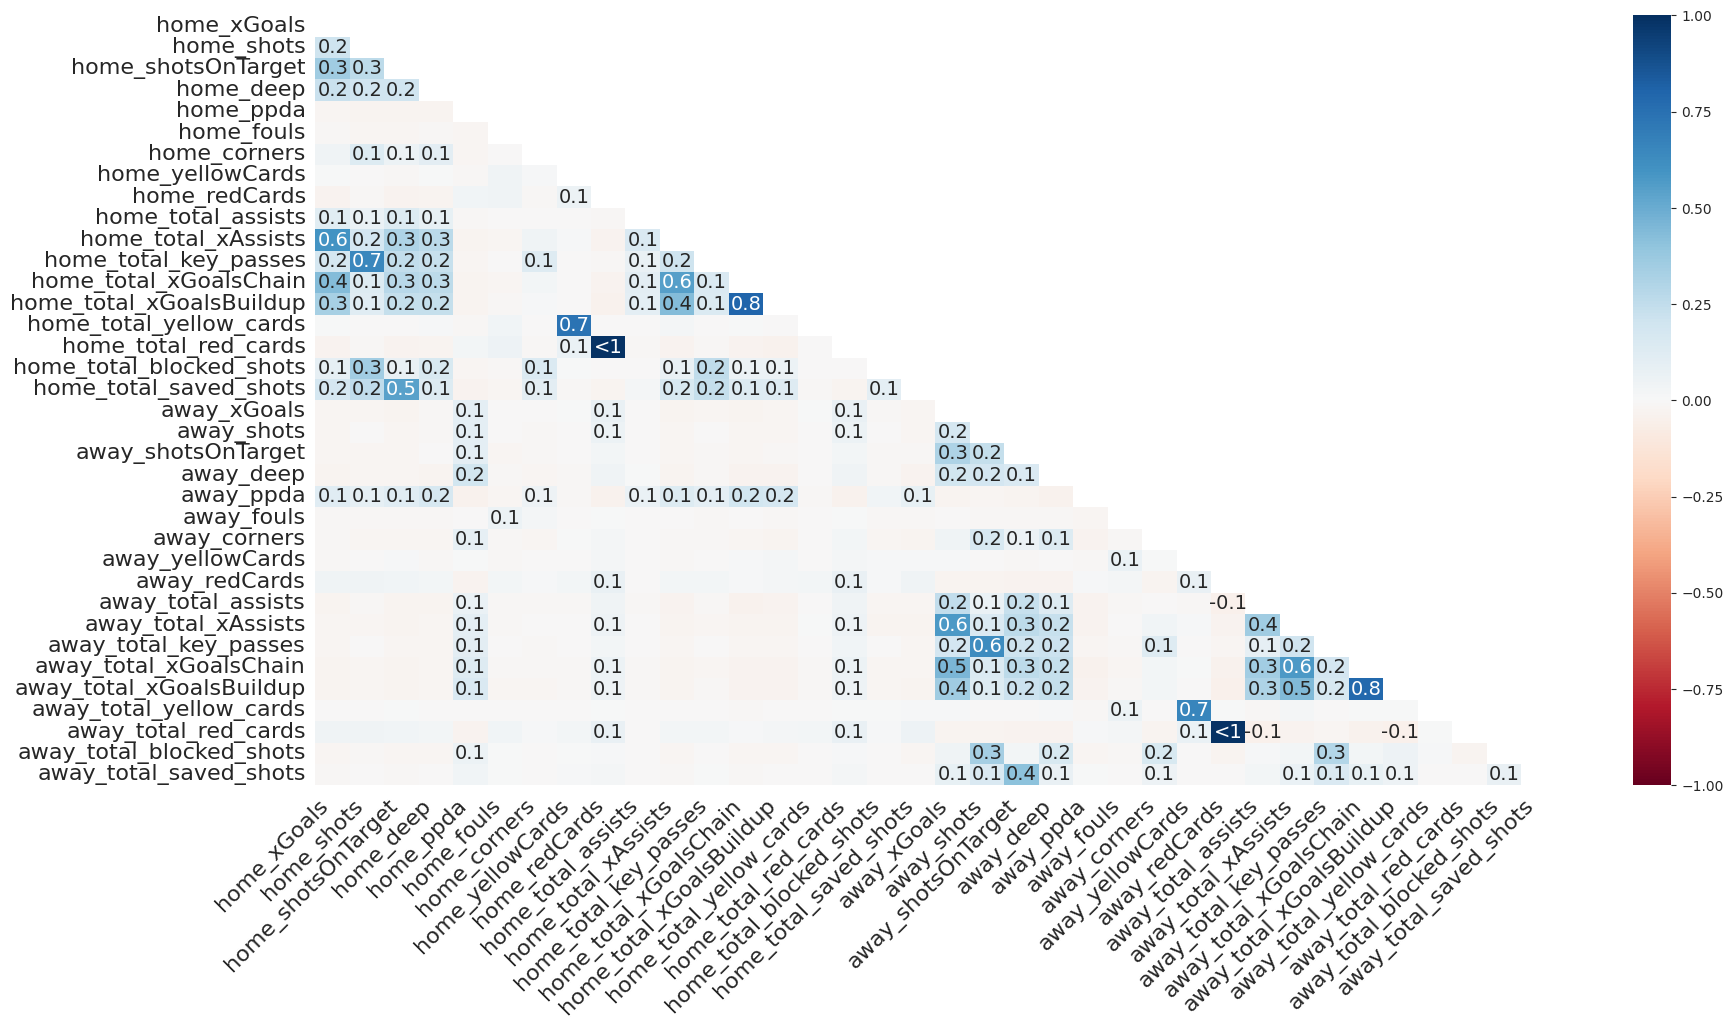

In [357]:
msno.heatmap(capping_outliers_df,figsize=(20,10))

In [360]:
to_cat_features = []
for col in relevant_columns_features:
    if df[col].nunique() <= 20:
        print(f"=== {col} ===")
        display(df[col].value_counts())
        to_cat_features.append(col)

print("features with few unique values that can be treated as categorical:\n",to_cat_features)

=== home_shotsOnTarget ===


4     2033
3     2011
5     1860
6     1477
2     1469
7     1071
1      756
8      680
9      469
10     274
0      229
11     164
12      96
13      44
14      30
15      10
16       4
17       2
18       1
Name: home_shotsOnTarget, dtype: int64

=== home_yellowCards ===


2    3631
1    3433
3    2252
0    1813
4    1038
5     348
6     128
7      30
8       7
Name: home_yellowCards, dtype: int64

=== home_redCards ===


0    11602
1     1016
2       61
3        1
Name: home_redCards, dtype: int64

=== home_total_assists ===


0    4785
1    4382
2    2288
3     858
4     264
5      83
6      14
7       5
8       1
Name: home_total_assists, dtype: int64

=== home_total_yellow_cards ===


2    3639
1    3516
3    2255
0    1830
4     997
5     318
6     105
7      16
8       4
Name: home_total_yellow_cards, dtype: int64

=== home_total_red_cards ===


0    11616
1     1007
2       56
3        1
Name: home_total_red_cards, dtype: int64

=== home_total_blocked_shots ===


3.0     2338
2.0     2318
4.0     1810
1.0     1766
5.0     1382
6.0      927
0.0      821
7.0      573
8.0      324
9.0      188
10.0     100
11.0      51
12.0      39
13.0      24
14.0       6
16.0       3
15.0       3
17.0       2
19.0       1
18.0       1
Name: home_total_blocked_shots, dtype: int64

=== home_total_saved_shots ===


3.0     2550
2.0     2515
4.0     1877
1.0     1857
5.0     1264
6.0      848
0.0      798
7.0      436
8.0      250
9.0      145
10.0      73
11.0      32
12.0      18
13.0       5
14.0       3
15.0       3
16.0       2
17.0       1
Name: home_total_saved_shots, dtype: int64

=== away_shotsOnTarget ===


3     2333
4     2114
2     2081
5     1627
1     1277
6     1191
7      738
0      431
8      423
9      232
10     115
11      64
12      27
13      15
14       8
15       4
Name: away_shotsOnTarget, dtype: int64

=== away_corners ===


4     1987
3     1952
5     1723
2     1595
6     1345
1     1121
7     1016
8      633
9      417
0      356
10     252
11     132
12      74
13      42
14      22
15       6
16       3
17       2
19       1
18       1
Name: away_corners, dtype: int64

=== away_yellowCards ===


2    3605
1    3045
3    2691
0    1356
4    1319
5     480
6     141
7      35
8       6
9       2
Name: away_yellowCards, dtype: int64

=== away_redCards ===


0    11284
1     1317
2       78
3        1
Name: away_redCards, dtype: int64

=== away_total_yellow_cards ===


2    3662
1    3144
3    2688
0    1376
4    1235
5     436
6     113
7      23
8       2
9       1
Name: away_total_yellow_cards, dtype: int64

=== away_total_red_cards ===


0    11298
1     1306
2       75
3        1
Name: away_total_red_cards, dtype: int64

=== away_total_blocked_shots ===


2.0     2722
1.0     2343
3.0     2242
4.0     1649
0.0     1311
5.0     1046
6.0      618
7.0      371
8.0      183
9.0       97
10.0      45
11.0      22
13.0      10
14.0       5
12.0       5
16.0       2
15.0       1
Name: away_total_blocked_shots, dtype: int64

=== away_total_saved_shots ===


2.0     2855
3.0     2471
1.0     2453
4.0     1655
0.0     1172
5.0      988
6.0      566
7.0      293
8.0      124
9.0       59
10.0      20
11.0       9
12.0       4
13.0       3
Name: away_total_saved_shots, dtype: int64

features with few unique values that can be treated as categorical:
 ['home_shotsOnTarget', 'home_yellowCards', 'home_redCards', 'home_total_assists', 'home_total_yellow_cards', 'home_total_red_cards', 'home_total_blocked_shots', 'home_total_saved_shots', 'away_shotsOnTarget', 'away_corners', 'away_yellowCards', 'away_redCards', 'away_total_yellow_cards', 'away_total_red_cards', 'away_total_blocked_shots', 'away_total_saved_shots']


all the features here are related to the cards recieved, it was already made as a categorical feature.

It is more likely to transform those features to categoricals.

In [369]:
for col in df.columns:
    print(col)

gameID
leagueID
season
date
homeTeamID
awayTeamID
home_xGoals
home_shots
home_shotsOnTarget
home_deep
home_ppda
home_fouls
home_corners
home_yellowCards
home_redCards
home_total_assists
home_total_xAssists
home_total_key_passes
home_total_xGoalsChain
home_total_xGoalsBuildup
home_total_yellow_cards
home_total_red_cards
home_total_blocked_shots
home_total_saved_shots
away_xGoals
away_shots
away_shotsOnTarget
away_deep
away_ppda
away_fouls
away_corners
away_yellowCards
away_redCards
away_total_assists
away_total_xAssists
away_total_key_passes
away_total_xGoalsChain
away_total_xGoalsBuildup
away_total_yellow_cards
away_total_red_cards
away_total_blocked_shots
away_total_saved_shots
gameresult
home_redCards_binary
away_redCards_binary
home_yellowCards_cat
away_yellowCards_cat


In [380]:
# Suppose 'to_cat_features' is your list of columns with <= 20 unique values
already_categorical = [
    'home_yellowCards', 'home_redCards', 'home_total_yellow_cards', 'home_total_red_cards',
    'away_yellowCards', 'away_redCards', 'away_total_yellow_cards', 'away_total_red_cards'
]

# Filter out those columns from to_cat_features
remaining_features = [col for col in to_cat_features if col not in already_categorical]


In [381]:
remaining_features

['home_shotsOnTarget',
 'home_total_assists',
 'home_total_blocked_shots',
 'home_total_saved_shots',
 'away_shotsOnTarget',
 'away_corners',
 'away_total_blocked_shots',
 'away_total_saved_shots']

In [382]:
def sync_home_away_features(to_cat_features, all_features):
    """
    Ensures that if a 'home_' feature is in to_cat_features, 
    and its corresponding 'away_' feature exists in all_features, 
    it is also added (and vice versa).

    Example:
      If 'home_total_assists' is in to_cat_features and 
      'away_total_assists' is in all_features, 
      we add 'away_total_assists' to to_cat_features.
    """
    # Use a set for easy addition and to avoid duplicates
    updated = set(to_cat_features)

    for feat in to_cat_features:
        if feat.startswith("home_"):
            # Construct the matching 'away_' feature name
            away_feat = "away_" + feat[len("home_"):]
            # If it exists in the full list of features, add it
            if away_feat in all_features:
                updated.add(away_feat)

        elif feat.startswith("away_"):
            # Construct the matching 'home_' feature name
            home_feat = "home_" + feat[len("away_"):]
            if home_feat in all_features:
                updated.add(home_feat)

    return list(updated)

In [383]:
remaining_features = sync_home_away_features(remaining_features, df.columns)

In [384]:
remaining_features

['home_shotsOnTarget',
 'home_total_assists',
 'away_corners',
 'away_total_assists',
 'home_corners',
 'away_shotsOnTarget',
 'home_total_blocked_shots',
 'away_total_saved_shots',
 'away_total_blocked_shots',
 'home_total_saved_shots']

In [390]:
def visualize_home_away_low_cardinality_features(df, features, save_plots=False, out_dir="../plots"):
    """
    Plots countplots for low-cardinality features. If a 'home_' feature
    has a matching 'away_' feature (same suffix), they are plotted 
    side by side in one figure. Otherwise, a single figure is shown.

    If save_plots=True, each figure is saved as a PNG file in 'out_dir' 
    (e.g., '../plots') before being displayed.
    """
    # Ensure output directory exists
    if save_plots:
        os.makedirs(out_dir, exist_ok=True)

    visited = set()

    for col in features:
        if col in visited:
            continue

        if col.startswith("home_"):
            # Derive the matching away_ feature name
            suffix = col[len("home_"):]
            away_col = "away_" + suffix

            if away_col in features:
                # Plot side by side
                plt.figure(figsize=(14, 5))

                # Left subplot: home_...
                plt.subplot(1, 2, 1)
                sns.countplot(x=col, data=df)
                plt.title(f"{col} Distribution")
                plt.xticks(rotation=45)

                # Right subplot: away_...
                plt.subplot(1, 2, 2)
                sns.countplot(x=away_col, data=df)
                plt.title(f"{away_col} Distribution")
                plt.xticks(rotation=45)

                plt.tight_layout()

                if save_plots:
                    filename = f"{col}_{away_col}_countplot.png"
                    plt.savefig(os.path.join(out_dir, filename), bbox_inches='tight')

                plt.show()

                visited.add(col)
                visited.add(away_col)

            else:
                # Only the home_ feature is present
                plt.figure(figsize=(7, 5))
                sns.countplot(x=col, data=df)
                plt.title(f"{col} Distribution")
                plt.xticks(rotation=45)
                plt.tight_layout()

                if save_plots:
                    filename = f"{col}_countplot.png"
                    plt.savefig(os.path.join(out_dir, filename), bbox_inches='tight')

                plt.show()

                visited.add(col)

        elif col.startswith("away_"):
            # Check if there's a matching home_ feature
            suffix = col[len("away_"):]
            home_col = "home_" + suffix

            if home_col in features:
                # We'll let the 'home_' branch handle them together
                continue
            else:
                # Only the away_ feature is present
                plt.figure(figsize=(7, 5))
                sns.countplot(x=col, data=df)
                plt.title(f"{col} Distribution")
                plt.xticks(rotation=45)
                plt.tight_layout()

                if save_plots:
                    filename = f"{col}_countplot.png"
                    plt.savefig(os.path.join(out_dir, filename), bbox_inches='tight')

                plt.show()

                visited.add(col)

        else:
            # If it's not home_ or away_, just plot it alone
            plt.figure(figsize=(7, 5))
            sns.countplot(x=col, data=df)
            plt.title(f"{col} Distribution")
            plt.xticks(rotation=45)
            plt.tight_layout()

            if save_plots:
                filename = f"{col}_countplot.png"
                plt.savefig(os.path.join(out_dir, filename), bbox_inches='tight')

            plt.show()

            visited.add(col)

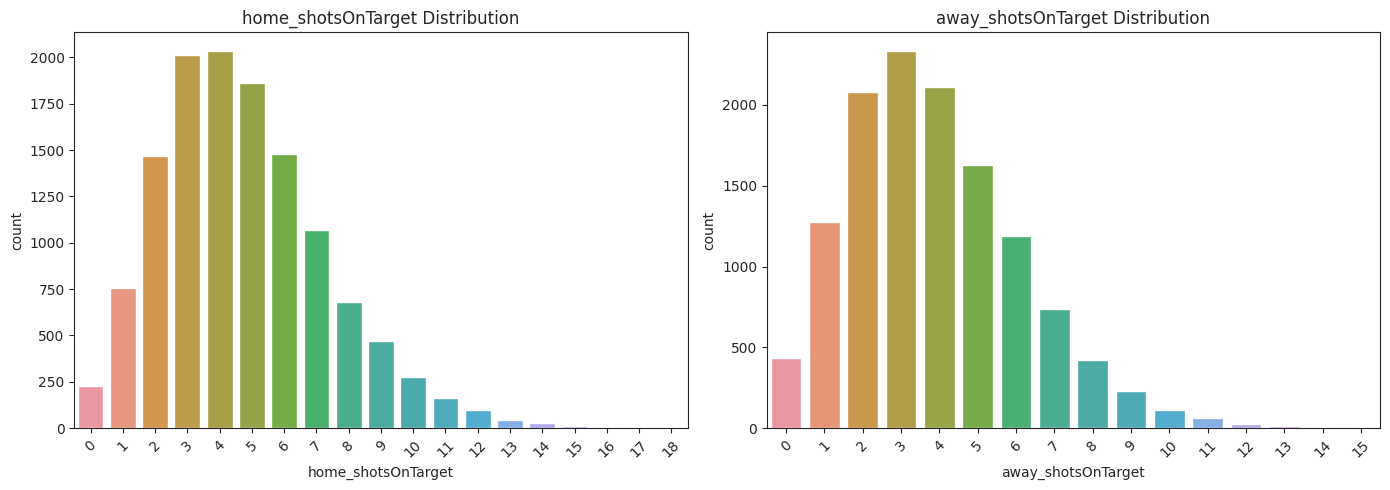

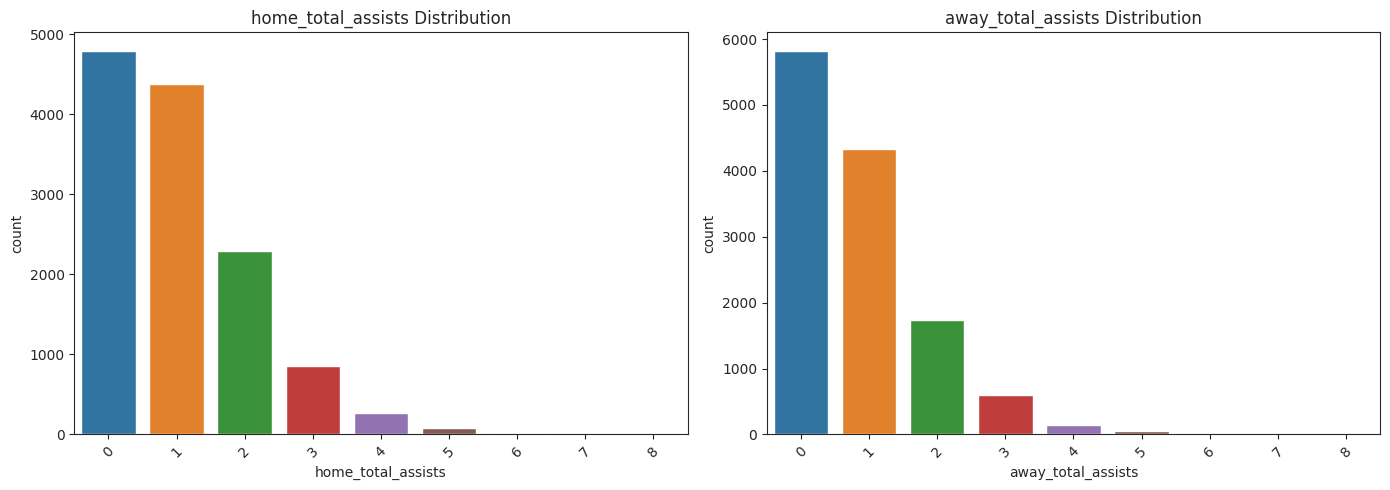

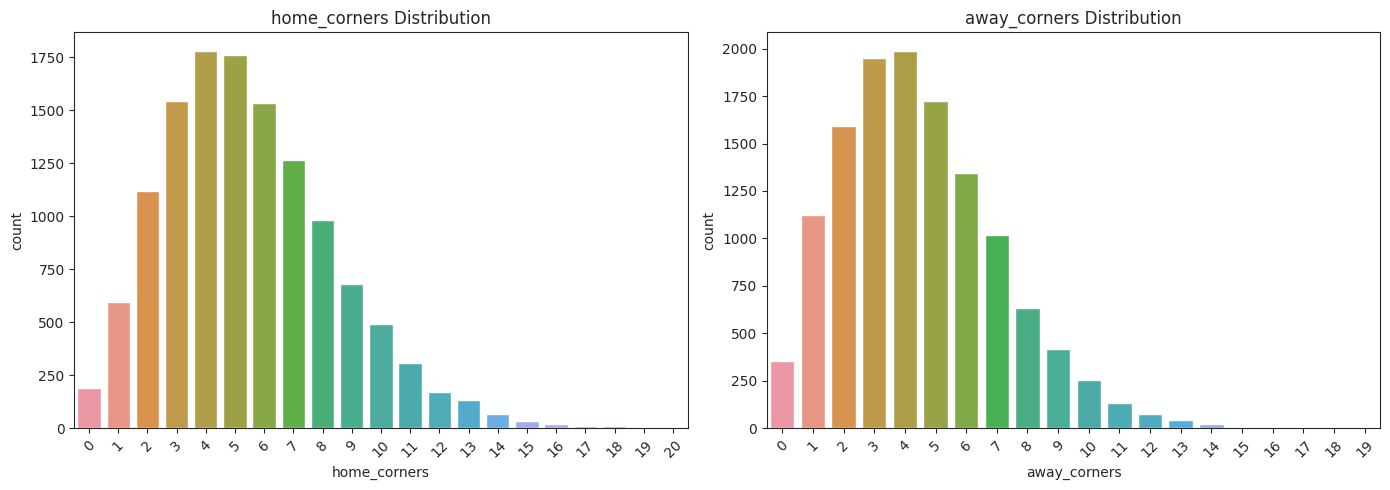

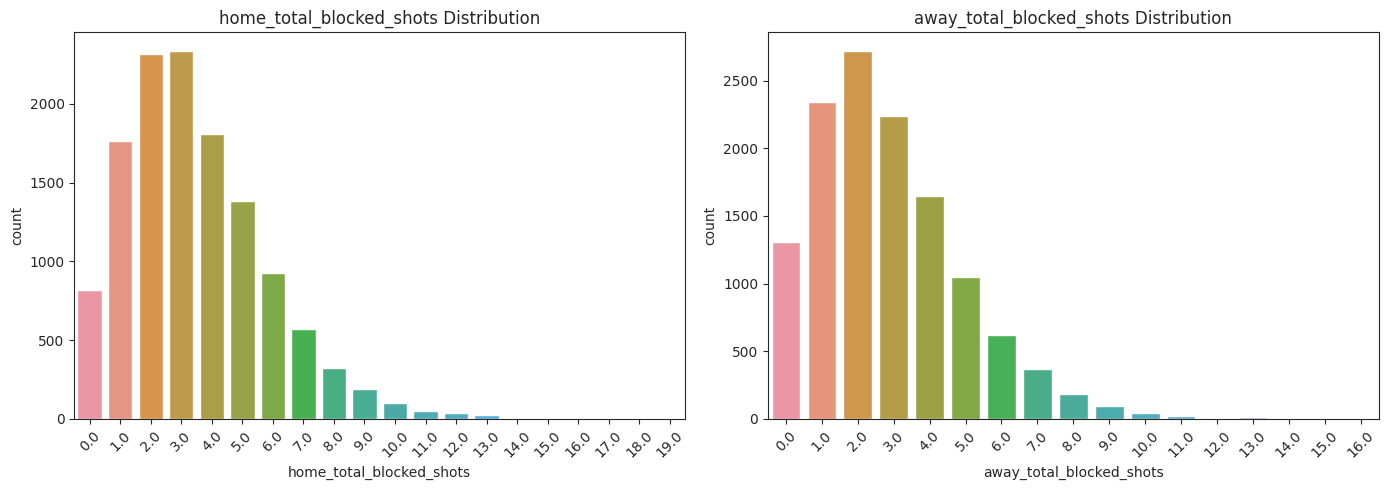

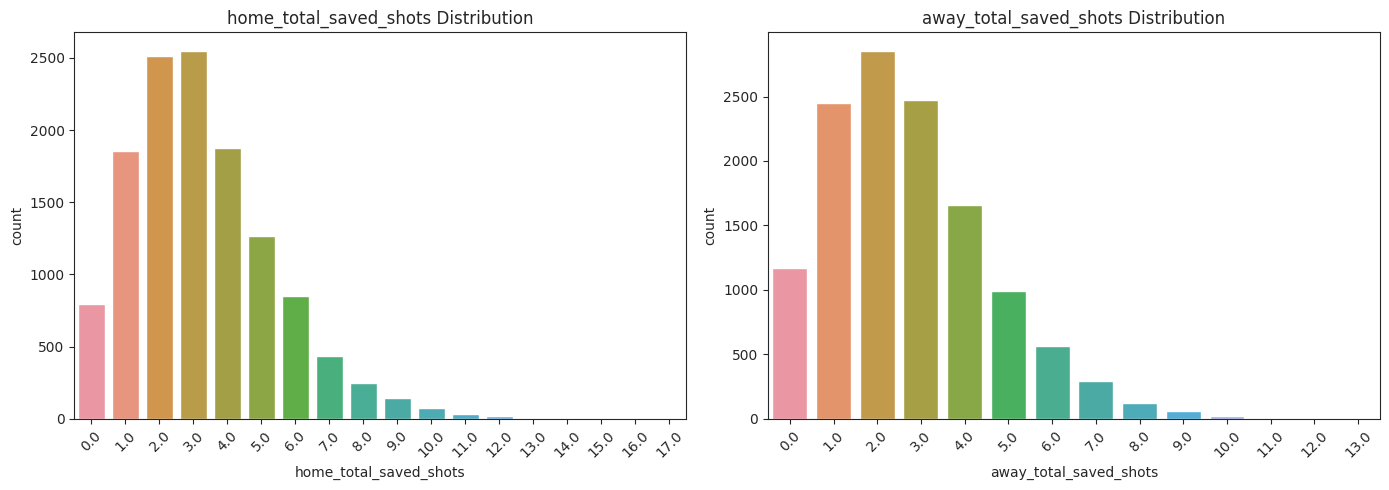

In [391]:
visualize_home_away_low_cardinality_features(df, remaining_features, save_plots=True, out_dir="../plots")

lets add categorical features coresponding to each feature in here, this is the way to deal with outliers in this case:

In [398]:
def bin_home_away_features(df):
    """
    Creates new columns with '_cat' suffix for each home/away feature
    using custom cutoff bins, and sets those new columns to category dtype.
    The original columns remain numeric.

    Binning Rules:
    - home_shotsOnTarget, away_shotsOnTarget: 11+
    - home_total_assists, away_total_assists: 3+
    - home_corners, away_corners: 12+
    - home_total_blocked_shots, away_total_blocked_shots: 9+
    - home_total_saved_shots, away_total_saved_shots: 8+
    """

    binning_rules = {
        "home_shotsOnTarget": 11,
        "away_shotsOnTarget": 11,
        "home_total_assists": 3,
        "away_total_assists": 3,
        "home_corners": 12,
        "away_corners": 12,
        "home_total_blocked_shots": 9,
        "away_total_blocked_shots": 9,
        "home_total_saved_shots": 8,
        "away_total_saved_shots": 8
    }

    def bin_value(x, cutoff):
        if pd.isnull(x):
            return x  # Keep NaN as is
        val = int(x)
        return f"{cutoff}+" if val >= cutoff else str(val)

    for col, cutoff in binning_rules.items():
        if col in df.columns:
            cat_col = col + "_cat"
            df[cat_col] = df[col].apply(lambda v: bin_value(v, cutoff))
            # Convert to categorical dtype
            df[cat_col] = df[cat_col].astype("category")

    return df

In [408]:
df_with_new_categoricals = df.copy()
df_with_new_categoricals = bin_home_away_features(df_with_new_categoricals)

In [409]:
df_with_new_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   gameID                        12680 non-null  int64         
 1   leagueID                      12680 non-null  int64         
 2   season                        12680 non-null  int64         
 3   date                          12680 non-null  datetime64[ns]
 4   homeTeamID                    12680 non-null  int64         
 5   awayTeamID                    12680 non-null  int64         
 6   home_xGoals                   12680 non-null  float64       
 7   home_shots                    12680 non-null  int64         
 8   home_shotsOnTarget            12680 non-null  int64         
 9   home_deep                     12680 non-null  int64         
 10  home_ppda                     12680 non-null  float64       
 11  home_fouls                  

noticed that the cards categories are dtype 'object', lets change it:

In [410]:
df_with_new_categoricals["home_redCards_binary"] = (
    df_with_new_categoricals["home_redCards_binary"]
    .map({"Yes": True, "No": False})
    .astype(bool)
)

df_with_new_categoricals["away_redCards_binary"] = (
    df_with_new_categoricals["away_redCards_binary"]
    .map({"Yes": True, "No": False})
    .astype(bool)
)
df_with_new_categoricals['home_yellowCards_cat'] = df_with_new_categoricals['home_yellowCards_cat'].astype("category")
df_with_new_categoricals['away_yellowCards_cat'] = df_with_new_categoricals['away_yellowCards_cat'].astype("category")


In [411]:
df_with_new_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   gameID                        12680 non-null  int64         
 1   leagueID                      12680 non-null  int64         
 2   season                        12680 non-null  int64         
 3   date                          12680 non-null  datetime64[ns]
 4   homeTeamID                    12680 non-null  int64         
 5   awayTeamID                    12680 non-null  int64         
 6   home_xGoals                   12680 non-null  float64       
 7   home_shots                    12680 non-null  int64         
 8   home_shotsOnTarget            12680 non-null  int64         
 9   home_deep                     12680 non-null  int64         
 10  home_ppda                     12680 non-null  float64       
 11  home_fouls                  

In [416]:
print(df_with_new_categoricals['home_redCards_binary'].value_counts())
print(df_with_new_categoricals['away_redCards_binary'].value_counts())

False    11602
True      1078
Name: home_redCards_binary, dtype: int64
False    11284
True      1396
Name: away_redCards_binary, dtype: int64


In [417]:
# saving df after categorizing features
with open("../pickles/df_with_categories.pkl", "wb") as f:
    pickle.dump(df_with_new_categoricals, f)  # Save the DataFrame with standard pickle

In [361]:
remove_outliers = []
for col in relevant_columns_features:
    if df[col].nunique() > 20:
        print(f"=== {col} ===")
        display(df[col].value_counts())
        remove_outliers.append(col)
print("features with outliers to remove:\n", remove_outliers)

=== home_xGoals ===


1.768180    3
1.510590    3
1.221600    2
1.129840    2
1.432290    2
           ..
2.150800    1
0.996123    1
1.363870    1
0.900312    1
0.323960    1
Name: home_xGoals, Length: 12491, dtype: int64

=== home_shots ===


14    1019
11     999
12     979
13     970
10     883
15     851
9      807
16     803
8      654
17     647
18     580
7      501
19     449
6      376
20     365
21     316
22     253
5      227
23     208
24     154
25     123
4      117
26      75
3       66
27      59
28      54
29      37
2       21
30      19
31      16
33      12
32      10
1        9
34       6
36       4
37       3
38       2
0        2
43       1
35       1
39       1
47       1
Name: home_shots, dtype: int64

=== home_deep ===


4     1461
5     1417
6     1300
3     1298
7     1135
2     1107
8      884
9      748
1      677
10     538
11     435
12     342
13     271
0      230
14     203
15     135
16     120
17      87
18      65
19      62
20      42
23      28
21      27
22      22
24      11
25       9
27       6
26       6
28       4
32       2
33       1
29       1
34       1
35       1
30       1
31       1
37       1
42       1
Name: home_deep, dtype: int64

=== home_fouls ===


12    1250
13    1236
11    1183
14    1095
10    1078
15     950
9      942
16     812
8      697
17     688
7      497
18     472
19     355
6      307
20     247
5      183
21     178
22     129
4       99
23      87
24      48
3       41
25      35
26      31
2       11
28      11
27       8
29       5
1        2
0        2
33       1
Name: home_fouls, dtype: int64

=== home_corners ===


4     1778
5     1758
3     1544
6     1533
7     1265
2     1118
8      983
9      678
1      595
10     489
11     307
0      187
12     169
13     133
14      65
15      33
16      19
17      11
18       9
20       3
19       3
Name: home_corners, dtype: int64

=== home_total_xAssists ===


0.000000    9
0.284979    1
0.495288    1
1.271469    1
1.033093    1
           ..
0.578854    1
0.813590    1
0.689226    1
0.560451    1
0.074636    1
Name: home_total_xAssists, Length: 12672, dtype: int64

=== home_total_key_passes ===


9     1197
10    1194
8     1179
7     1146
11    1096
6      972
12     935
13     762
5      705
14     625
4      496
15     467
16     388
17     287
3      261
18     233
19     164
2      143
20     130
21      82
22      48
23      46
1       39
24      23
26      19
25      16
0        8
27       6
28       3
33       2
31       2
29       2
32       1
30       1
34       1
38       1
Name: home_total_key_passes, dtype: int64

=== away_shots ===


9     1170
10    1105
11    1037
8      998
12     983
7      907
13     905
14     831
6      754
15     651
16     540
5      523
17     425
4      328
18     316
19     228
3      203
20     172
21     154
22     111
2       75
23      68
24      55
25      39
26      30
1       27
27      15
0        8
28       7
30       7
29       2
31       2
34       2
33       1
39       1
Name: away_shots, dtype: int64

=== away_deep ===


3     1656
4     1624
2     1520
5     1410
6     1172
1     1118
7      915
8      725
9      509
0      475
10     406
11     308
12     245
13     174
14     112
15      88
16      58
17      46
18      31
19      29
20      19
21      11
22       9
23       7
24       5
27       2
28       2
26       2
25       2
Name: away_deep, dtype: int64

=== away_fouls ===


12    1226
13    1210
11    1142
14    1060
15    1037
10    1029
9      868
16     834
17     715
8      640
18     536
7      450
19     400
20     318
6      287
21     218
5      158
22     147
23     102
4       84
24      46
25      40
3       38
26      38
27      16
28      11
29       7
2        7
1        7
30       6
32       2
0        1
Name: away_fouls, dtype: int64

=== away_total_key_passes ===


7     1386
8     1323
6     1302
9     1210
5     1193
10    1043
4      882
11     815
12     695
3      590
13     508
14     400
2      323
15     268
16     206
17     143
1      110
18      87
19      65
20      44
0       27
22      23
21      20
24       6
23       5
25       4
26       1
27       1
Name: away_total_key_passes, dtype: int64

features with outliers to remove:
 ['home_xGoals', 'home_shots', 'home_deep', 'home_fouls', 'home_corners', 'home_total_xAssists', 'home_total_key_passes', 'away_shots', 'away_deep', 'away_fouls', 'away_total_key_passes']


In [418]:
def visualize_continuous_features(df, continuous_cols):
    """
    For each continuous column in 'continuous_cols', 
    display a 2-panel figure: 
      - Left: Histogram + KDE for distribution
      - Right: Boxplot for outliers
    
    Helps you see how to treat outliers (e.g. capping, transformation).
    """
    for col in continuous_cols:
        plt.figure(figsize=(12, 5))
        
        # Left subplot: Histogram + KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"{col} Distribution")
        
        # Right subplot: Boxplot for outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"{col} Boxplot")
        
        plt.tight_layout()
        plt.show()

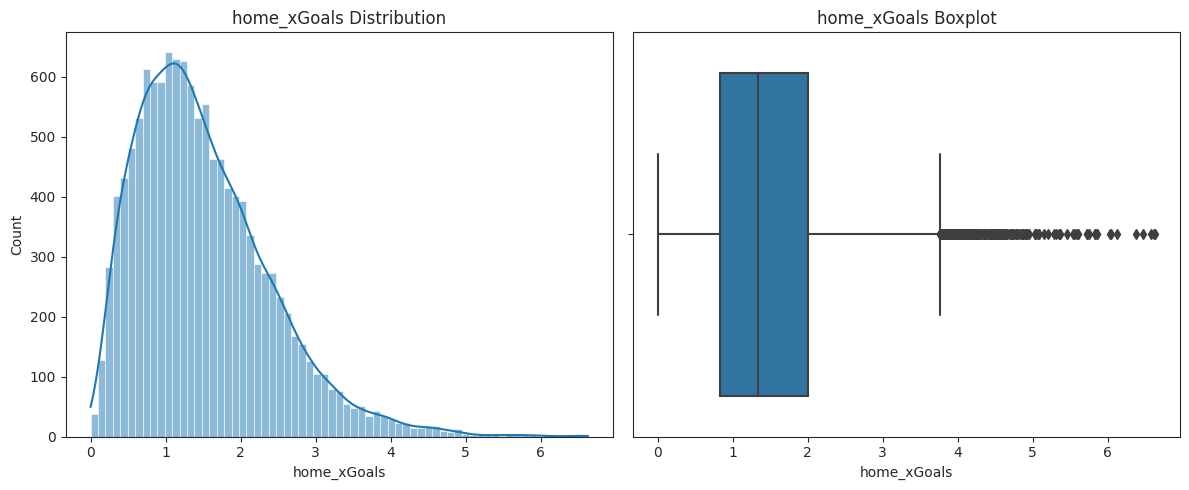

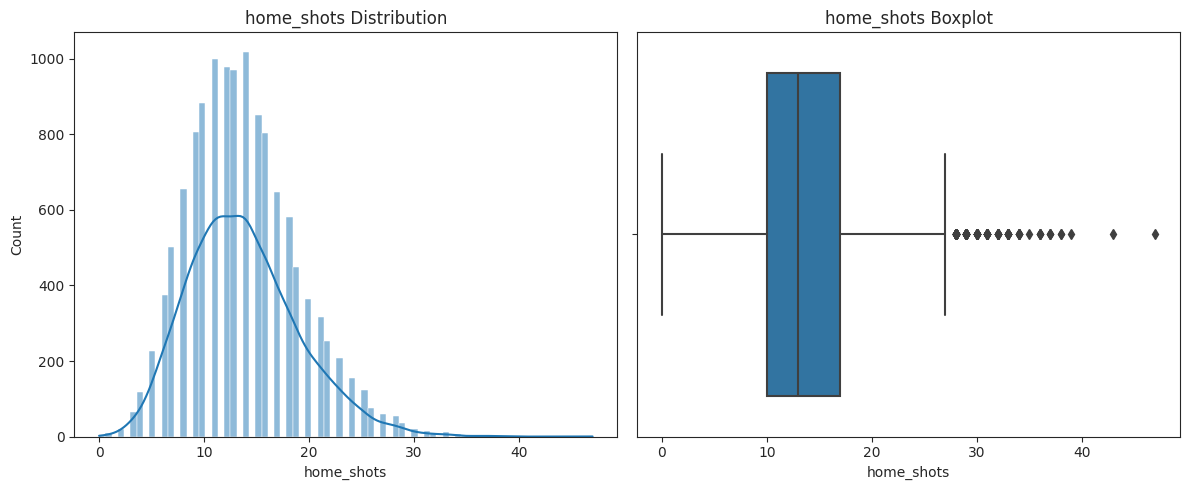

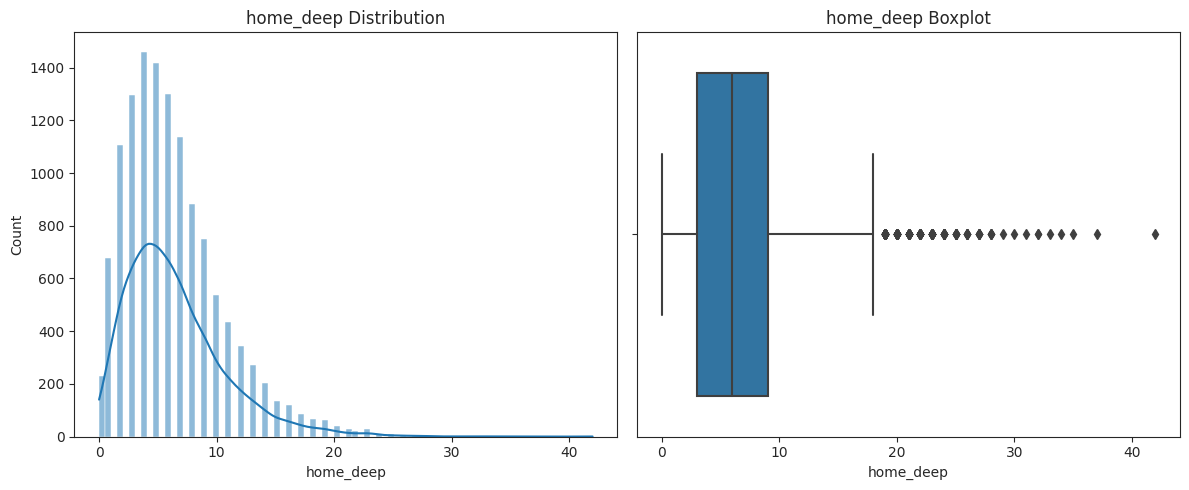

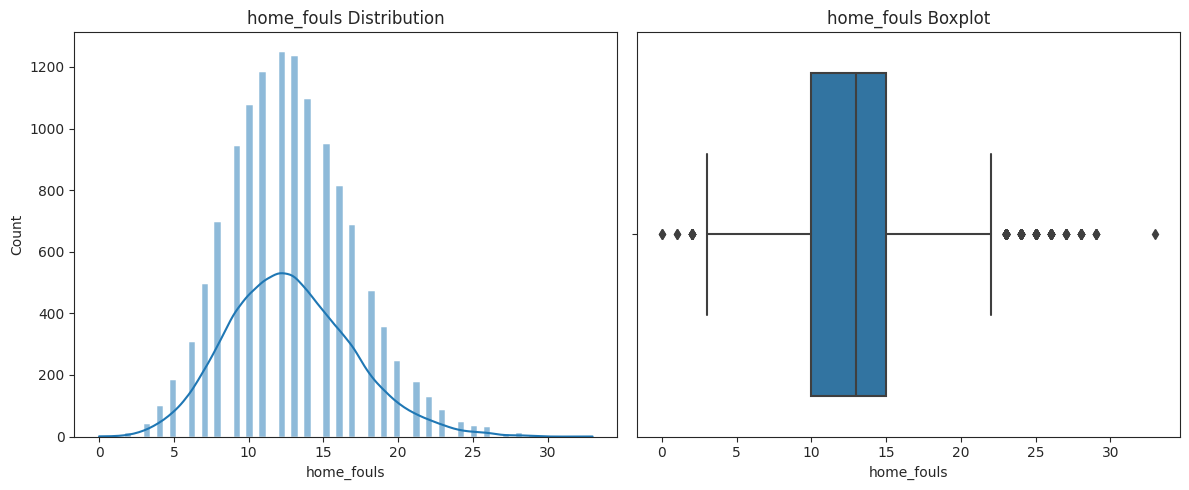

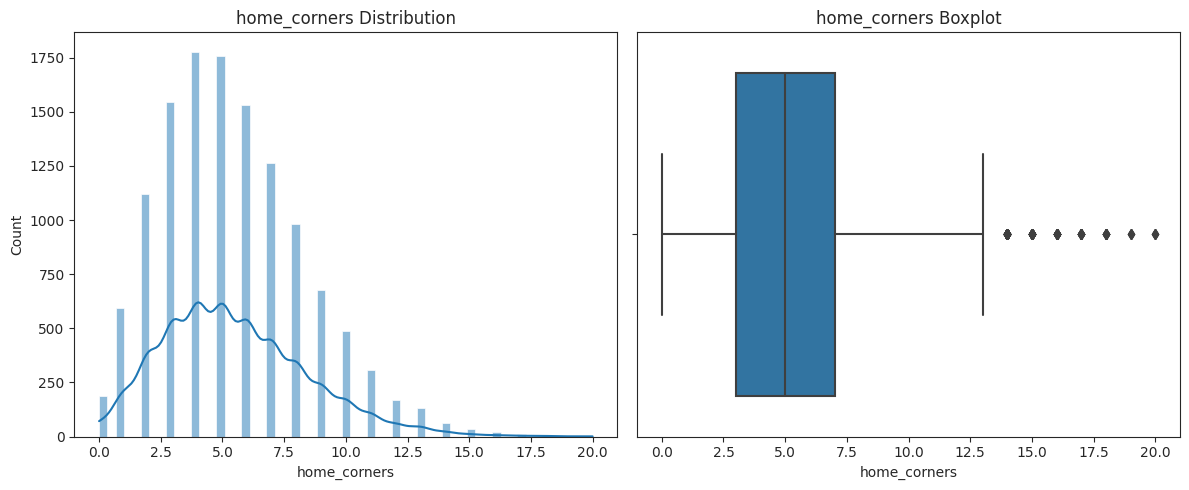

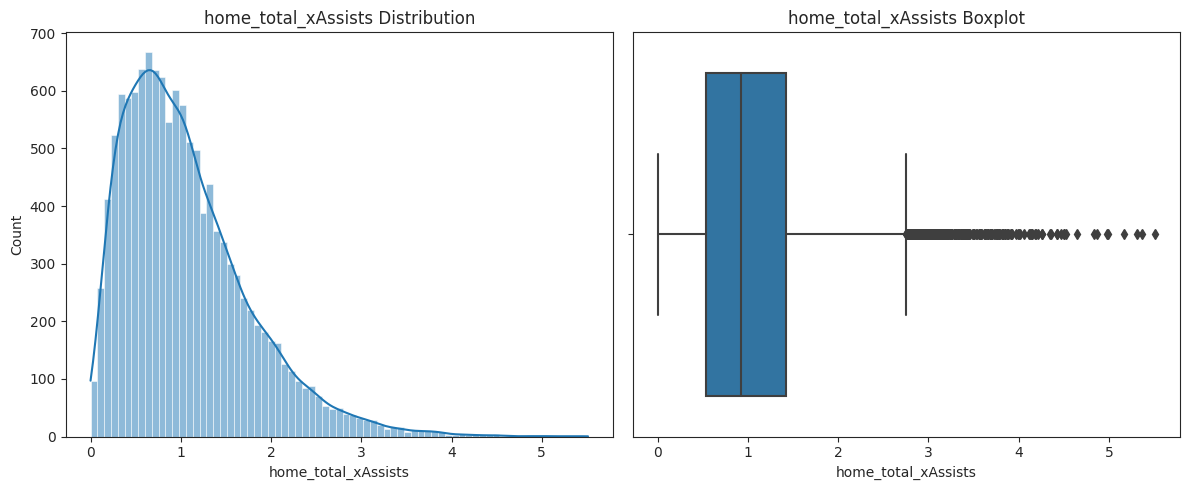

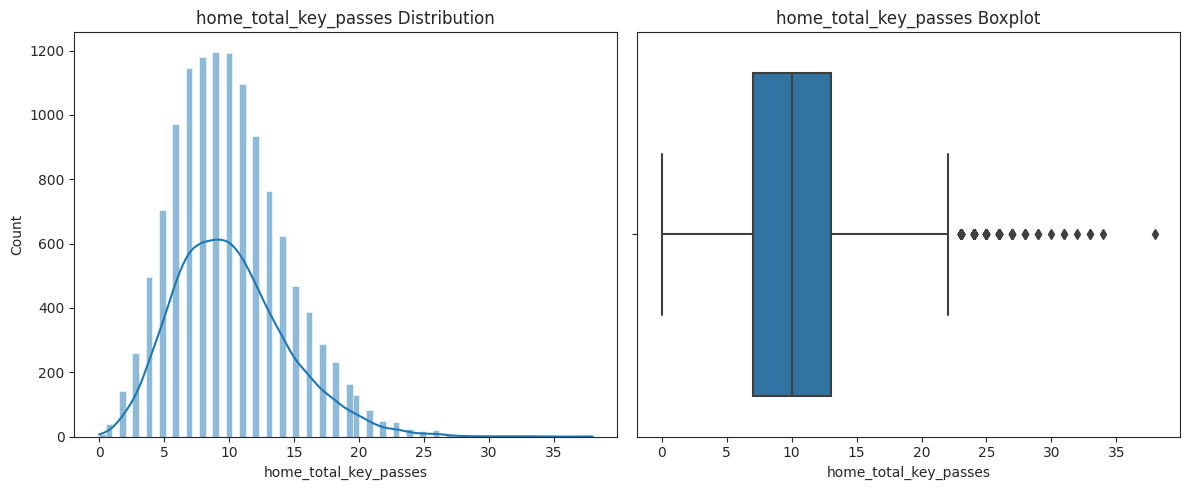

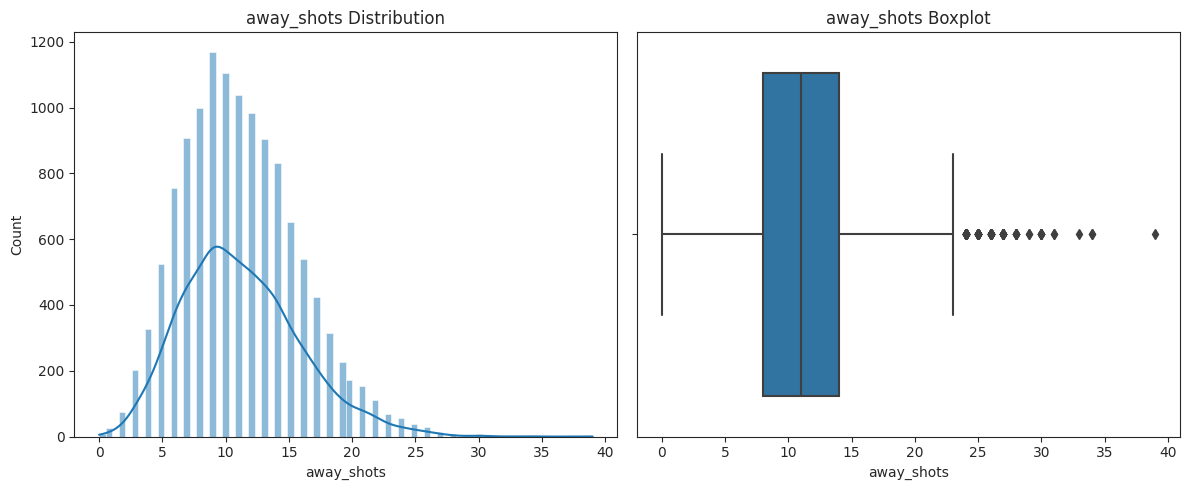

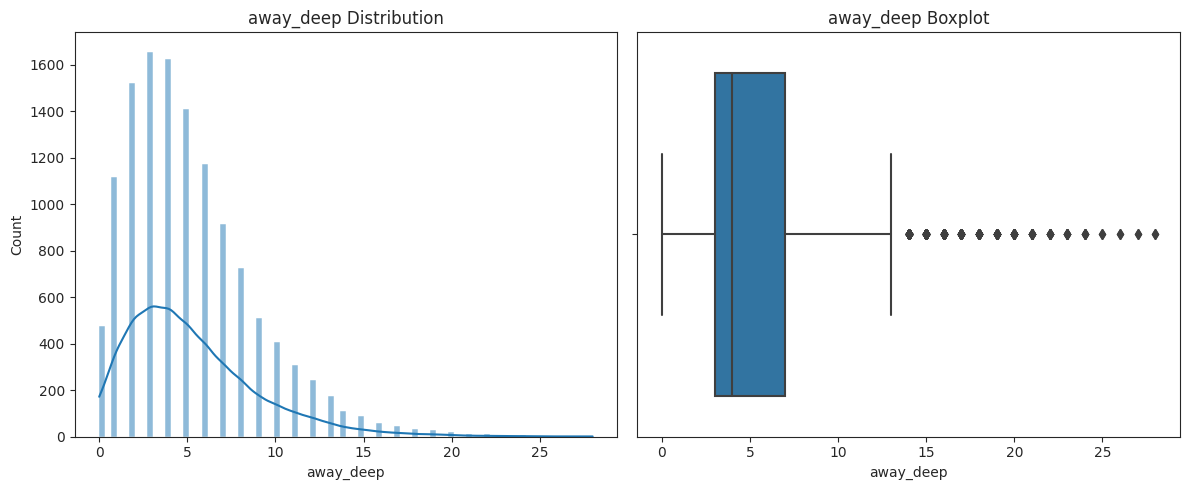

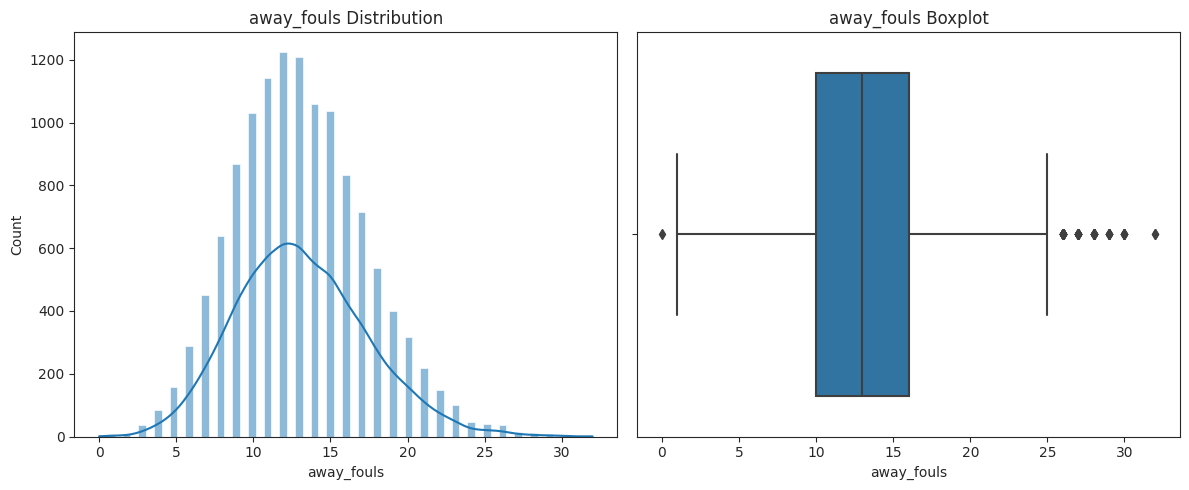

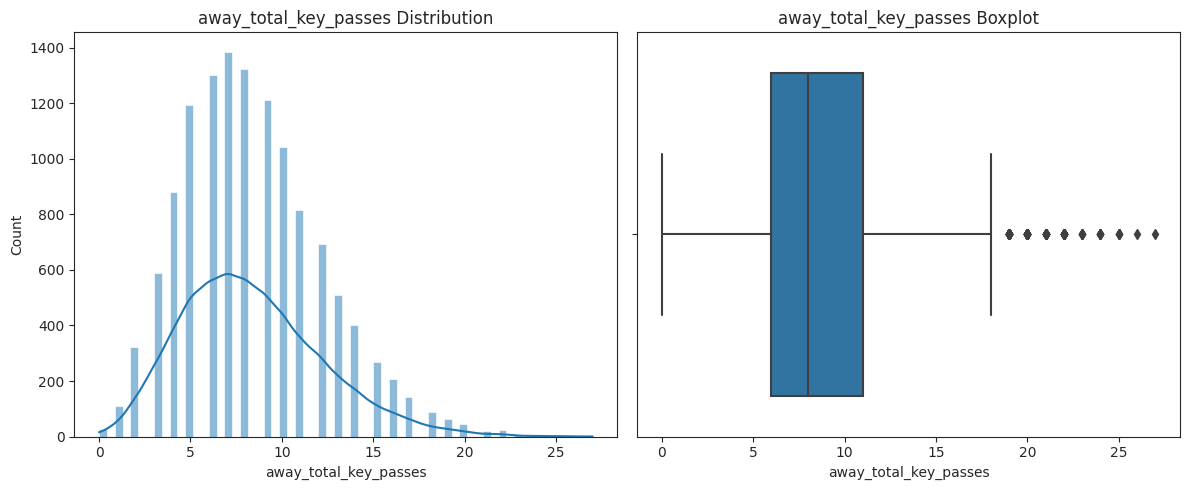

In [419]:
visualize_continuous_features(df, remove_outliers)


In [432]:
remove_outliers

['home_xGoals',
 'home_shots',
 'home_deep',
 'home_fouls',
 'home_corners',
 'home_total_xAssists',
 'home_total_key_passes',
 'away_shots',
 'away_deep',
 'away_fouls',
 'away_total_key_passes']

In [423]:
df_outliers

gameID  leagueID  season  date  homeTeamID  awayTeamID  home_xGoals  \
0           0         0       0     0           0           0            0   
1           0         0       0     0           0           0            0   
2           0         0       0     0           0           0            0   
3           0         0       0     0           0           0            0   
4           0         0       0     0           0           0            0   
...       ...       ...     ...   ...         ...         ...          ...   
12675       0         0       0     0           0           0            0   
12676       0         0       0     0           0           0            0   
12677       0         0       0     0           0           0            0   
12678       0         0       0     0           0           0            0   
12679       0         0       0     0           0           0            0   

       home_shots  home_shotsOnTarget  home_deep  ...  \
0               0                   0          0  ...   
1               0                   0          0  ...   
2               0                   0          0  ...   
3               0                   0          0  ...   
4               0                   0          0  ...   
...           ...                 ...        ...  ...   
12675           0                   0          0  ...   
12676           0                   0          0  ...   
12677           0                   0          0  ...   
12678           0                   0          0  ...   
12679           0                   0          0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             1                        0   
4                             1                        0   
...                         ...                      ...   
12675                         0                        0   
12676                         0                        0   
12677                         0                        0   
12678                         0                        0   
12679                         0                        0   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
0                         0                         0                       0   
1                         0                         0                       0   
2                         0                         0                       0   
3                         0                         0                       0   
4                         0                         0                       0   
...                     ...                       ...                     ...   
12675                     0                         0                       0   
12676                     0                         0                       0   
12677                     0                         0                       0   
12678                     0                         0                       0   
12679                     0                         0                       0   

       gameresult  home_redCards_binary  away_redCards_binary  \
0               0                     0                     0   
1               0                     0                     0   
2               0                     0                     0   
3               0                     0                     0   
4               0                     0                     0   
...           ...                   ...                   ...   
12675           0                     0                     0   
12676           0                     0                     0   
12677           0                     0                     0   
12678           0                     0  

In [420]:
capping_outliers_df

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539         9.0                 1.0        4.0  ...   
1         0.876106        11.0                 2.0       11.0  ...   
2         0.604226        10.0                 5.0        5.0  ...   
3         2.568030        19.0                 8.0        5.0  ...   
4         1.130760        17.0                 6.0        5.0  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190        15.0                 5.0       17.0  ...   
12676     1.198190        10.0                 3.0        3.0  ...   
12677     1.332690        12.0                 6.0       10.0  ...   
12678     1.460500        19.0                 5.0        6.0  ...   
12679     0.323960         6.0                 2.0        1.0  ...   

       away_total_xGoalsBuildup  away_total_yellow_cards  \
0                      0.811549                      3.0   
1                      0.736815                      4.0   
2                      1.030588                      2.0   
3                           NaN                      4.0   
4                           NaN                      0.0   
...                         ...                      ...   
12675                  0.715843                      2.0   
12676                  1.758012                      1.0   
12677                  0.544502                      0.0   
12678                  0.764512                      0.0   
12679                  0.421488                      1.0   

       away_total_red_cards  away_total_blocked_shots  away_total_saved_shots  \
0                       0.0                       3.0                     4.0   
1                       0.0                       2.0                     2.0   
2                       0.0                       3.0                     3.0   
3                       0.0                       2.0                     3.0   
4                       0.0                       2.0                     4.0   
...                     ...                       ...                     ...   
12675                   0.0                       1.0                     3.0   
12676                   0.0                       4.0                     3.0   
12677                   0.0                       0.0                     2.0   
12678                   0.0                       1.0                     1.0   
12679                   0.0                       2.0                     0.0   

       gameresult  home_redCards_binary  away_redCards_binary  \
0               2                    No                    No   
1               0                    No                    No   
2               1                    No                    No   
3               2                    No                    No   
4               0                    No                    No   
...           ...                   ...                   ...   
12675           0                    No                    No   
126

In [427]:
df_with_new_categoricals


gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539           9                   1          4  ...   
1         0.876106          11                   2         11  ...   
2         0.604226          10                   5          5  ...   
3         2.568030          19                   8          5  ...   
4         1.130760          17                   6          5  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190          15                   5         17  ...   
12676     1.198190          10                   3          3  ...   
12677     1.332690          12                   6         10  ...   
12678     1.460500          19                   5          6  ...   
12679     0.323960           6                   2          1  ...   

       home_shotsOnTarget_cat  away_shotsOnTarget_cat  home_total_assists_cat  \
0                           1                       4                       0   
1                           2                       3                       0   
2                           5                       5                       2   
3                           8                       5                       2   
4                           6                       7                       1   
...                       ...                     ...                     ...   
12675                       5                       5                       1   
12676                       3                       5                       1   
12677                       6                       2                       1   
12678                       5                       2                       0   
12679                       2                       1                       0   

       away_total_assists_cat  home_corners_cat  away_corners_cat  \
0                           0                 1                 2   
1                           1                 6                 3   
2                           1                 8                 2   
3                           2                 6                 3   
4                          3+                 1                 4   
...                       ...               ...               ...   
12675                       1                 9                 5   
12676                       1                 5                 2   
12677                       0                 4                 3   
12678                       1                 9                 3   
12679                       1                 2                 3   

       home_total_blocked_shots_cat  away_total_blocked_shots_cat  \
0                                 4                             3   
1                                 2                             2   
2                                 2                             3   
3                                 4                             2   
4                                 3                             2   
.

In [448]:
manipulated_data= df_with_new_categoricals.copy()

In [449]:
for col in remove_outliers:
    manipulated_data.loc[df_outliers[col] == 1, col] = np.nan

In [454]:
manipulated_data['home_xGoals'].value_counts(dropna=False)

NaN        276
1.51059      3
1.76818      3
1.49515      2
1.70719      2
          ... 
1.12394      1
1.78285      1
2.93897      1
2.29008      1
0.32396      1
Name: home_xGoals, Length: 12216, dtype: int64

In [455]:
manipulated_data.to_csv('../csvs/manipulated_data_no_outleirs.csv')

In [456]:
# saving df after finishing EDA
with open("../pickles/manipulated_data_no_outleirs.pkl", "wb") as f:
    pickle.dump(manipulated_data, f)  # Save the DataFrame with standard pickle


# Missing Values

In [457]:
with open("../pickles/manipulated_data_no_outleirs.pkl", "wb") as f:
    pickle.dump(manipulated_data, f)  # Save the DataFrame with standard pickle

In [458]:
manipulated_data

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539         9.0                   1        4.0  ...   
1         0.876106        11.0                   2       11.0  ...   
2         0.604226        10.0                   5        5.0  ...   
3         2.568030        19.0                   8        5.0  ...   
4         1.130760        17.0                   6        5.0  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190        15.0                   5       17.0  ...   
12676     1.198190        10.0                   3        3.0  ...   
12677     1.332690        12.0                   6       10.0  ...   
12678     1.460500        19.0                   5        6.0  ...   
12679     0.323960         6.0                   2        1.0  ...   

       home_shotsOnTarget_cat  away_shotsOnTarget_cat  home_total_assists_cat  \
0                           1                       4                       0   
1                           2                       3                       0   
2                           5                       5                       2   
3                           8                       5                       2   
4                           6                       7                       1   
...                       ...                     ...                     ...   
12675                       5                       5                       1   
12676                       3                       5                       1   
12677                       6                       2                       1   
12678                       5                       2                       0   
12679                       2                       1                       0   

       away_total_assists_cat  home_corners_cat  away_corners_cat  \
0                           0                 1                 2   
1                           1                 6                 3   
2                           1                 8                 2   
3                           2                 6                 3   
4                          3+                 1                 4   
...                       ...               ...               ...   
12675                       1                 9                 5   
12676                       1                 5                 2   
12677                       0                 4                 3   
12678                       1                 9                 3   
12679                       1                 2                 3   

       home_total_blocked_shots_cat  away_total_blocked_shots_cat  \
0                                 4                             3   
1                                 2                             2   
2                                 2                             3   
3                                 4                             2   
4                                 3                             2   
.

In [485]:
manipulated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   gameID                        12680 non-null  int64         
 1   leagueID                      12680 non-null  int64         
 2   season                        12680 non-null  int64         
 3   date                          12680 non-null  datetime64[ns]
 4   homeTeamID                    12680 non-null  int64         
 5   awayTeamID                    12680 non-null  int64         
 6   home_xGoals                   12404 non-null  float64       
 7   home_shots                    12513 non-null  float64       
 8   home_shotsOnTarget            12680 non-null  int64         
 9   home_deep                     12453 non-null  float64       
 10  home_ppda                     12680 non-null  float64       
 11  home_fouls                  

Now we can treat the missing data on df

In [460]:
#Getting a new/updated missing dataset from 'manipulated data' - this time we will call it df_nulls
manipulated_df_nulls = manipulated_data.copy()
for col in manipulated_df_nulls:
    if manipulated_df_nulls[col].isna().sum() == 0:
        del manipulated_df_nulls[col]
manipulated_df_nulls

home_xGoals  home_shots  home_deep  home_fouls  home_corners  \
0         0.627539         9.0        4.0        12.0           1.0   
1         0.876106        11.0       11.0        13.0           6.0   
2         0.604226        10.0        5.0         7.0           8.0   
3         2.568030        19.0        5.0        13.0           6.0   
4         1.130760        17.0        5.0        14.0           1.0   
...            ...         ...        ...         ...           ...   
12675     1.411190        15.0       17.0         8.0           9.0   
12676     1.198190        10.0        3.0        11.0           5.0   
12677     1.332690        12.0       10.0        11.0           4.0   
12678     1.460500        19.0        6.0        13.0           9.0   
12679     0.323960         6.0        1.0        17.0           2.0   

       home_total_xAssists  home_total_key_passes  home_total_blocked_shots  \
0                 0.284979                    5.0                       4.0   
1                 0.419975                    9.0                       2.0   
2                 0.549139                    8.0                       2.0   
3                 1.727543                   18.0                       4.0   
4                 0.416638                   12.0                       3.0   
...                    ...                    ...                       ...   
12675             0.971853                   11.0                       6.0   
12676             0.855524                    8.0                       3.0   
12677             1.151649                    8.0                       2.0   
12678             1.265829                   13.0                       5.0   
12679             0.074636                    4.0                       0.0   

       home_total_saved_shots  away_shots  away_deep  away_fouls  \
0                         1.0         9.0       10.0        12.0   
1                         2.0         7.0        2.0        13.0   
2                         3.0        11.0        4.0        13.0   
3                         4.0        11.0        6.0        17.0   
4                         4.0        11.0       10.0        20.0   
...                       ...         ...        ...         ...   
12675                     4.0         8.0        3.0        11.0   
12676                     2.0        12.0        4.0         6.0   
12677                     4.0         9.0        0.0        10.0   
12678                     5.0        10.0        3.0        10.0   
12679                     1.0         7.0        0.0         9.0   

       away_total_key_passes  away_total_blocked_shots  \
0                        7.0                       3.0   
1                        4.0                       2.0   
2                        8.0                       3.0   
3                        9.0                       2.0   
4                       10.0                       2.0   
...                      ...                       ...   
12675                    4.0                       1.0   
12676                    7.0                       4.0   
12677                    6.0                       0.0   
12678                    6.0                       1.0   
12679                    4.0                       2.0   

       away_total_saved_shots home_total_blocked_shots_cat  \
0                         4.0                            4   
1                         2.0                            2   
2                         3.0                            2   
3                         3.0                            4   
4                         4.0                            3   
...                       ...                          ...   
12675                     3.0                            6   
12676                     3.0                            3   
12677                     2.0                            2   
12678                     1.0                            5   
12679    

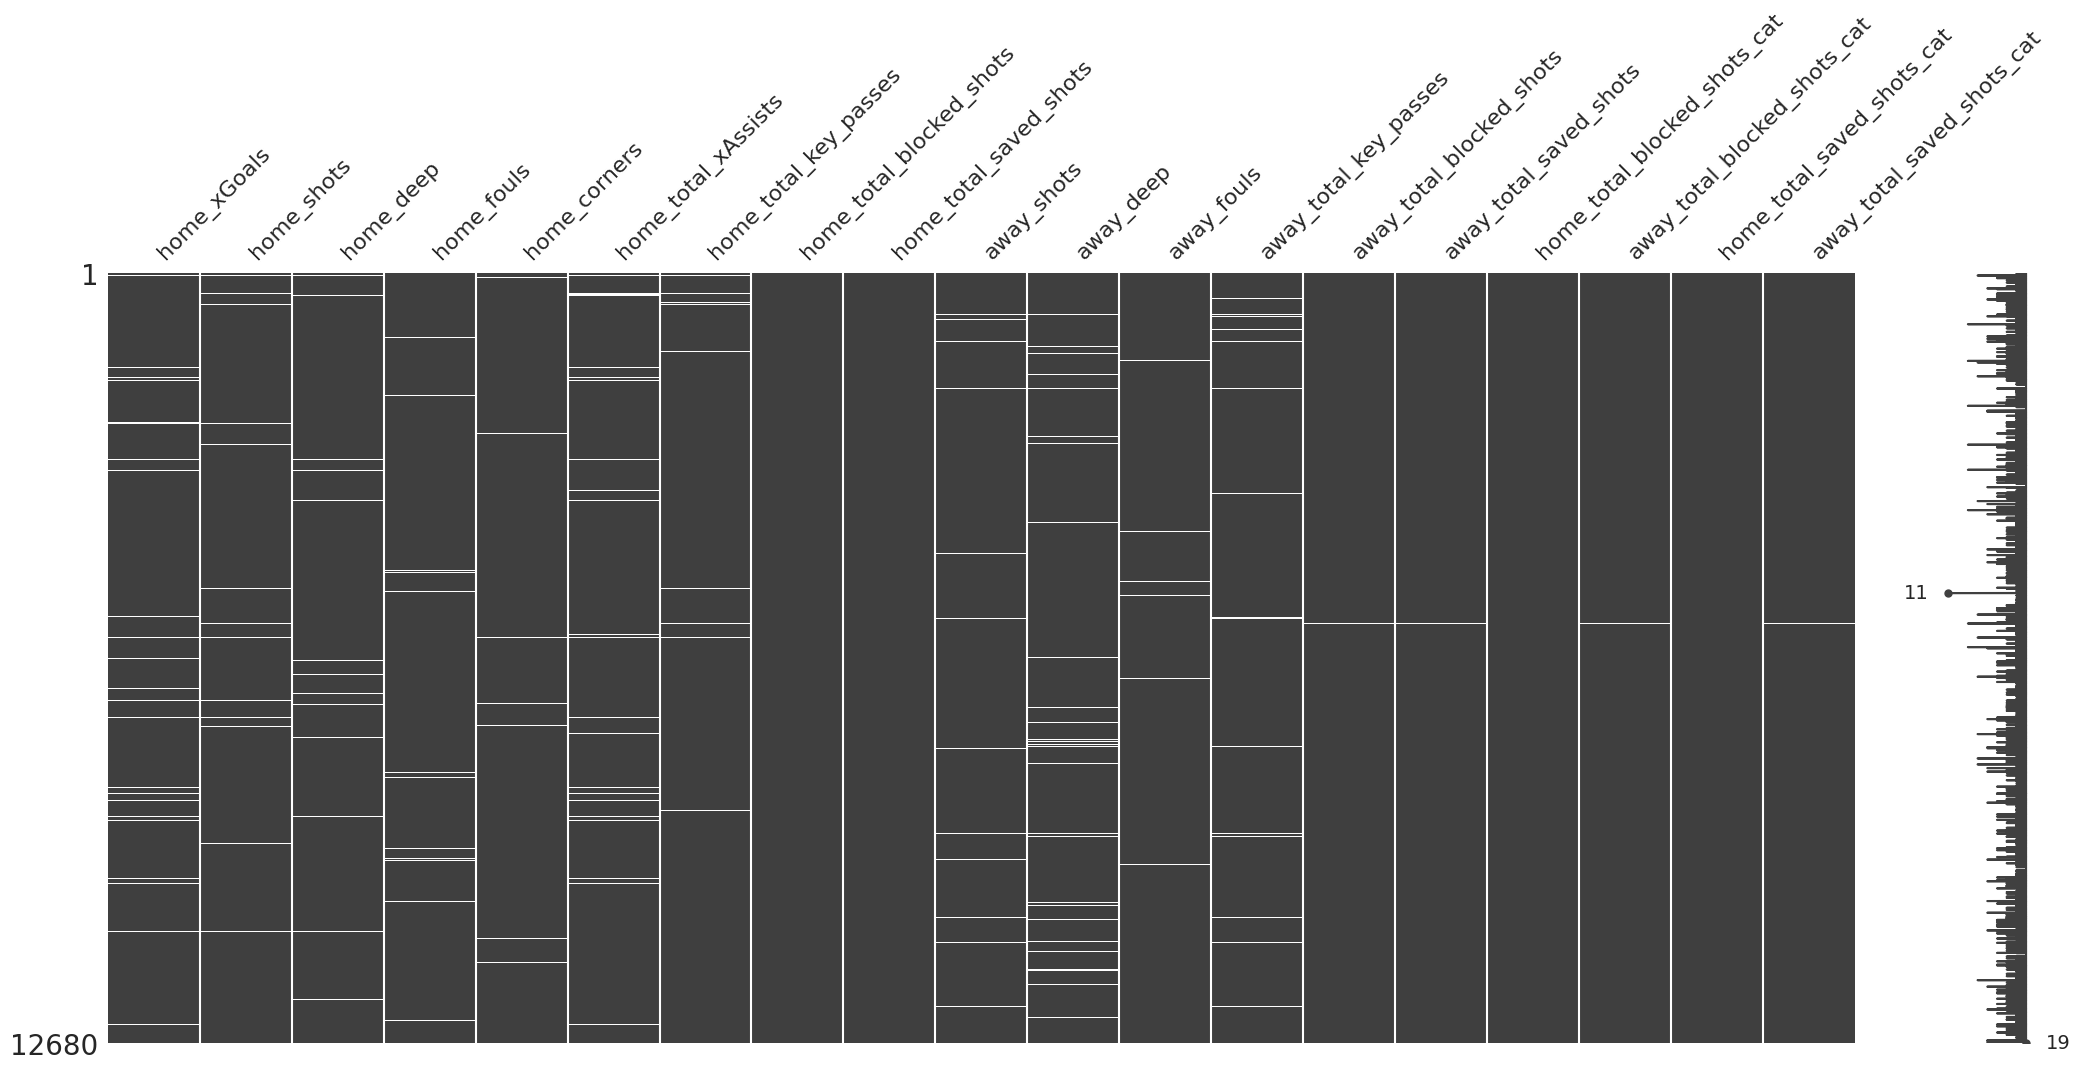

In [461]:
msno.matrix(manipulated_df_nulls);


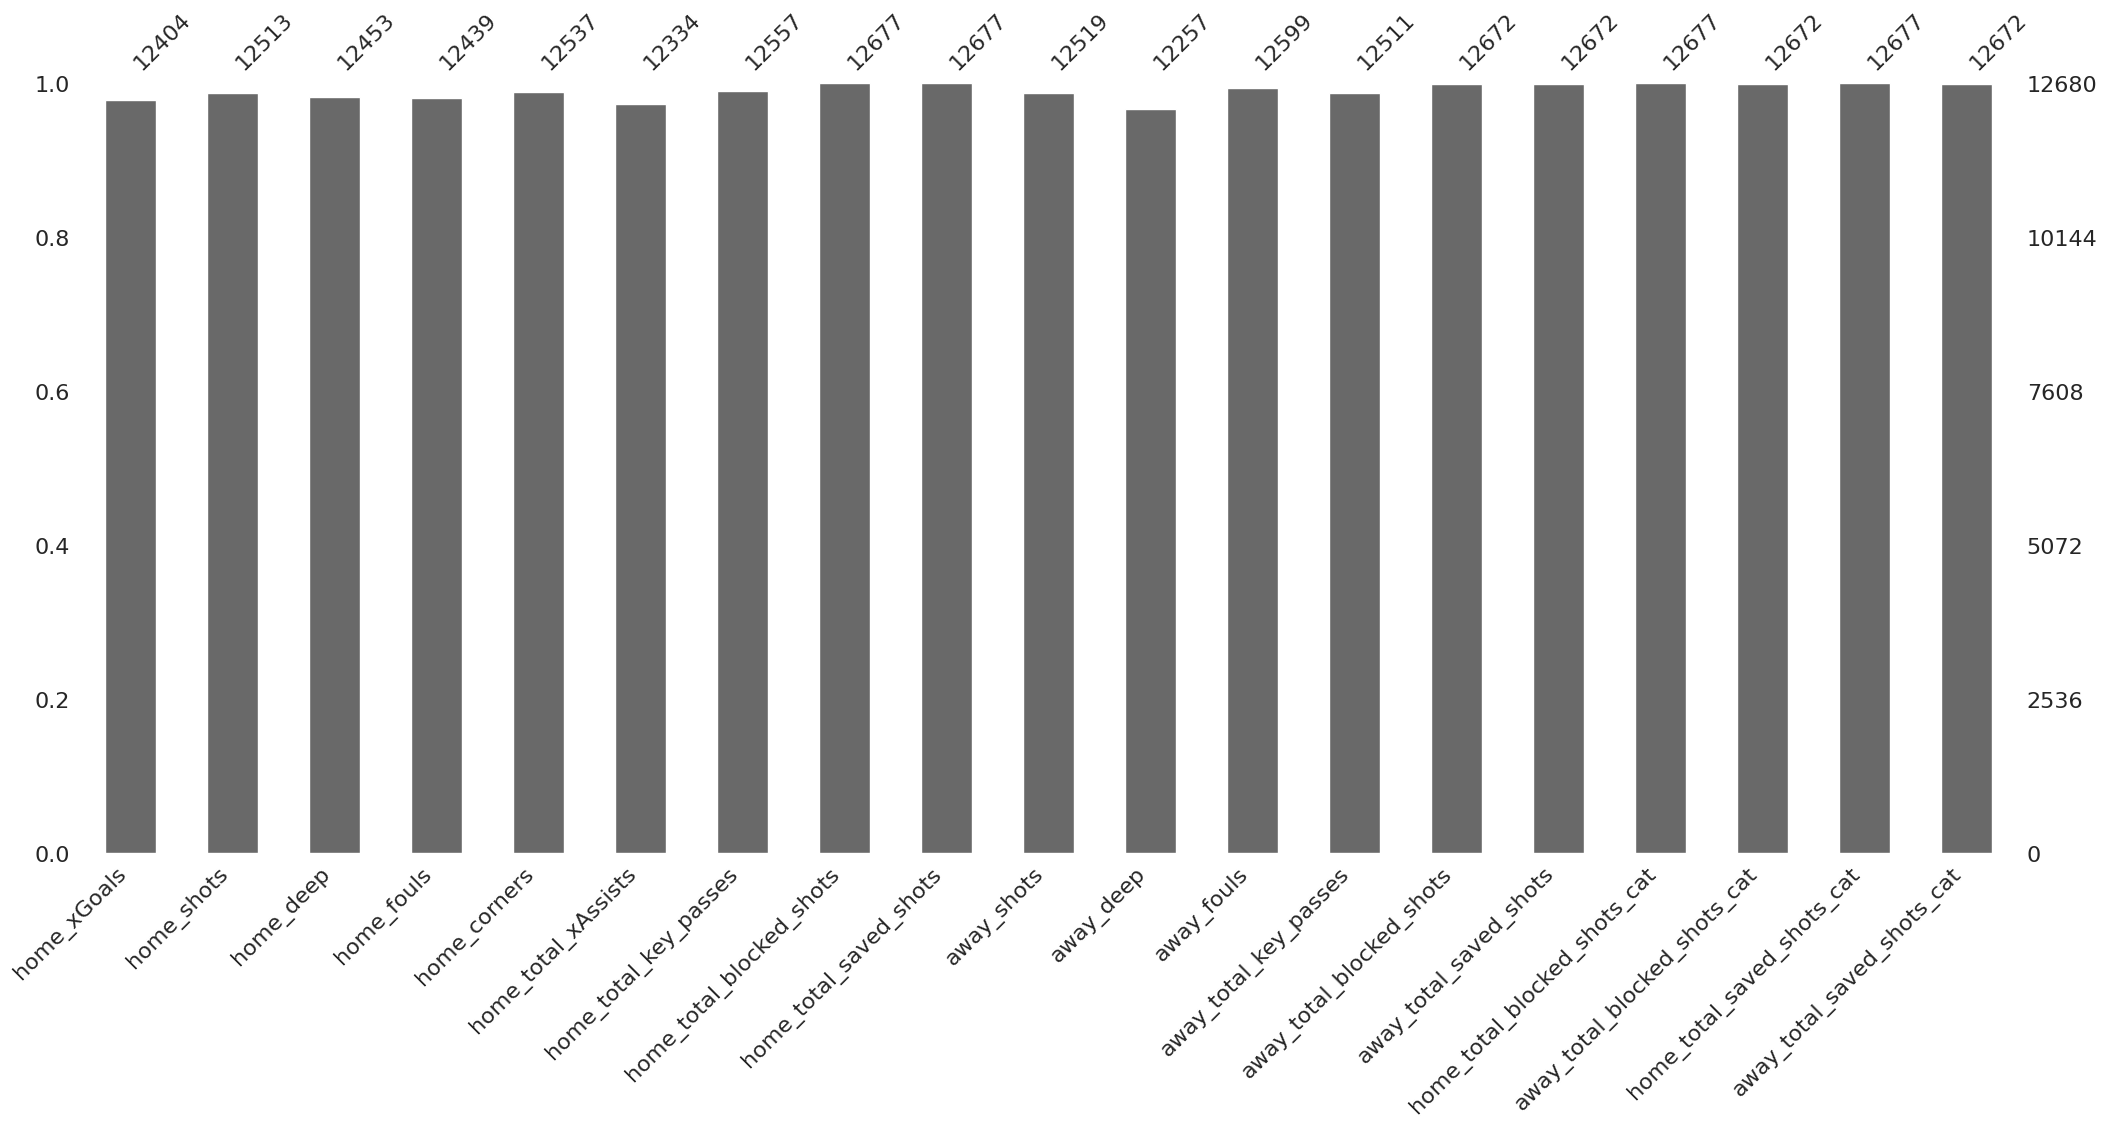

In [474]:
msno.bar(manipulated_df_nulls);


Updated missing values count and frequency after outliers removal:



In [463]:
mis_val = manipulated_df_nulls.isna().sum()
mis_val_per = manipulated_df_nulls.isna().sum()/len(manipulated_df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

Missing Values  % of Total Values
away_deep                                423                3.3
home_total_xAssists                      346                2.7
home_xGoals                              276                2.2
home_fouls                               241                1.9
home_deep                                227                1.8
away_total_key_passes                    169                1.3
home_shots                               167                1.3
away_shots                               161                1.3
home_corners                             143                1.1
home_total_key_passes                    123                1.0
away_fouls                                81                0.6
away_total_blocked_shots                   8                0.1
away_total_saved_shots                     8                0.1
away_total_blocked_shots_cat               8                0.1
away_total_saved_shots_cat                 8                0.1
home_total_saved_shots                     3                0.0
home_total_blocked_shots                   3                0.0
home_total_blocked_shots_cat               3                0.0
home_total_saved_shots_cat                 3                0.0

In [464]:
mis_val_table_ren_columns.sum()

Missing Values       2401.0
% of Total Values      18.9
dtype: float64

Creating a dataframe with missing values as 1 and existing values as 0:

In [465]:
df_missing_data = manipulated_data.isin([np.nan]) 
df_missing_data = df_missing_data.astype('int','float')
df_missing_data

gameID  leagueID  season  date  homeTeamID  awayTeamID  home_xGoals  \
0           0         0       0     0           0           0            0   
1           0         0       0     0           0           0            0   
2           0         0       0     0           0           0            0   
3           0         0       0     0           0           0            0   
4           0         0       0     0           0           0            0   
...       ...       ...     ...   ...         ...         ...          ...   
12675       0         0       0     0           0           0            0   
12676       0         0       0     0           0           0            0   
12677       0         0       0     0           0           0            0   
12678       0         0       0     0           0           0            0   
12679       0         0       0     0           0           0            0   

       home_shots  home_shotsOnTarget  home_deep  ...  home_shotsOnTarget_cat  \
0               0                   0          0  ...                       0   
1               0                   0          0  ...                       0   
2               0                   0          0  ...                       0   
3               0                   0          0  ...                       0   
4               0                   0          0  ...                       0   
...           ...                 ...        ...  ...                     ...   
12675           0                   0          0  ...                       0   
12676           0                   0          0  ...                       0   
12677           0                   0          0  ...                       0   
12678           0                   0          0  ...                       0   
12679           0                   0          0  ...                       0   

       away_shotsOnTarget_cat  home_total_assists_cat  away_total_assists_cat  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       0   
...                       ...                     ...                     ...   
12675                       0                       0                       0   
12676                       0                       0                       0   
12677                       0                       0                       0   
12678                       0                       0                       0   
12679                       0                       0                       0   

       home_corners_cat  away_corners_cat  home_total_blocked_shots_cat  \
0                     0                 0                             0   
1                     0                 0                             0   
2                     0                 0                             0   
3                     0                 0                             0   
4                     0                 0                             0   
...                 ...               ...                           ...   
12675                 0                 0                             0   
12676                 0                 0                             0   
12677                 0                 0                             0   
12678                 0                 0                             0   
12679                 0                 0                             0   

       away_total_blocked_shots_cat  home_total_saved_shots_cat  \
0                                 0                           0   
1                                 0                           0   
2                     

Creating df including numeric features of the later data - manipulated_data



In [466]:
#Selecting numeric data
numeric_manipulated_data = manipulated_data.select_dtypes(include=[np.number])
numeric_manipulated_data.columns

Index(['gameID', 'leagueID', 'season', 'homeTeamID', 'awayTeamID',
       'home_xGoals', 'home_shots', 'home_shotsOnTarget', 'home_deep',
       'home_ppda', 'home_fouls', 'home_corners', 'home_yellowCards',
       'home_redCards', 'home_total_assists', 'home_total_xAssists',
       'home_total_key_passes', 'home_total_xGoalsChain',
       'home_total_xGoalsBuildup', 'home_total_yellow_cards',
       'home_total_red_cards', 'home_total_blocked_shots',
       'home_total_saved_shots', 'away_xGoals', 'away_shots',
       'away_shotsOnTarget', 'away_deep', 'away_ppda', 'away_fouls',
       'away_corners', 'away_yellowCards', 'away_redCards',
       'away_total_assists', 'away_total_xAssists', 'away_total_key_passes',
       'away_total_xGoalsChain', 'away_total_xGoalsBuildup',
       'away_total_yellow_cards', 'away_total_red_cards',
       'away_total_blocked_shots', 'away_total_saved_shots', 'gameresult'],
      dtype='object')

Difference in the distribution of a variable when another variable is with or without MV:

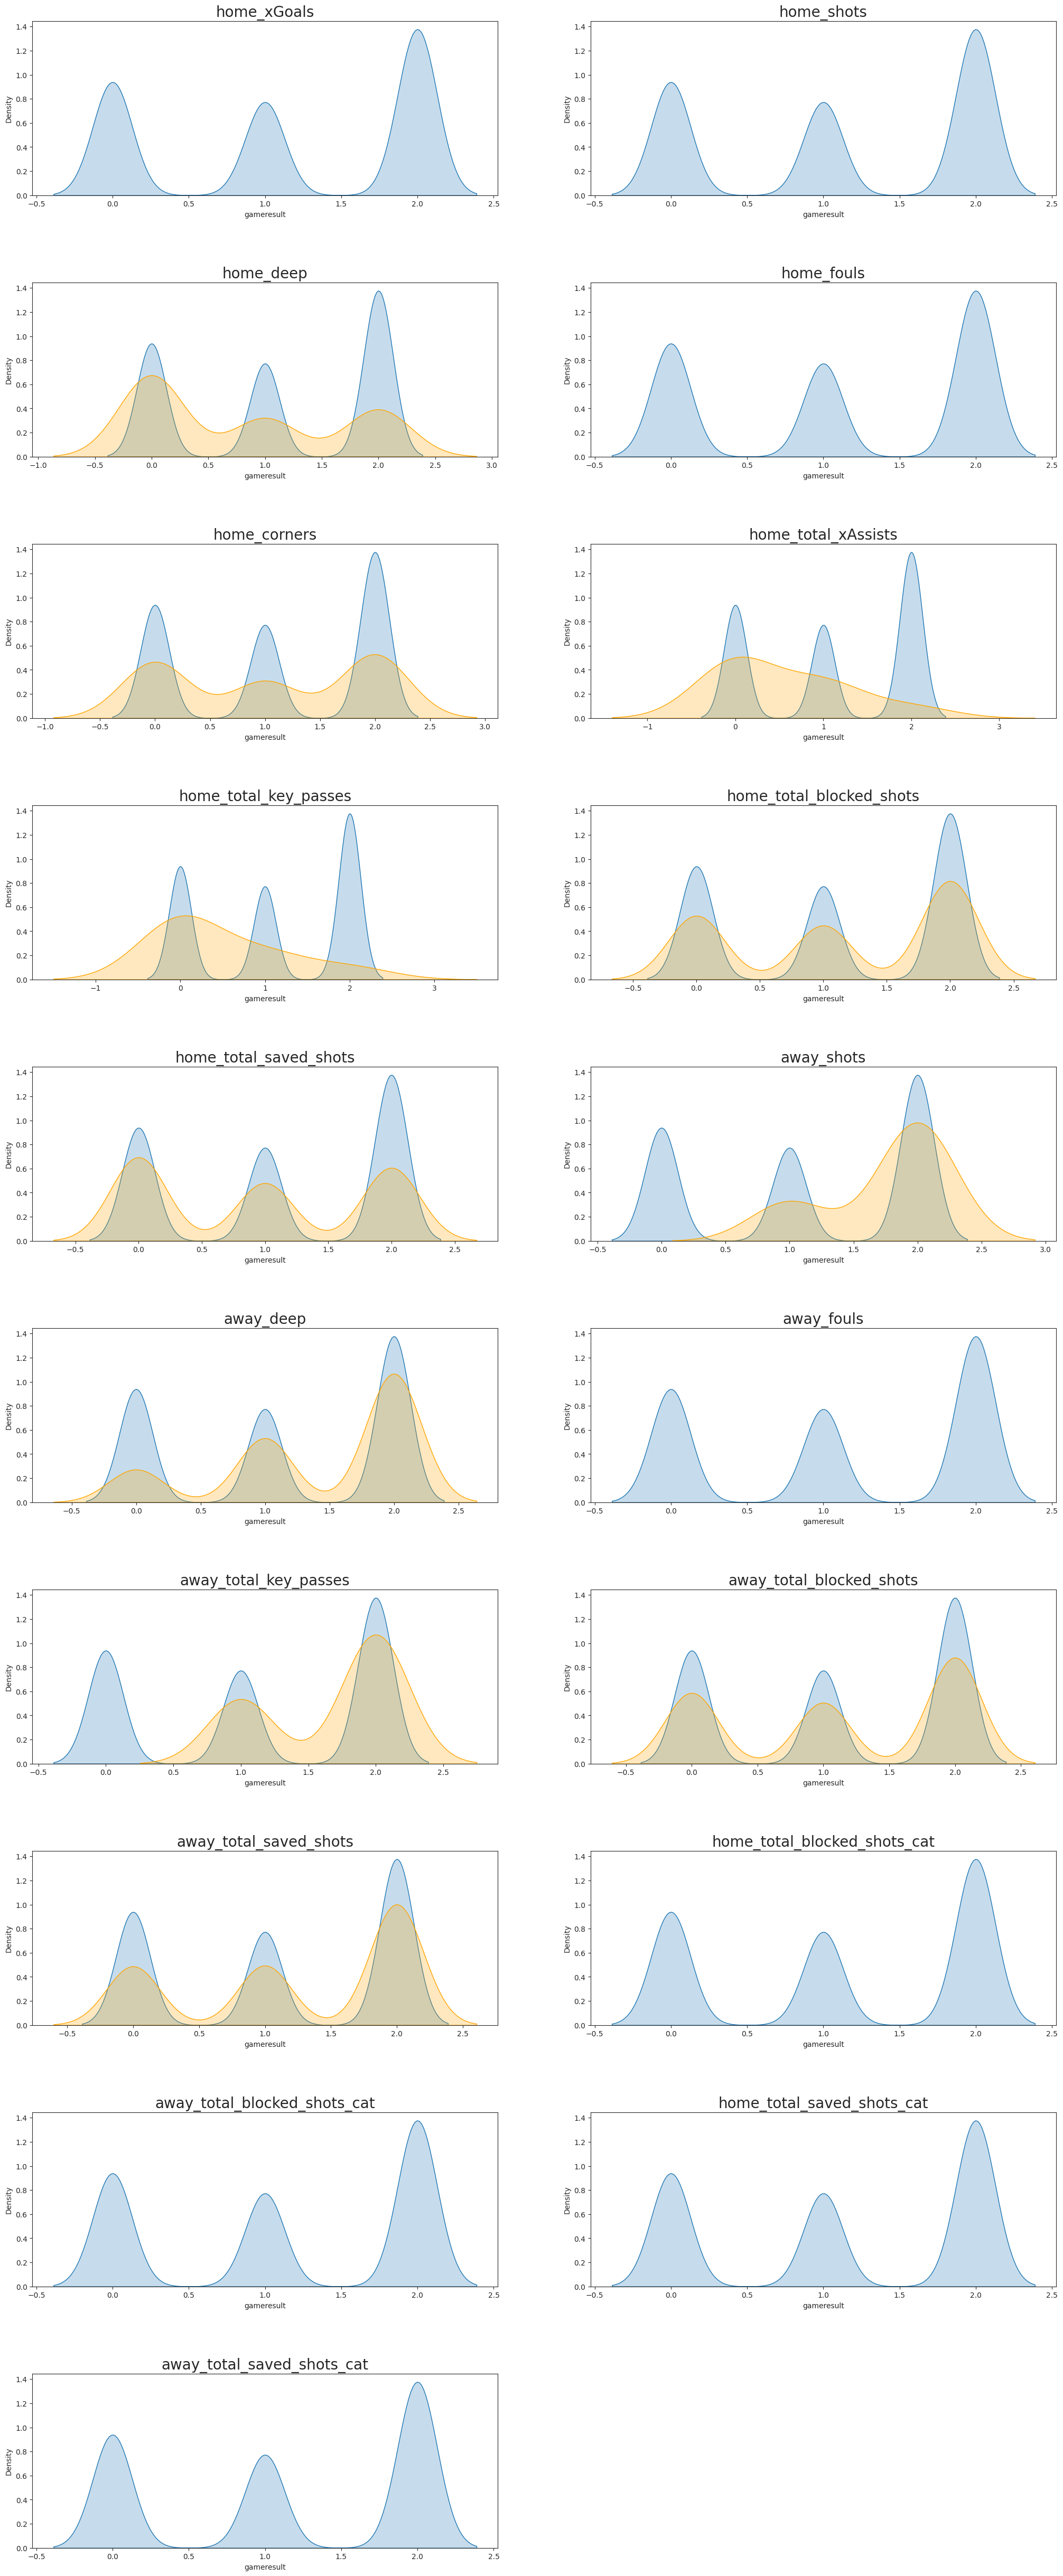

In [477]:
#c = numeric_manipulated_data.columns
colist = manipulated_df_nulls.columns
#names = missing_names
#sns.set(font_scale = 0.8)
#sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set
a=len(colist)
b=2
c=1
fig = plt.figure(figsize=(25,120))
plt.subplots_adjust(hspace=0.5)
for j in manipulated_df_nulls:
        if j!=i :
            plt.subplot(a,b,c)
            plt.title('{}'.format(j),fontsize=20)
            plt.xlabel(i)
            sns.kdeplot(df_with_new_categoricals[i],fill=True)
            sns.kdeplot(df_with_new_categoricals[i].loc[manipulated_df_nulls[j]==0],fill=True,color='orange')
        c=c+1
        
plt.show()

Exploring data the segnificunce of distribution change:

In [468]:
#le = preprocessing.LabelEncoder()
MV_df_final = pd.DataFrame(columns= ['Var', 'MV_pct', 'distribution_changed'])
#df[m] = le.fit_transform(df[m].astype(str))
m=numeric_manipulated_data.copy()
#m = manipulated_data._get_numeric_data().columns.dropna().unique()
np.seterr(divide='ignore', invalid='ignore')
for i in m: 
    # and i in mis_val_table_ren_columns.index.tolist():
    # column with NULLS
        null = m[i]
    # column without NULLS
        non = m[i].loc[df_missing_data[i]==0]
    # target value with NULLS
        superhost_null = m['gameresult']
    # target value without NULLS
        superhost_non = superhost_null.loc[df_missing_data[i]==0]
        mv = df_missing_data[i].sum()
    # perform Kolmogorov-Smirnov test
        pval = ks_2samp(null, non)[1]
        dis_change = np.where(pval<0.5,'+','-')
        MV_df_final = MV_df_final.append({'Var': i, 'MV_pct': mv, 'distribution_changed': dis_change},ignore_index=True)
MV_df_final

Var MV_pct distribution_changed
0                     gameID      0                    -
1                   leagueID      0                    -
2                     season      0                    -
3                 homeTeamID      0                    -
4                 awayTeamID      0                    -
5                home_xGoals    276                    +
6                 home_shots    167                    +
7         home_shotsOnTarget      0                    -
8                  home_deep    227                    +
9                  home_ppda      0                    -
10                home_fouls    241                    +
11              home_corners    143                    +
12          home_yellowCards      0                    -
13             home_redCards      0                    -
14        home_total_assists      0                    -
15       home_total_xAssists    346                    +
16     home_total_key_passes    123                    -
17    home_total_xGoalsChain      0                    -
18  home_total_xGoalsBuildup      0                    -
19   home_total_yellow_cards      0                    -
20      home_total_red_cards      0                    -
21  home_total_blocked_shots      3                    -
22    home_total_saved_shots      3                    -
23               away_xGoals      0                    -
24                away_shots    161                    +
25        away_shotsOnTarget      0                    -
26                 away_deep    423                    +
27                 away_ppda      0                    -
28                away_fouls     81                    -
29              away_corners      0                    -
30          away_yellowCards      0                    -
31             away_redCards      0                    -
32        away_total_assists      0                    -
33       away_total_xAssists      0                    -
34     away_total_key_passes    169                    +
35    away_total_xGoalsChain      0                    -
36  away_total_xGoalsBuildup      0                    -
37   away_total_yellow_cards      0                    -
38      away_total_red_cards      0                    -
39  away_total_blocked_shots      8                    -
40    away_total_saved_shots      8                    -
41                gameresult      0                    -

<Axes: >

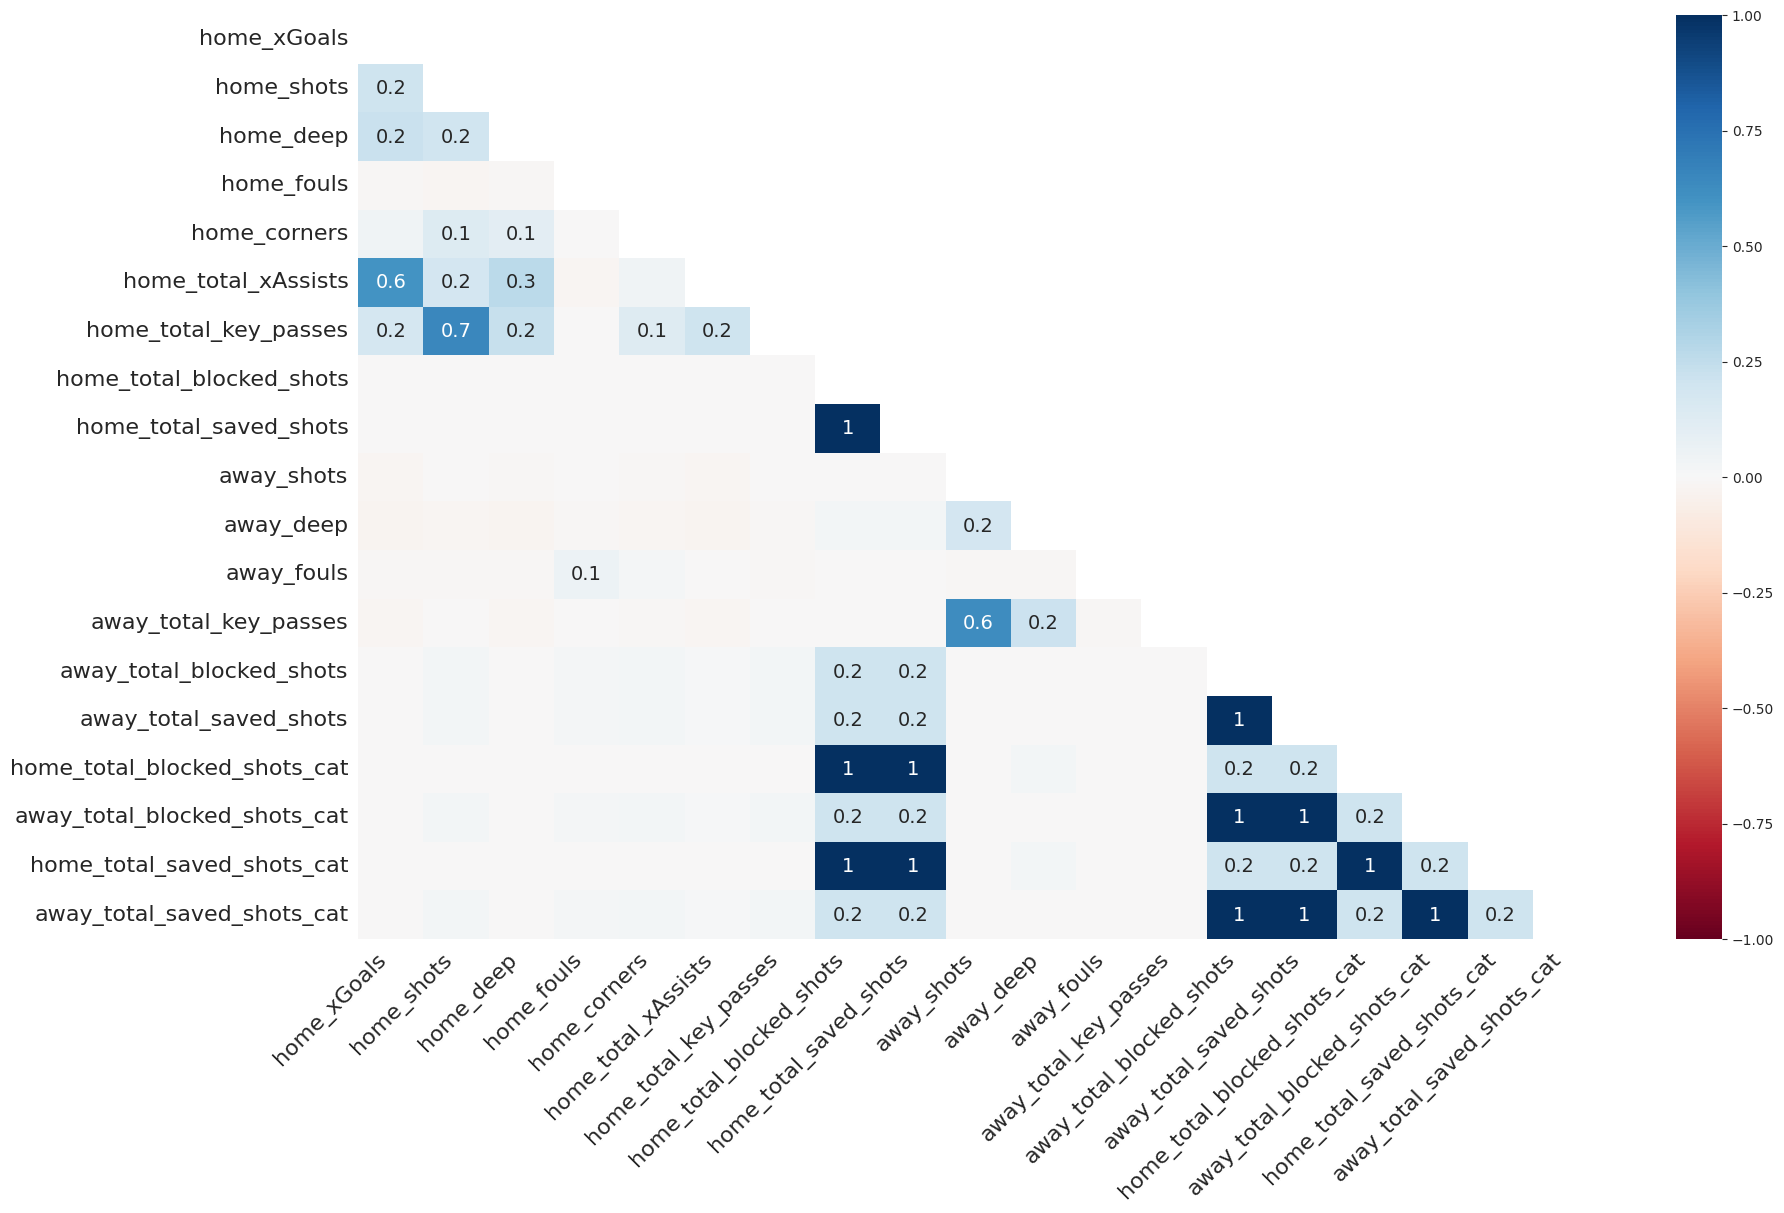

In [478]:
msno.heatmap(manipulated_data)


In [479]:
MV_df_final['drop']= 'Yes'
MV_df_final['MV_type']= 'MCAR/MAR'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'drop']='No'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'MV_type']='MNAR'
MV_df_final = MV_df_final[MV_df_final['MV_pct']>0].sort_values(by='MV_pct', ascending=False)
MV_df_final

Var MV_pct distribution_changed drop   MV_type
26                 away_deep    423                    +   No      MNAR
15       home_total_xAssists    346                    +   No      MNAR
5                home_xGoals    276                    +   No      MNAR
10                home_fouls    241                    +   No      MNAR
8                  home_deep    227                    +   No      MNAR
34     away_total_key_passes    169                    +   No      MNAR
6                 home_shots    167                    +   No      MNAR
24                away_shots    161                    +   No      MNAR
11              home_corners    143                    +   No      MNAR
16     home_total_key_passes    123                    -  Yes  MCAR/MAR
28                away_fouls     81                    -  Yes  MCAR/MAR
39  away_total_blocked_shots      8                    -  Yes  MCAR/MAR
40    away_total_saved_shots      8                    -  Yes  MCAR/MAR
21  home_total_blocked_shots      3                    -  Yes  MCAR/MAR
22    home_total_saved_shots      3                    -  Yes  MCAR/MAR

## 1. MCAR (Missing Completely At Random)
* Definition: The probability of a value being missing does not depend on the data itself or any other observed variables.

* Implication: You can safely use simple methods (e.g., dropping rows, mean/median imputation, KNN, MICE, etc.) without introducing strong biases.

* In Your Table: home_total_saved_shots might be MCAR or MAR (since it’s labeled “MCAR/MAR”). If you trust it’s MCAR, a straightforward imputation (like median or mode) or even dropping those rows might be acceptable—but your table says “drop = Yes,” suggesting you decided to drop this variable altogether.

## 2. MAR (Missing At Random)
* Definition: The probability of missing data may depend on other observed variables, but not on the value of the variable itself.

* Implication: You can still do imputation, but you might want to incorporate other columns. For instance, multiple imputation (MICE) or a regression-based approach that uses other features to predict the missing values.

* In Your Table: home_total_saved_shots is also labeled “MCAR/MAR.” If you suspect MAR, a more advanced approach (like MICE) can be used if you’re not dropping the variable.

## 3. MNAR (Missing Not At Random)
* Definition: The missingness depends on the value of the variable itself. For example, if teams with high corners/fouls are more likely to omit that data.

* Implication: Standard imputation methods can be biased. You may need:

    1. Domain knowledge: Understand why it’s missing.

    2. Indicator variable: Sometimes you create an extra column, e.g. col_missing = {0,1}, to capture the fact that a value was missing.

    3. Special modeling: If the data is systematically missing for certain outcomes, you might treat “missingness” as a separate category or use specialized MNAR models.

* In Your Table: The columns labeled “MNAR” (home_fouls, away_fouls, home_corners, away_corners, etc.) are trickier. If you suspect the missingness is related to the actual values (e.g., maybe referees are less likely to record certain stats when the number is extremely high or for certain matches), you cannot simply do mean/median imputation without risking bias.

    * One approach is to add an indicator for missing vs. non-missing, then for the non-missing subset, do an advanced approach or even treat them as unknown.

    * If you have no domain-based approach, you might end up ignoring or dropping those columns, but that can lose important info.

## 4. “distribution_changed” = “+”
* If distribution_changed is “+”, it indicates the distribution of that feature changes significantly when missing values are removed or considered. This often means the missing data is systematically different from the observed data. Coupled with MNAR, it strongly suggests caution if you try to fill them with a naive approach.

* If it’s “-,” it means the distribution does not change significantly, so simpler approaches might be less biased.

## 5. “drop = Yes”
* This typically indicates you decided to drop that feature from the analysis entirely, either because it’s too problematic or you have too few data points.

* In your table, home_total_saved_shots is marked “Yes” to drop. Possibly you decided the missingness is too frequent or unpredictable. Alternatively, you might have discovered it’s not crucial to your model.

## 6. Practical Steps

1. Columns Marked MNAR:

    * Evaluate whether the missingness might be systematic. Possibly create an indicator column (col_is_missing) for them. Then for non-missing rows, you could do domain-based or advanced imputation. Or treat them as “missing = new category” if it’s a categorical scenario.

    * If the missingness is large and you have no good method, consider dropping them or acknowledging a potential bias.

2. Columns Marked MCAR/MAR:

    * Use typical imputation (mean/median/mode, KNN, MICE).

    * If it’s truly MCAR and the missing ratio is small, dropping rows might be okay. If it’s MAR, try a more advanced approach that uses other features to guess the missing values.

3. Distribution Changed:

    * If “+,” the presence of missing data is significantly altering the distribution. That’s a red flag for naive imputation. Possibly add a missing indicator, or investigate the pattern of missingness further.

4. heck Percentage:

    * Look at MV_pct (missing percentage). If it’s extremely high (like 50%+), you might not salvage that column. If it’s moderate, an advanced approach might help.

5. Domain Knowledge:

    * For example, if “corners” are missing only for certain tournaments or for certain teams, you might glean the reason behind the missingness. That helps you decide how to handle them.

6. Final Decision:

    * There’s no one-size-fits-all solution. Evaluate each column’s importance, the extent of missingness, and the mechanism (MNAR, MAR, MCAR). Then choose:

        * Drop the column (if not critical or if data is too incomplete).

        * Impute with advanced methods.

        * Create a missing indicator (particularly for MNAR).

        * Leave as is (missing can be an explicit category or value if that makes sense in your domain).

## Summary
* MNAR: Hardest to handle. Often create a missing indicator or do specialized modeling.

* MAR: Imputation using other columns (e.g., MICE) is typically acceptable.

* MCAR: Simple approaches (drop or basic imputation) are relatively safe.

* distribution_changed = “+” means be extra cautious with naive imputation.

* If “drop=Yes,” you plan to remove that feature from further analysis.

By carefully combining these strategies—especially for MNAR columns—you can reduce bias and handle your missing data in a principled way.

Following the above, the idea of nulling the outliers in that dataset may cause a bias when using methods to fill the missing values. Therefore, only the real missing values will be dealt and another aproach will be applied on outliers - transform the features to categorical.

## The best approach depends on the missingness mechanism and the impact on your analysis. Based on your tables:

1. For MNAR features (e.g., away_deep, home_total_xAssists, home_xGoals, home_fouls, home_deep, away_total_key_passes, home_shots, away_shots, home_corners) where the distribution changes when missing values are dropped, a simple imputation (like median) may introduce bias because the missingness is related to the value itself. For these you could:

    * Use a more sophisticated imputation method (e.g., multiple imputation by chained equations [MICE] or regression-based imputation) that uses other predictors in your data.

    * If the missing percentage is very low (1–3%), you might accept a median imputation as a practical solution—but keep in mind the potential bias.

2. For MCAR/MAR features that are marked “drop=Yes” (e.g., home_total_key_passes, away_fouls, away_total_blocked_shots, away_total_saved_shots, home_total_blocked_shots, home_total_saved_shots) with extremely low missing percentages (0–0.1%), you could:

    * Drop these features if they aren’t critical.

    * Or, if you prefer to keep them, impute using the median since their missingness is likely random and their proportions are very small.

## In summary, if you need to keep the MNAR features, using an advanced imputation method (MICE or model-based imputation) is preferred. For the MCAR/MAR features, a simple median imputation (or dropping them altogether) should be sufficient due to their very low missing rate.

# Data Imputation

In [507]:
manipulated_df_nulls

home_xGoals  home_shots  home_deep  home_fouls  home_corners  \
0         0.627539         9.0        4.0        12.0           1.0   
1         0.876106        11.0       11.0        13.0           6.0   
2         0.604226        10.0        5.0         7.0           8.0   
3         2.568030        19.0        5.0        13.0           6.0   
4         1.130760        17.0        5.0        14.0           1.0   
...            ...         ...        ...         ...           ...   
12675     1.411190        15.0       17.0         8.0           9.0   
12676     1.198190        10.0        3.0        11.0           5.0   
12677     1.332690        12.0       10.0        11.0           4.0   
12678     1.460500        19.0        6.0        13.0           9.0   
12679     0.323960         6.0        1.0        17.0           2.0   

       home_total_xAssists  home_total_key_passes  home_total_blocked_shots  \
0                 0.284979                    5.0                       4.0   
1                 0.419975                    9.0                       2.0   
2                 0.549139                    8.0                       2.0   
3                 1.727543                   18.0                       4.0   
4                 0.416638                   12.0                       3.0   
...                    ...                    ...                       ...   
12675             0.971853                   11.0                       6.0   
12676             0.855524                    8.0                       3.0   
12677             1.151649                    8.0                       2.0   
12678             1.265829                   13.0                       5.0   
12679             0.074636                    4.0                       0.0   

       home_total_saved_shots  away_shots  away_deep  away_fouls  \
0                         1.0         9.0       10.0        12.0   
1                         2.0         7.0        2.0        13.0   
2                         3.0        11.0        4.0        13.0   
3                         4.0        11.0        6.0        17.0   
4                         4.0        11.0       10.0        20.0   
...                       ...         ...        ...         ...   
12675                     4.0         8.0        3.0        11.0   
12676                     2.0        12.0        4.0         6.0   
12677                     4.0         9.0        0.0        10.0   
12678                     5.0        10.0        3.0        10.0   
12679                     1.0         7.0        0.0         9.0   

       away_total_key_passes  away_total_blocked_shots  \
0                        7.0                       3.0   
1                        4.0                       2.0   
2                        8.0                       3.0   
3                        9.0                       2.0   
4                       10.0                       2.0   
...                      ...                       ...   
12675                    4.0                       1.0   
12676                    7.0                       4.0   
12677                    6.0                       0.0   
12678                    6.0                       1.0   
12679                    4.0                       2.0   

       away_total_saved_shots home_total_blocked_shots_cat  \
0                         4.0                            4   
1                         2.0                            2   
2                         3.0                            2   
3                         3.0                            4   
4                         4.0                            3   
...                       ...                          ...   
12675                     3.0                            6   
12676                     3.0                            3   
12677                     2.0                            2   
12678                     1.0                            5   
12679    

In [508]:
df_to_impute=manipulated_data

In [509]:
manipulated_df_nulls.columns

Index(['home_xGoals', 'home_shots', 'home_deep', 'home_fouls', 'home_corners',
       'home_total_xAssists', 'home_total_key_passes',
       'home_total_blocked_shots', 'home_total_saved_shots', 'away_shots',
       'away_deep', 'away_fouls', 'away_total_key_passes',
       'away_total_blocked_shots', 'away_total_saved_shots',
       'home_total_blocked_shots_cat', 'away_total_blocked_shots_cat',
       'home_total_saved_shots_cat', 'away_total_saved_shots_cat'],
      dtype='object')

In [510]:
df_to_impute

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539         9.0                   1        4.0  ...   
1         0.876106        11.0                   2       11.0  ...   
2         0.604226        10.0                   5        5.0  ...   
3         2.568030        19.0                   8        5.0  ...   
4         1.130760        17.0                   6        5.0  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190        15.0                   5       17.0  ...   
12676     1.198190        10.0                   3        3.0  ...   
12677     1.332690        12.0                   6       10.0  ...   
12678     1.460500        19.0                   5        6.0  ...   
12679     0.323960         6.0                   2        1.0  ...   

       home_shotsOnTarget_cat  away_shotsOnTarget_cat  home_total_assists_cat  \
0                           1                       4                       0   
1                           2                       3                       0   
2                           5                       5                       2   
3                           8                       5                       2   
4                           6                       7                       1   
...                       ...                     ...                     ...   
12675                       5                       5                       1   
12676                       3                       5                       1   
12677                       6                       2                       1   
12678                       5                       2                       0   
12679                       2                       1                       0   

       away_total_assists_cat  home_corners_cat  away_corners_cat  \
0                           0                 1                 2   
1                           1                 6                 3   
2                           1                 8                 2   
3                           2                 6                 3   
4                          3+                 1                 4   
...                       ...               ...               ...   
12675                       1                 9                 5   
12676                       1                 5                 2   
12677                       0                 4                 3   
12678                       1                 9                 3   
12679                       1                 2                 3   

       home_total_blocked_shots_cat  away_total_blocked_shots_cat  \
0                                 4                             3   
1                                 2                             2   
2                                 2                             3   
3                                 4                             2   
4                                 3                             2   
.

In [511]:
df_to_impute.isna().sum()

gameID                            0
leagueID                          0
season                            0
date                              0
homeTeamID                        0
awayTeamID                        0
home_xGoals                     276
home_shots                      167
home_shotsOnTarget                0
home_deep                       227
home_ppda                         0
home_fouls                      241
home_corners                    143
home_yellowCards                  0
home_redCards                     0
home_total_assists                0
home_total_xAssists             346
home_total_key_passes           123
home_total_xGoalsChain            0
home_total_xGoalsBuildup          0
home_total_yellow_cards           0
home_total_red_cards              0
home_total_blocked_shots          3
home_total_saved_shots            3
away_xGoals                       0
away_shots                      161
away_shotsOnTarget                0
away_deep                   

In [512]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

def impute_missing_values(df, missing_info, default_groupby_feature=None):
    """
    Imputes missing values in df based on missing_info.

    For each column in missing_info:
      - If its value is "MNAR", MICE (IterativeImputer) is used.
      - If its value is "MCAR/MAR", missing values are filled with the median.
        If a grouping column is specified (either via a list [missing_type, groupby_col]
        or via default_groupby_feature), the median is computed within that group.
        Otherwise, the overall median is used.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with missing values.
    missing_info : dict
        Dictionary mapping column names to missing type information. The value can be:
          - A string: "MNAR" or "MCAR/MAR".
          - A list: [missing_type, groupby_feature] where groupby_feature is the column to group by.
    default_groupby_feature : str, optional
        Default column to group by when missing type is "MCAR/MAR" and no specific
        grouping column is provided in missing_info.

    Returns
    -------
    df_imputed : pd.DataFrame
        New DataFrame with missing values imputed.
    """
    df_imputed = df.copy()

    for col, mv_info in missing_info.items():
        if col not in df_imputed.columns:
            continue

        # Determine missing type and grouping column
        if isinstance(mv_info, list):
            mv_type = mv_info[0]
            groupby_feature = mv_info[1]
        else:
            mv_type = mv_info
            groupby_feature = default_groupby_feature

        if mv_type == "MNAR":
            # Use MICE imputation (IterativeImputer)
            imp = IterativeImputer(random_state=0, max_iter=10)
            # IterativeImputer requires a 2D array, so we wrap the column in double brackets.
            imputed_values = imp.fit_transform(df_imputed[[col]])
            df_imputed[col] = imputed_values.ravel()
        elif mv_type == "MCAR/MAR":
            # If a grouping feature is provided, group by that feature and impute the median.
            if groupby_feature and groupby_feature in df_imputed.columns:
                df_imputed[col] = df_imputed.groupby(groupby_feature)[col].transform(lambda x: x.fillna(x.median()))
            else:
                # Otherwise, use the overall median.
                df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())
        else:
            # Default to overall median imputation.
            df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

    return df_imputed

In [513]:
missing_info = {
    "away_deep": "MNAR",
    "home_total_xAssists": "MNAR",
    "home_xGoals": "MNAR",
    "home_fouls": "MNAR",
    "home_deep": "MNAR",
    "away_total_key_passes": "MNAR",
    "home_shots": "MNAR",
    "away_shots": "MNAR",
    "home_corners": "MNAR",
    # For MCAR/MAR features, specify the grouping column:
    "home_total_key_passes": ["MCAR/MAR", "home_deep"],
    "away_fouls": ["MCAR/MAR", "away_yellowCards"],
    "away_total_blocked_shots": ["MCAR/MAR", "home_shots"],
    "away_total_saved_shots": ["MCAR/MAR", "home_shots"],
    "home_total_blocked_shots": ["MCAR/MAR", "away_shots"],
    "home_total_saved_shots": ["MCAR/MAR", "away_shots"]
}

In [514]:
df_imputed = impute_missing_values(df_to_impute, missing_info, default_groupby_feature=None)


In [515]:
df_imputed

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539         9.0                   1        4.0  ...   
1         0.876106        11.0                   2       11.0  ...   
2         0.604226        10.0                   5        5.0  ...   
3         2.568030        19.0                   8        5.0  ...   
4         1.130760        17.0                   6        5.0  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190        15.0                   5       17.0  ...   
12676     1.198190        10.0                   3        3.0  ...   
12677     1.332690        12.0                   6       10.0  ...   
12678     1.460500        19.0                   5        6.0  ...   
12679     0.323960         6.0                   2        1.0  ...   

       home_shotsOnTarget_cat  away_shotsOnTarget_cat  home_total_assists_cat  \
0                           1                       4                       0   
1                           2                       3                       0   
2                           5                       5                       2   
3                           8                       5                       2   
4                           6                       7                       1   
...                       ...                     ...                     ...   
12675                       5                       5                       1   
12676                       3                       5                       1   
12677                       6                       2                       1   
12678                       5                       2                       0   
12679                       2                       1                       0   

       away_total_assists_cat  home_corners_cat  away_corners_cat  \
0                           0                 1                 2   
1                           1                 6                 3   
2                           1                 8                 2   
3                           2                 6                 3   
4                          3+                 1                 4   
...                       ...               ...               ...   
12675                       1                 9                 5   
12676                       1                 5                 2   
12677                       0                 4                 3   
12678                       1                 9                 3   
12679                       1                 2                 3   

       home_total_blocked_shots_cat  away_total_blocked_shots_cat  \
0                                 4                             3   
1                                 2                             2   
2                                 2                             3   
3                                 4                             2   
4                                 3                             2   
.

In [516]:
df_imputed.isna().sum()

gameID                          0
leagueID                        0
season                          0
date                            0
homeTeamID                      0
awayTeamID                      0
home_xGoals                     0
home_shots                      0
home_shotsOnTarget              0
home_deep                       0
home_ppda                       0
home_fouls                      0
home_corners                    0
home_yellowCards                0
home_redCards                   0
home_total_assists              0
home_total_xAssists             0
home_total_key_passes           0
home_total_xGoalsChain          0
home_total_xGoalsBuildup        0
home_total_yellow_cards         0
home_total_red_cards            0
home_total_blocked_shots        0
home_total_saved_shots          0
away_xGoals                     0
away_shots                      0
away_shotsOnTarget              0
away_deep                       0
away_ppda                       0
away_fouls    

need to deal with the missing values for the categories features using the fiiling of the corespond feature

In [517]:
def fill_missing_categorical_bins(df):
    """
    For specific home/away categorical columns (ending in _cat), fill missing values
    by computing their bin from the corresponding numeric column.
    The mapping is:
      - 'home_total_blocked_shots_cat' from 'home_total_blocked_shots' with cutoff 9
      - 'away_total_blocked_shots_cat' from 'away_total_blocked_shots' with cutoff 9
      - 'home_total_saved_shots_cat'   from 'home_total_saved_shots'   with cutoff 8
      - 'away_total_saved_shots_cat'   from 'away_total_saved_shots'   with cutoff 8
    """
    # Mapping: categorical column -> (numeric column, cutoff)
    mapping = {
        "home_total_blocked_shots_cat": ("home_total_blocked_shots", 9),
        "away_total_blocked_shots_cat": ("away_total_blocked_shots", 9),
        "home_total_saved_shots_cat": ("home_total_saved_shots", 8),
        "away_total_saved_shots_cat": ("away_total_saved_shots", 8)
    }
    
    def bin_value(x, cutoff):
        if pd.isna(x):
            return np.nan
        try:
            val = int(x)
        except Exception:
            return np.nan
        return f"{cutoff}+" if val >= cutoff else str(val)
    
    # Process each column in the mapping
    for cat_col, (num_col, cutoff) in mapping.items():
        if cat_col in df.columns and num_col in df.columns:
            # Fill missing values in the categorical column using the corresponding numeric column
            missing_mask = df[cat_col].isna()
            df.loc[missing_mask, cat_col] = df.loc[missing_mask, num_col].apply(lambda x: bin_value(x, cutoff))
            # Convert to 'category' dtype
            df[cat_col] = df[cat_col].astype("category")
    return df

In [518]:
df_final = fill_missing_categorical_bins(df_imputed)

In [519]:
df_final

gameID  leagueID  season                date  homeTeamID  awayTeamID  \
0          81         1    2015 2015-08-08 15:45:00          89          82   
1          82         1    2015 2015-08-08 18:00:00          73          71   
2          83         1    2015 2015-08-08 18:00:00          72          90   
3          84         1    2015 2015-08-08 18:00:00          75          77   
4          85         1    2015 2015-08-08 18:00:00          79          78   
...       ...       ...     ...                 ...         ...         ...   
12675   16131         5    2020 2021-05-23 19:00:00         168         166   
12676   16132         5    2020 2021-05-23 19:00:00         177         176   
12677   16133         5    2020 2021-05-23 19:00:00         163         235   
12678   16134         5    2020 2021-05-23 19:00:00         175         181   
12679   16135         5    2020 2021-05-23 19:00:00         225         179   

       home_xGoals  home_shots  home_shotsOnTarget  home_deep  ...  \
0         0.627539         9.0                   1        4.0  ...   
1         0.876106        11.0                   2       11.0  ...   
2         0.604226        10.0                   5        5.0  ...   
3         2.568030        19.0                   8        5.0  ...   
4         1.130760        17.0                   6        5.0  ...   
...            ...         ...                 ...        ...  ...   
12675     1.411190        15.0                   5       17.0  ...   
12676     1.198190        10.0                   3        3.0  ...   
12677     1.332690        12.0                   6       10.0  ...   
12678     1.460500        19.0                   5        6.0  ...   
12679     0.323960         6.0                   2        1.0  ...   

       home_shotsOnTarget_cat  away_shotsOnTarget_cat  home_total_assists_cat  \
0                           1                       4                       0   
1                           2                       3                       0   
2                           5                       5                       2   
3                           8                       5                       2   
4                           6                       7                       1   
...                       ...                     ...                     ...   
12675                       5                       5                       1   
12676                       3                       5                       1   
12677                       6                       2                       1   
12678                       5                       2                       0   
12679                       2                       1                       0   

       away_total_assists_cat  home_corners_cat  away_corners_cat  \
0                           0                 1                 2   
1                           1                 6                 3   
2                           1                 8                 2   
3                           2                 6                 3   
4                          3+                 1                 4   
...                       ...               ...               ...   
12675                       1                 9                 5   
12676                       1                 5                 2   
12677                       0                 4                 3   
12678                       1                 9                 3   
12679                       1                 2                 3   

       home_total_blocked_shots_cat  away_total_blocked_shots_cat  \
0                                 4                             3   
1                                 2                             2   
2                                 2                             3   
3                                 4                             2   
4                                 3                             2   
.

In [506]:
df_final.isna().sum()

gameID                          0
leagueID                        0
season                          0
date                            0
homeTeamID                      0
awayTeamID                      0
home_xGoals                     0
home_shots                      0
home_shotsOnTarget              0
home_deep                       0
home_ppda                       0
home_fouls                      0
home_corners                    0
home_yellowCards                0
home_redCards                   0
home_total_assists              0
home_total_xAssists             0
home_total_key_passes           0
home_total_xGoalsChain          0
home_total_xGoalsBuildup        0
home_total_yellow_cards         0
home_total_red_cards            0
home_total_blocked_shots        3
home_total_saved_shots          3
away_xGoals                     0
away_shots                      0
away_shotsOnTarget              0
away_deep                       0
away_ppda                       0
away_fouls    

In [504]:
def fill_missing_cat_from_numeric(df, cat_col, num_col, cutoff):
    """
    For the given DataFrame df, ensures that the column cat_col exists.
    If it doesn't, create it by binning values from num_col using the cutoff:
      - If the numeric value is >= cutoff, returns f"{cutoff}+"
      - Otherwise, returns the integer value as a string.
    Then, for rows where cat_col is missing, fill them using the binned value of num_col.
    Finally, convert cat_col to the 'category' dtype.
    
    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    cat_col : str
        The name of the categorical column to fill (e.g. 'home_total_blocked_shots_cat').
    num_col : str
        The name of the corresponding numeric column (e.g. 'home_total_blocked_shots').
    cutoff : int
        The cutoff value; values >= cutoff are binned as f"{cutoff}+".
        
    Returns
    -------
    df : pd.DataFrame
        The DataFrame with the cat_col updated (or created) and converted to category dtype.
    """
    
    def bin_value(x, cutoff):
        if pd.isnull(x):
            return np.nan
        # Ensure x is an integer value
        try:
            val = int(x)
        except:
            return np.nan
        return f"{cutoff}+" if val >= cutoff else str(val)
    
    # If the categorical column doesn't exist, create it from the numeric column.
    if cat_col not in df.columns:
        df[cat_col] = df[num_col].apply(lambda v: bin_value(v, cutoff))
    else:
        # Otherwise, fill missing values in the existing cat_col using num_col.
        missing_mask = df[cat_col].isna()
        df.loc[missing_mask, cat_col] = df.loc[missing_mask, num_col].apply(lambda v: bin_value(v, cutoff))
    
    # Convert the column to categorical dtype.
    df[cat_col] = df[cat_col].astype("category")
    return df


In [505]:

# Now, fill the missing values for the four columns:
df_imputed = fill_missing_cat_from_numeric(df, "home_total_blocked_shots_cat", "home_total_blocked_shots", 9)
df_imputed = fill_missing_cat_from_numeric(df, "away_total_blocked_shots_cat", "away_total_blocked_shots", 9)
df_imputed = fill_missing_cat_from_numeric(df, "home_total_saved_shots_cat", "home_total_saved_shots", 8)
df_imputed = fill_missing_cat_from_numeric(df, "away_total_saved_shots_cat", "away_total_saved_shots", 8)
